sumber: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction/data

# Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

## import packages for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import joblib
%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


# library modelling
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

# mount drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preliminary

## Load Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dibimbing_DS/final_project_DS/dataset/data.csv')
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Hasil di atas menunjukkan
* Ada 95 fitur dan 1 target. Data memiliki 6819 baris
* Sejauh ini tidak ditemukan indikasi adanya *missing value*
* Target = `Bankrupt?`
* Data berisikan informasi keuangan, seperti rasio keuangan perusahaan (profitabilitas, likuiditas, solvabilitas, etc) dan indikator perusahaan lainnya (Total Asset Growth Rate, dsb)

## Check Duplicates

In [4]:
# if the result is 1, then there is no duplicates in data
len(df.drop_duplicates())/len(df)

1.0

Data tidak memiliki nilai duplikat

## Statistic Descriptive

In [5]:
# statistic Descriptive
df.describe().T

count          mean  \
Bankrupt?                                           6819.0  3.226280e-02   
 ROA(C) before interest and depreciation before...  6819.0  5.051796e-01   
 ROA(A) before interest and % after tax             6819.0  5.586249e-01   
 ROA(B) before interest and depreciation after tax  6819.0  5.535887e-01   
 Operating Gross Margin                             6819.0  6.079480e-01   
 Realized Sales Gross Margin                        6819.0  6.079295e-01   
 Operating Profit Rate                              6819.0  9.987551e-01   
 Pre-tax net Interest Rate                          6819.0  7.971898e-01   
 After-tax net Interest Rate                        6819.0  8.090836e-01   
 Non-industry income and expenditure/revenue        6819.0  3.036229e-01   
 Continuous interest rate (after tax)               6819.0  7.813814e-01   
 Operating Expense Rate                             6819.0  1.995347e+09   
 Research and development expense rate              6819.0  1.950427e+09   
 Cash flow rate                                     6819.0  4.674312e-01   
 Interest-bearing debt interest rate                6819.0  1.644801e+07   
 Tax rate (A)                                       6819.0  1.150007e-01   
 Net Value Per Share (B)                            6819.0  1.906606e-01   
 Net Value Per Share (A)                            6819.0  1.906332e-01   
 Net Value Per Share (C)                            6819.0  1.906724e-01   
 Persistent EPS in the Last Four Seasons            6819.0  2.288129e-01   
 Cash Flow Per Share                                6819.0  3.234819e-01   
 Revenue Per Share (Yuan ¥)                         6819.0  1.328641e+06   
 Operating Profit Per Share (Yuan ¥)                6819.0  1.090907e-01   
 Per Share Net profit before tax (Yuan ¥)           6819.0  1.843606e-01   
 Realized Sales Gross Profit Growth Rate            6819.0  2.240785e-02   
 Operating Profit Growth Rate                       6819.0  8.479800e-01   
 After-tax Net Profit Growth Rate                   6819.0  6.891461e-01   
 Regular Net Profit Growth Rate                     6819.0  6.891500e-01   
 Continuous Net Profit Growth Rate                  6819.0  2.176390e-01   
 Total Asset Growth Rate                            6819.0  5.508097e+09   
 Net Value Growth Rate                              6819.0  1.566212e+06   
 Total Asset Return Growth Rate Ratio               6819.0  2.642475e-01   
 Cash Reinvestment %                                6819.0  3.796767e-01   
 Current Ratio                                      6819.0  4.032850e+05   
 Quick Ratio                                        6819.0  8.376595e+06   
 Interest Expense Ratio                             6819.0  6.309910e-01   
 Total debt/Total net worth                         6819.0  4.416337e+06   
 Debt ratio %                                       6819.0  1.131771e-01   
 Net worth/Assets                                   6819.0  8.868229e-01   
 Long-term fund suitability ratio (A)               6819.0  8.782734e-03   
 Borrowing dependency                               6819.0  3.746543e-01   
 Contingent liabilities/Net worth                   6819.0  5.968277e-03   
 Operating profit/Paid-in capital                   6819.0  1.089767e-01   
 Net profit before tax/Paid-in capital              6819.0  1.827150e-01   
 Inventory and accounts receivable/Net value        6819.0  4.024593e-01   
 Total Asset Turnover                               6819.0  1.416056e-01   
 Accounts Receivable Turnover                       6819.0  1.278971e+07   
 Average Collection Days                            6819.0  9.826221e+06   
 Inventory Turnover Rate (times)                    6819.0  2.149106e+09   
 Fixed Assets Turnover Frequency                    6819.0  1.008596e+09   
 Net Worth Turnover Rate (times)                    6819.0  3.859505e-02   
 Revenue per person                                 6819.0  2.325854e+06   
 Operating profit per per

Berdasarkan hasil di atas:
* Data minimum dan maksimum menunjukkan skala hitung data hampir seragam berada di antara 0-1. Ini menandakan scaling mungkin tidak terlalu diperlukan. Untuk memastikan, bisa melakukan beberapa eksperimen dan kemudian dibandingkan (jika perlu).
* Menariknya `Net Income Flag` yang berisikan dummy 1 untuk income yang negative selama dua tahun terakhir menunjukkan tidak adanya variasi terlihat dari standar deviation = 0. Dengan kata lain, semua observasi/sampel memiliki dalam dua tahun terakhir memiliki.
* Sementara itu, perbedaan antara nilai **mean** dan **median** terlihat cukup jauh di beberapa variabel (fitur) seperti, `Operating Expense Rate`, `Current Liability to Assets`, `Equity to Liability`. Namun, beberpaa fitur juga terlihat **mean** dan **median** tidak terlalu jauh.
* Hal yang perlu dilihat lebih lanjut kevalidan nilai dalam fitur, beberapa fitur, misalnya dalam contoh ini `Current Ratio` dan `Quick Ratio` yang memiliki nilai yang tidak masuk akal, di mana meannya mencapai ~4 juta dan ~8 juta.
* **Maka dari itu, penangan outlier seperti menghapus bisa dilakukan.**    

In [6]:
# rename target (Bankrupt? to Bankrupt)
df = df.rename(columns={'Bankrupt?': 'Bankrupt'})

## Split Data

Terdapat dua set data yang dibuat, di antaranya:
* train
* test

In [7]:
# separate the features and target(label)
features = df.drop(columns='Bankrupt')
target = df[['Bankrupt']]

# Second splitting (train & test)
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size= 0.2,
                                                    random_state=42,
                                                    stratify=target)

# print the result
# check shape
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

# validation
if X_train.shape[0] + X_test.shape[0] == len(df):
  print('\nThe result of length is same on raw data, so the splitting is correct')

Shape of X_train: (5455, 95)
Shape of y_train: (5455, 1)
Shape of X_test: (1364, 95)
Shape of y_test: (1364, 1)

The result of length is same on raw data, so the splitting is correct


## Standarize name of features

In [8]:
# concat features and target in set train and test
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

In [9]:
# standarize naming in lowercase
train_set.columns = train_set.columns.str.strip().str.lower()
test_set.columns = test_set.columns.str.strip().str.lower()

# Initial EDA: Validation and Distribution

## Check and Handle Missing Value

In [10]:
train_set.isnull().sum()

roa(c) before interest and depreciation before interest    0
roa(a) before interest and % after tax                     0
roa(b) before interest and depreciation after tax          0
operating gross margin                                     0
realized sales gross margin                                0
operating profit rate                                      0
pre-tax net interest rate                                  0
after-tax net interest rate                                0
non-industry income and expenditure/revenue                0
continuous interest rate (after tax)                       0
operating expense rate                                     0
research and development expense rate                      0
cash flow rate                                             0
interest-bearing debt interest rate                        0
tax rate (a)                                               0
net value per share (b)                                    0
net value per share (a)                                    0
net value per share (c)                                    0
persistent eps in the last four seasons                    0
cash flow per share                                        0
revenue per share (yuan ¥)                                 0
operating profit per share (yuan ¥)                        0
per share net profit before tax (yuan ¥)                   0
realized sales gross profit growth rate                    0
operating profit growth rate                               0
after-tax net profit growth rate                           0
regular net profit growth rate                             0
continuous net profit growth rate                          0
total asset growth rate                                    0
net value growth rate                                      0
total asset return growth rate ratio                       0
cash reinvestment %                                        0
current ratio                                              0
quick ratio                                                0
interest expense ratio                                     0
total debt/total net worth                                 0
debt ratio %                                               0
net worth/assets                                           0
long-term fund suitability ratio (a)                       0
borrowing dependency                                       0
contingent liabilities/net worth                           0
operating profit/paid-in capital                           0
net profit before tax/paid-in capital                      0
inventory and accounts receivable/net value                0
total asset turnover                                       0
accounts receivable turnover                               0
average collection days                                    0
inventory turnover rate (times)                            0
fixed assets turnover frequency                            0
net worth turnover rate (times)                            0
revenue per person                                         0
operating profit per person                                0
allocation rate per person                                 0
working capital to total assets                            0
quick assets/total assets                                  0
current assets/total assets                                0
cash/total assets                                          0
quick assets/current liability                             0
cash/current liability                                     0
current liability to assets                                0
operating funds to liability                               0
inventory/working capital                                  0
inventory/current liability                                0
current liabilities/liability                              0
working capital/equity                                     0
current liabilities/equity         

Data tidak memiliki nilai null

## Data Distribustion

In [11]:
# create list of factor variables
faktor_profitabilitas = [
    'roa(c) before interest and depreciation before interest',
    'roa(a) before interest and % after tax',
    'roa(b) before interest and depreciation after tax',
    'operating gross margin',
    'realized sales gross margin',
    'operating profit rate',
    'pre-tax net interest rate',
    'after-tax net interest rate',
    'non-industry income and expenditure/revenue',
    'continuous interest rate (after tax)',
    'persistent eps in the last four seasons',
    'operating profit per share (yuan ¥)',
    'per share net profit before tax (yuan ¥)',
    'operating profit/paid-in capital',
    'net profit before tax/paid-in capital',
    'operating profit per person',
    'retained earnings to total assets',
    'total income/total expense',
    'net income to total assets',
    'gross profit to sales',
    "net income to stockholder's equity",
    'net income flag'
]

faktor_likuiditas = [
    'cash flow rate',
    'cash flow per share',
    'current ratio',
    'quick ratio',
    'working capital to total assets',
    'quick assets/total assets',
    'current assets/total assets',
    'cash/total assets',
    'quick assets/current liability',
    'cash/current liability',
    'cash flow to total assets',
    'cash flow to liability',
    'cfo to assets',
    'cash flow to equity',
    'current liability to current assets'
]

faktor_solvabilitas_leverage = [
    'total debt/total net worth',
    'debt ratio %',
    'net worth/assets',
    'long-term fund suitability ratio (a)',
    'borrowing dependency',
    'contingent liabilities/net worth',
    'current liability to assets',
    'current liabilities/liability',
    'current liabilities/equity',
    'long-term liability to current assets',
    'current liability to liability',
    'current liability to equity',
    'equity to long-term liability',
    'liability-assets flag',
    'liability to equity',
    'degree of financial leverage (dfl)',
    'interest coverage ratio (interest expense to ebit)',
    'equity to liability'
]

faktor_efisiensi_aktivitas = [
    'operating expense rate',
    'research and development expense rate',
    'revenue per share (yuan ¥)',
    'interest expense ratio',
    'total asset turnover',
    'accounts receivable turnover',
    'average collection days',
    'inventory turnover rate (times)',
    'fixed assets turnover frequency',
    'net worth turnover rate (times)',
    'revenue per person',
    'allocation rate per person',
    'total expense/assets',
    'current asset turnover rate',
    'quick asset turnover rate',
    'working capitcal turnover rate',
    'cash turnover rate'
]

faktor_pertumbuhan = [
    'realized sales gross profit growth rate',
    'operating profit growth rate',
    'after-tax net profit growth rate',
    'regular net profit growth rate',
    'continuous net profit growth rate',
    'total asset growth rate',
    'net value growth rate',
    'total asset return growth rate ratio'
]

faktor_nilai_pasar_valuasi = [
    'net value per share (b)',
    'net value per share (a)',
    'net value per share (c)',
    'cash reinvestment %',
    'working capital/equity'
]

faktor_lain_lain = [
    'interest-bearing debt interest rate',
    'tax rate (a)',
    'inventory and accounts receivable/net value',
    'inventory/working capital',
    'inventory/current liability',
    'cash flow to sales',
    'fixed assets to assets',
    'total assets to gnp price',
    'no-credit interval'
]

### Faktor profitabilitas

In [12]:
# create df for profitability
profitability_data = train_set[faktor_profitabilitas]

In [13]:
profitability_data.describe().T

count      mean  \
roa(c) before interest and depreciation before ...  5455.0  0.504447   
roa(a) before interest and % after tax              5455.0  0.557818   
roa(b) before interest and depreciation after tax   5455.0  0.552946   
operating gross margin                              5455.0  0.607765   
realized sales gross margin                         5455.0  0.607742   
operating profit rate                               5455.0  0.998781   
pre-tax net interest rate                           5455.0  0.797255   
after-tax net interest rate                         5455.0  0.809178   
non-industry income and expenditure/revenue         5455.0  0.303683   
continuous interest rate (after tax)                5455.0  0.781451   
persistent eps in the last four seasons             5455.0  0.228321   
operating profit per share (yuan ¥)                 5455.0  0.108779   
per share net profit before tax (yuan ¥)            5455.0  0.183691   
operating profit/paid-in capital                    5455.0  0.108672   
net profit before tax/paid-in capital               5455.0  0.182236   
operating profit per person                         5455.0  0.400181   
retained earnings to total assets                   5455.0  0.934526   
total income/total expense                          5455.0  0.002578   
net income to total assets                          5455.0  0.807420   
gross profit to sales                               5455.0  0.607763   
net income to stockholder's equity                  5455.0  0.840442   
net income flag                                     5455.0  1.000000   

                                                         std       min  \
roa(c) before interest and depreciation before ...  0.060354  0.024277   
roa(a) before interest and % after tax              0.065355  0.000000   
roa(b) before interest and depreciation after tax   0.061401  0.033514   
operating gross margin                              0.017047  0.000000   
realized sales gross margin                         0.017028  0.000000   
operating profit rate                               0.013556  0.000000   
pre-tax net interest rate                           0.011467  0.000000   
after-tax net interest rate                         0.010480  0.084286   
non-industry income and expenditure/revenue         0.011607  0.062507   
continuous interest rate (after tax)                0.011093  0.000000   
persistent eps in the last four seasons             0.031891  0.078567   
operating profit per share (yuan ¥)                 0.027857  0.000000   
per share net profit before tax (yuan ¥)            0.031246  0.009114   
operating profit/paid-in capital                    0.027695  0.000000   
net profit before tax/paid-in capital               0.029798  0.052439   
operating profit per person                         0.031433  0.000000   
retained earnings to total assets                   0.026133  0.000000   
total income/total expense                          0.013517  0.000000   
net income to total assets                          0.039954  0.000000   
gross profit to sales                               0.017047  0.000000   
net income to stockholder's equity                  0.010817  0.344652   
net income flag                                     0.000000  1.000000   

                                                         25%       50%  \
roa(c) before interest and depreciation before ...  0.476113  0.502121   
roa(a) before interest and % after tax              0.535379  0.559365   
roa(b) before interest and depreciation after tax   0.527143  0.551689   
operating gross margin                              0.600473  0.605983   
realized sales gross margin                         0.600463  0.605918   
operating profit rate                               0.998969  0.999022   
pre-tax net interest rate                           0.797386  0.797462   
after-tax net interest rate                         0.809311  0.809374   
non-industry income and exp

#### Boxplot

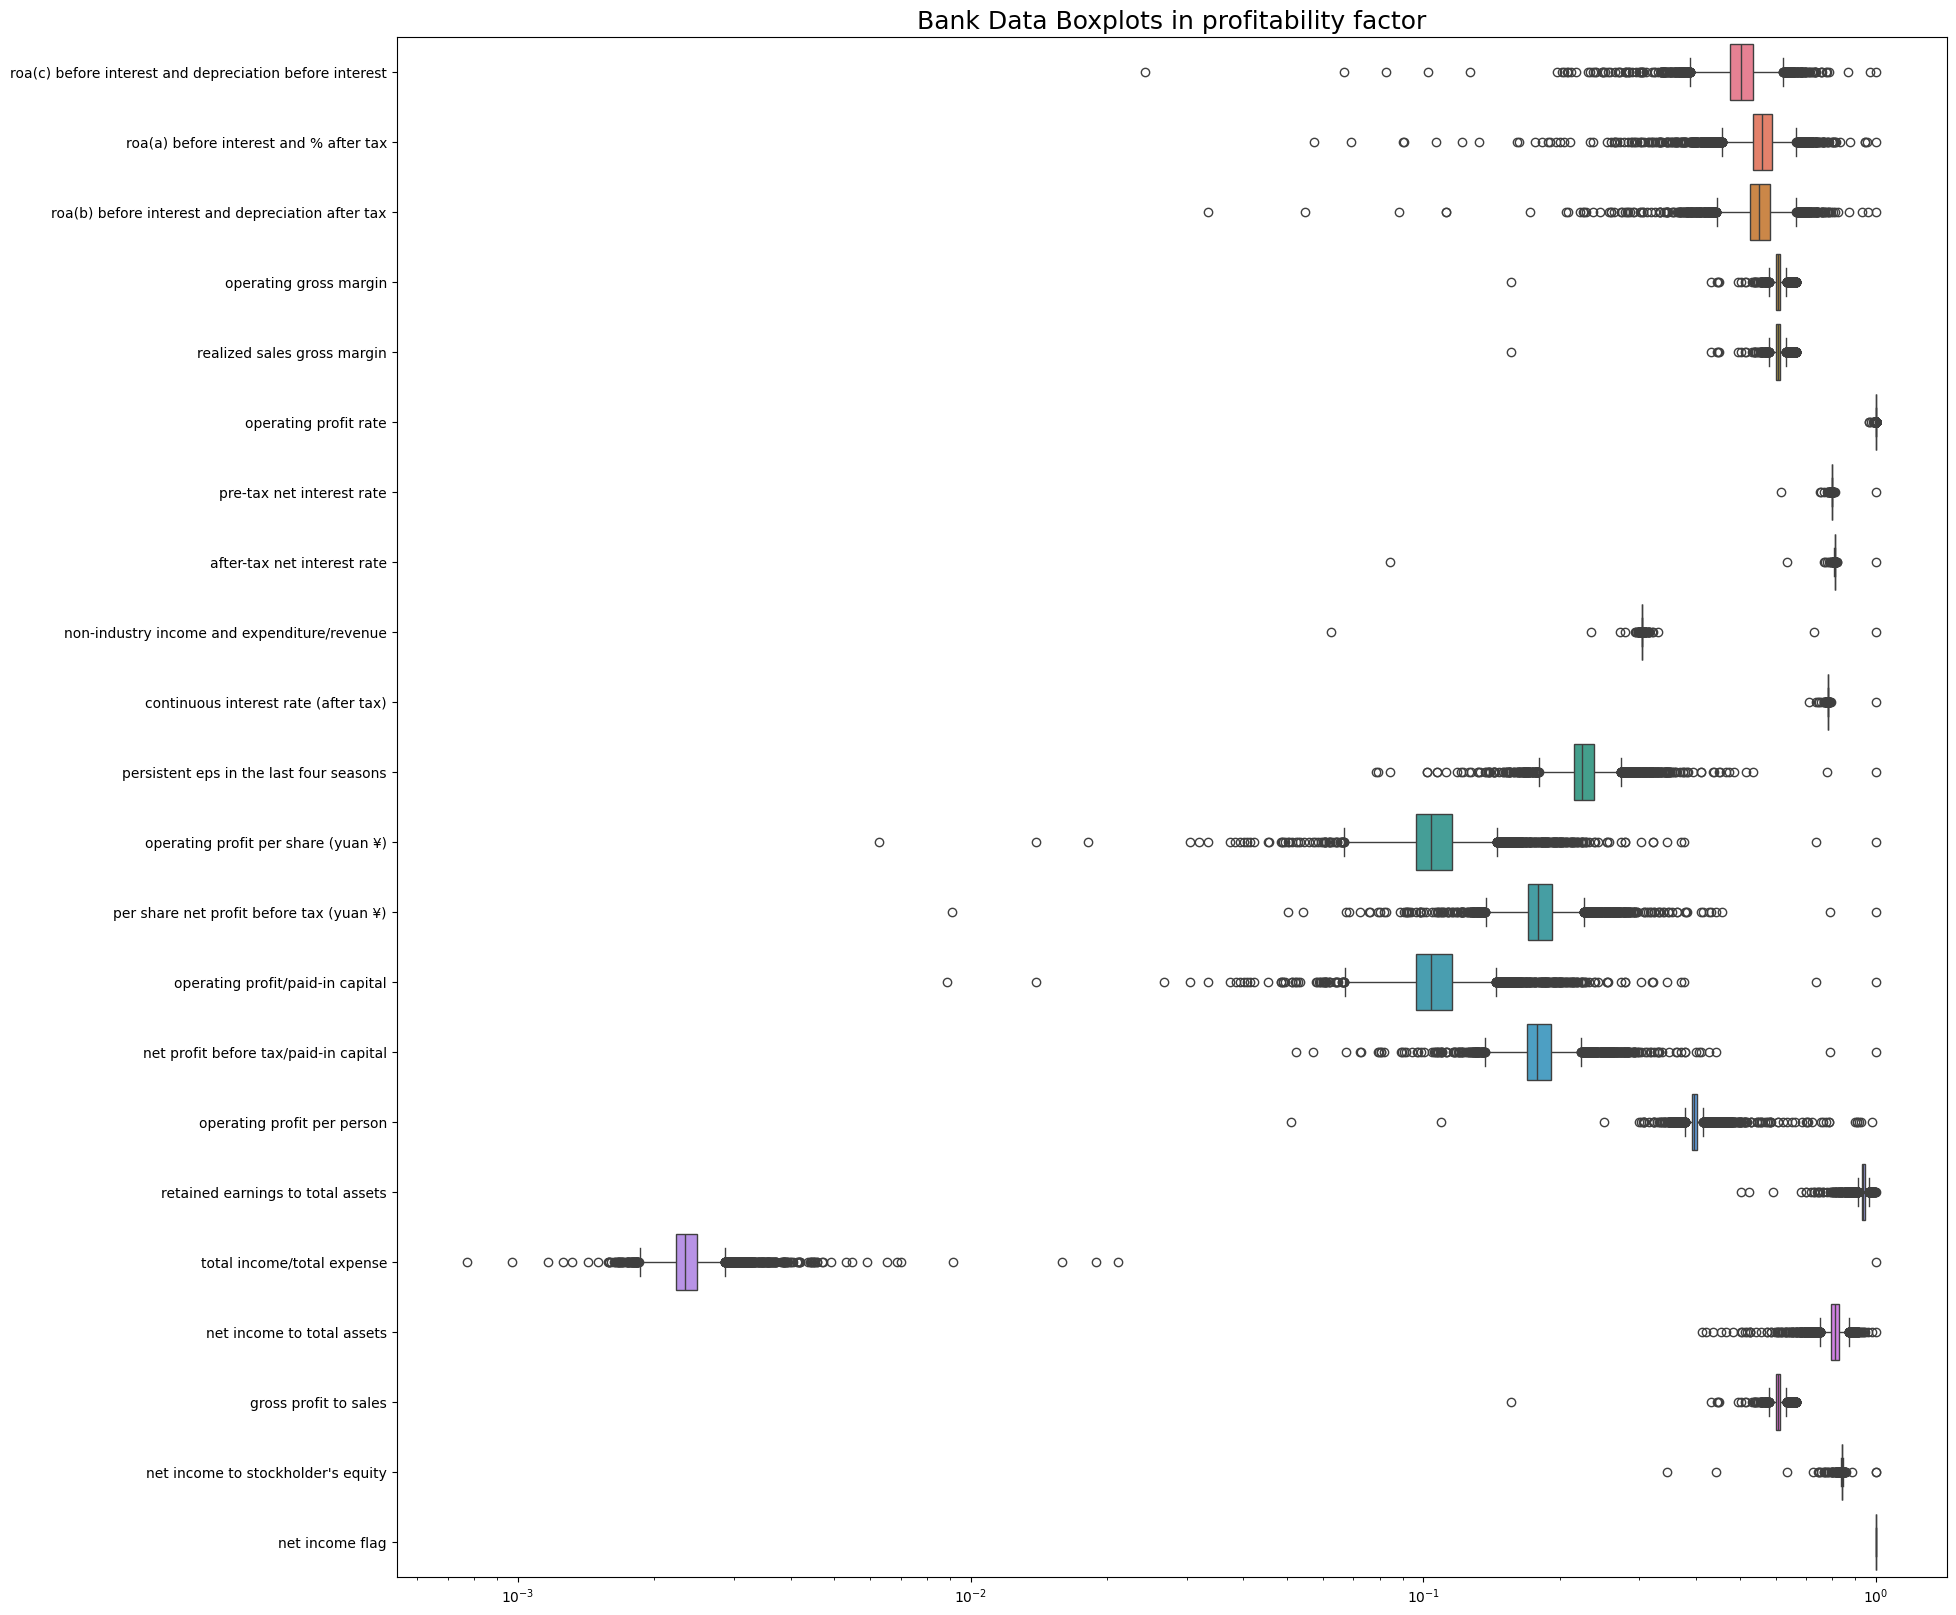

In [14]:
# viusalize histogram
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = profitability_data, orient="h")
ax.set_title('Bank Data Boxplots in profitability factor', fontsize = 18)
ax.set(xscale="log")
plt.show()

#### Histogram

array([[<Axes: title={'center': 'roa(c) before interest and depreciation before interest'}>,
        <Axes: title={'center': 'roa(a) before interest and % after tax'}>,
        <Axes: title={'center': 'roa(b) before interest and depreciation after tax'}>,
        <Axes: title={'center': 'operating gross margin'}>],
       [<Axes: title={'center': 'realized sales gross margin'}>,
        <Axes: title={'center': 'operating profit rate'}>,
        <Axes: title={'center': 'pre-tax net interest rate'}>,
        <Axes: title={'center': 'after-tax net interest rate'}>],
       [<Axes: title={'center': 'non-industry income and expenditure/revenue'}>,
        <Axes: title={'center': 'continuous interest rate (after tax)'}>,
        <Axes: title={'center': 'persistent eps in the last four seasons'}>,
        <Axes: title={'center': 'operating profit per share (yuan ¥)'}>],
       [<Axes: title={'center': 'per share net profit before tax (yuan ¥)'}>,
        <Axes: title={'center': 'operating pro

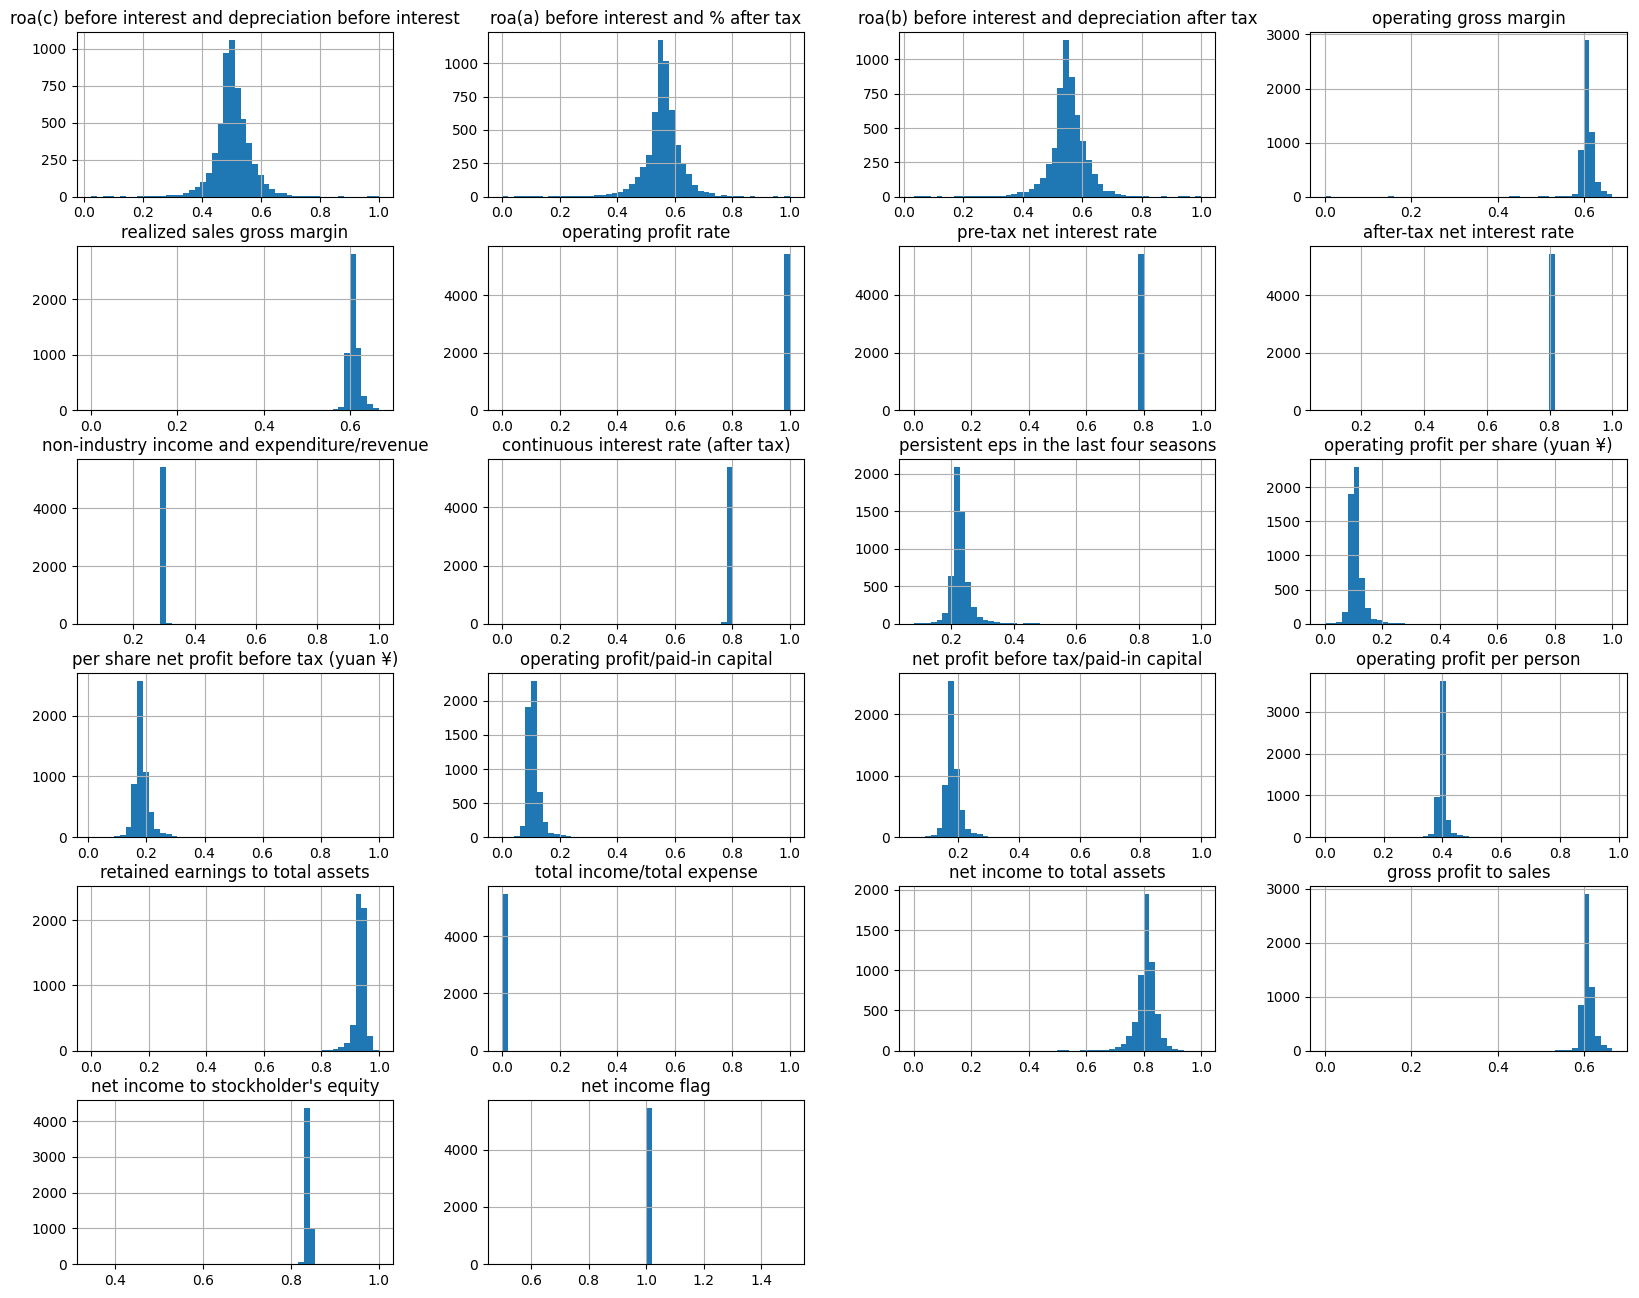

In [15]:
profitability_data.hist(figsize=(20, 16), bins=50, layout=(6, 4)) # bins = 50 to make it less noisy.

#### Insight

Hasil statistik deksriptif, boxplot dan histogram memberikan wawasan bahwa:
* Walaupun secara nilai valid, tidak ada nilainya yang mencapai jutaan, hasil visualisasi di atas menunjukkan hampir semua variabel memiliki *outliers*
* Menariknya tota/income/total expense menunukkan nilai yang lebih kecil. Ini bisa disebabkan oleh pembagi, yang mana dalam hal ini total expense, nilainya cukup besar
* Dalam distribusi histogram yang perlu dipahami bins dibuat menjadi 50 dan gambar grafik relatif kecil sehingga beberapa fitur terlihat mendekati normal.
* Namun perlu dipahami, sangat tidak mungkin atau kecil kemungkinan fitur dengan banyak outliernya sebelumnya memiliki distribusi yang mendekati normal. Terlihat ada skewness baik positif ataupun negatif.


### Faktor Likuiditas

In [16]:
# create df for liquidity
liquidity_data = train_set[faktor_likuiditas]

In [17]:
liquidity_data.describe().T

count          mean           std  \
cash flow rate                       5455.0  4.672292e-01  1.552481e-02   
cash flow per share                  5455.0  3.234735e-01  1.704533e-02   
current ratio                        5455.0  1.505731e-02  2.323926e-02   
quick ratio                          5455.0  8.196150e+06  2.409200e+08   
working capital to total assets      5455.0  8.142162e-01  5.966096e-02   
quick assets/total assets            5455.0  4.010283e-01  2.030563e-01   
current assets/total assets          5455.0  5.229211e-01  2.194601e-01   
cash/total assets                    5455.0  1.243128e-01  1.403625e-01   
quick assets/current liability       5455.0  4.491292e+06  1.918745e+08   
cash/current liability               5455.0  3.704491e+07  5.126982e+08   
cash flow to total assets            5455.0  6.497424e-01  4.774394e-02   
cash flow to liability               5455.0  4.618768e-01  2.981023e-02   
cfo to assets                        5455.0  5.932255e-01  5.770317e-02   
cash flow to equity                  5455.0  3.155630e-01  1.351779e-02   
current liability to current assets  5455.0  3.142659e-02  2.940181e-02   

                                          min       25%       50%       75%  \
cash flow rate                       0.000000  0.461541  0.465076  0.470914   
cash flow per share                  0.201988  0.317712  0.322452  0.328464   
current ratio                        0.000000  0.007521  0.010574  0.016394   
quick ratio                          0.000000  0.004675  0.007363  0.012271   
working capital to total assets      0.000000  0.773674  0.810124  0.850925   
quick assets/total assets            0.001469  0.240454  0.387412  0.540557   
current assets/total assets          0.001407  0.352862  0.515921  0.690060   
cash/total assets                    0.000000  0.033886  0.074627  0.160595   
quick assets/current liability       0.000120  0.005208  0.007879  0.013007   
cash/current liability               0.000000  0.001982  0.004840  0.012776   
cash flow to total assets            0.000000  0.633282  0.645395  0.662780   
cash flow to liability               0.000000  0.457103  0.459746  0.464101   
cfo to assets                        0.000000  0.565851  0.593266  0.624086   
cash flow to equity                  0.000000  0.313018  0.314958  0.317691   
current liability to current assets  0.000000  0.017894  0.027630  0.038528   

                                              max  
cash flow rate                       7.432509e-01  
cash flow per share                  1.000000e+00  
current ratio                        1.000000e+00  
quick ratio                          9.230000e+09  
working capital to total assets      1.000000e+00  
quick assets/total assets            1.000000e+00  
current assets/total assets          1.000000e+00  
cash/total assets                    1.000000e+00  
quick assets/current liability       8.820000e+09  
cash/current liability               9.650000e+09  
cash flow to total assets            1.000000e+00  
cash flow to liability               1.000000e+00  
cfo to assets                        1.000000e+00  
cash flow to equity                  1.000000e+00  
current liability to current assets  1.000000e+00

#### Boxplot

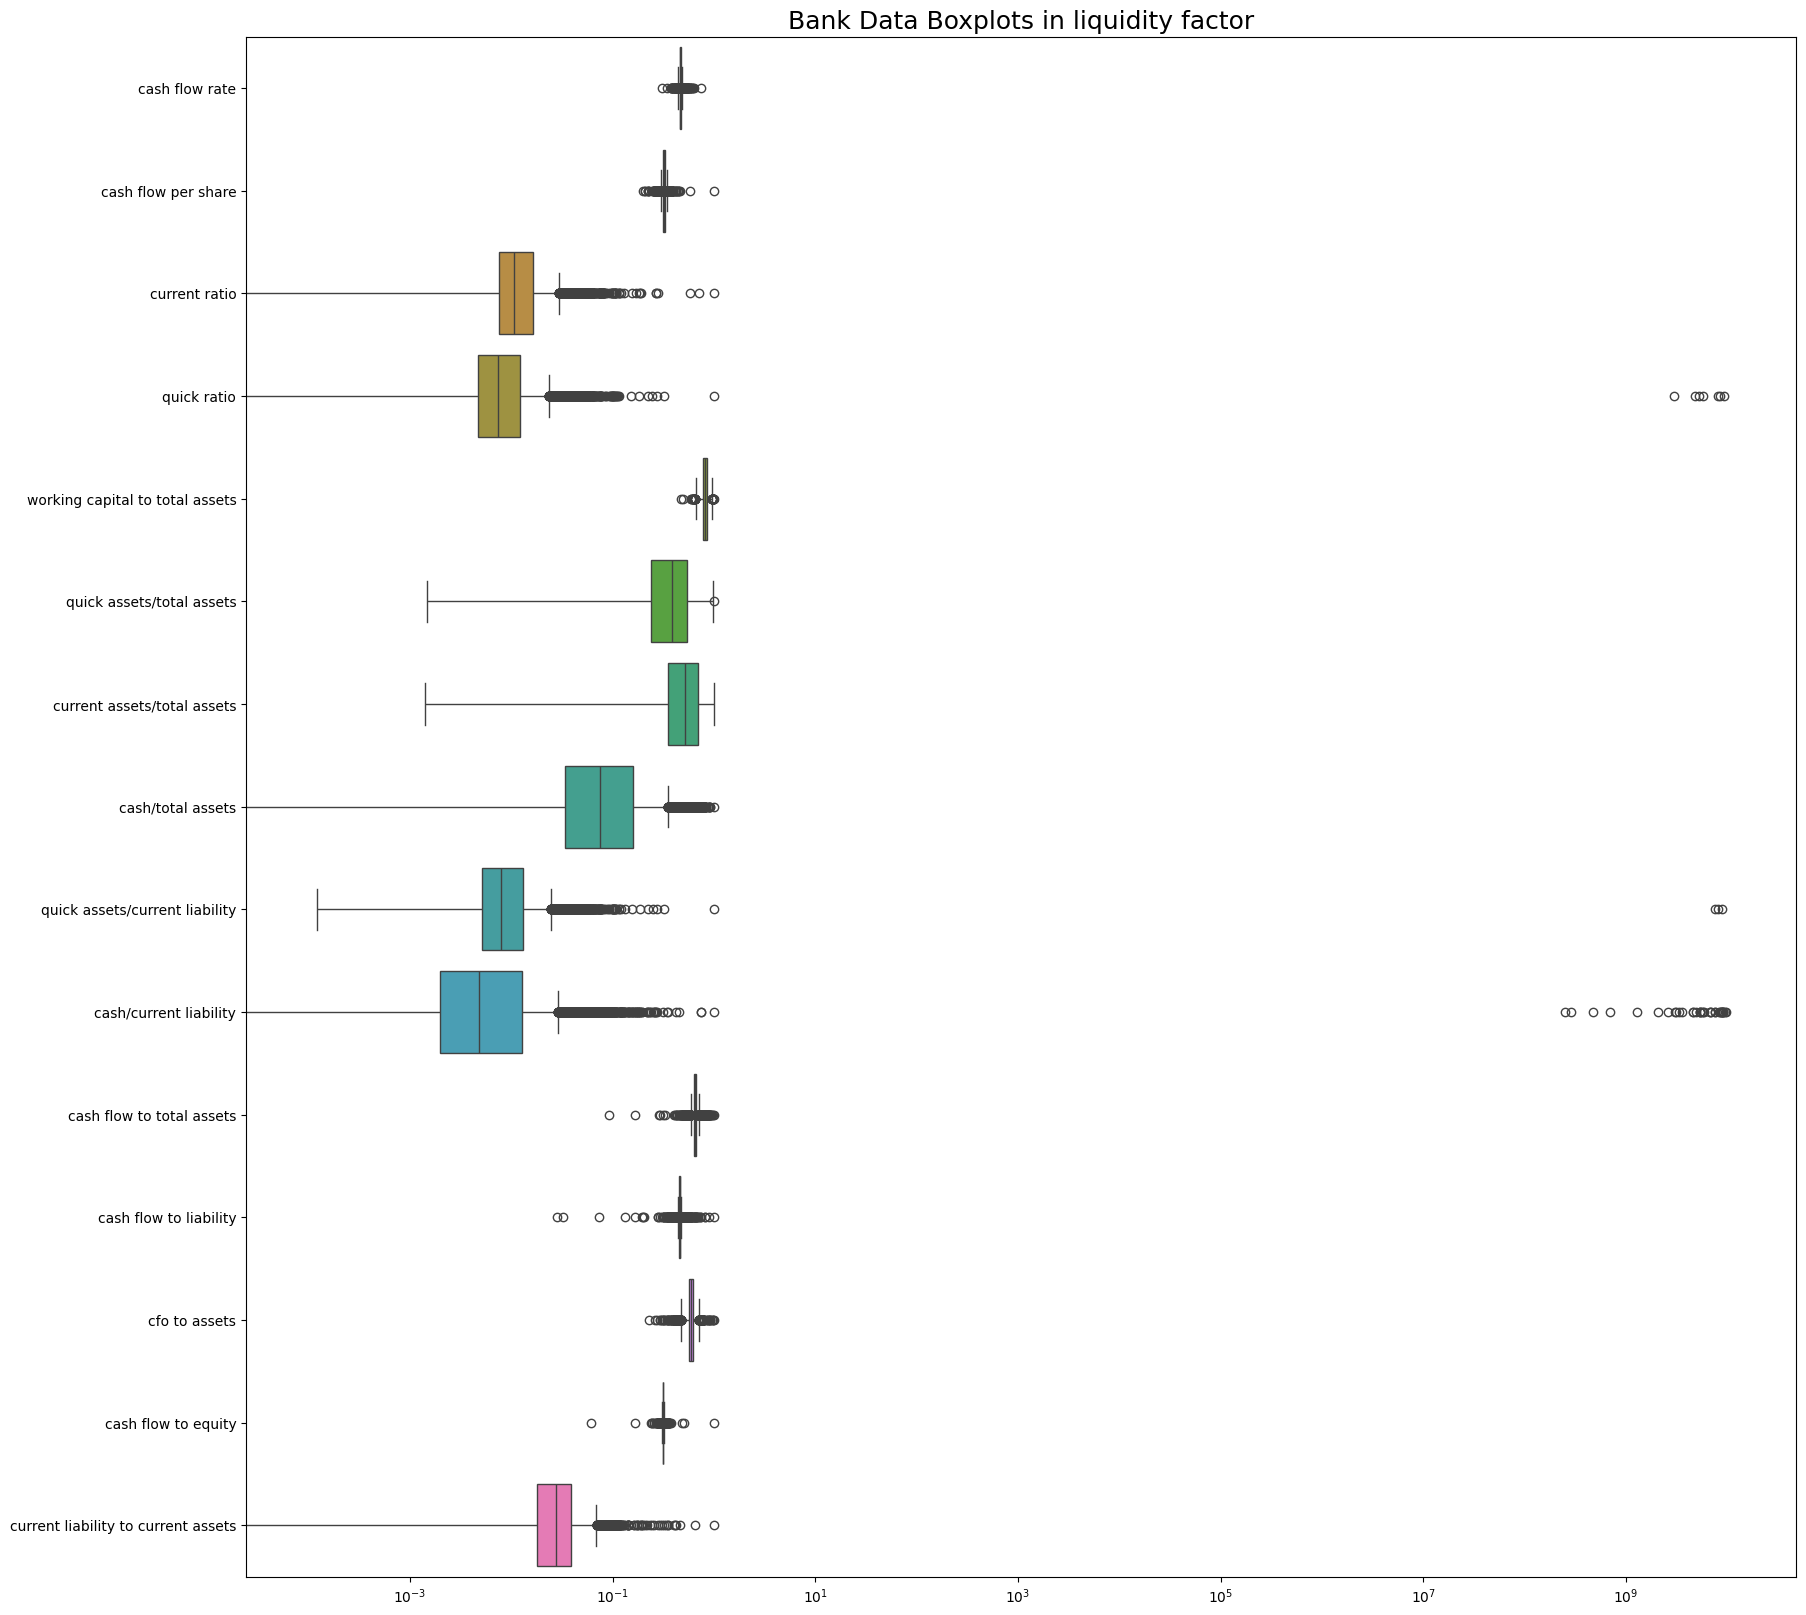

In [18]:
# viusalize histogram
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = liquidity_data, orient="h")
ax.set_title('Bank Data Boxplots in liquidity factor', fontsize = 18)
ax.set(xscale="log")
plt.show()

Grafik di atas menunjukkan hal yang jelas
* Ada nilai yang sangat tidak wajar baik dari sisi lower limit atau upper limit
* Ini menandakan bahwa ada dugaan nilai outlier yang begitu kuat

#### Histogram

array([[<Axes: title={'center': 'cash flow rate'}>,
        <Axes: title={'center': 'cash flow per share'}>,
        <Axes: title={'center': 'current ratio'}>,
        <Axes: title={'center': 'quick ratio'}>],
       [<Axes: title={'center': 'working capital to total assets'}>,
        <Axes: title={'center': 'quick assets/total assets'}>,
        <Axes: title={'center': 'current assets/total assets'}>,
        <Axes: title={'center': 'cash/total assets'}>],
       [<Axes: title={'center': 'quick assets/current liability'}>,
        <Axes: title={'center': 'cash/current liability'}>,
        <Axes: title={'center': 'cash flow to total assets'}>,
        <Axes: title={'center': 'cash flow to liability'}>],
       [<Axes: title={'center': 'cfo to assets'}>,
        <Axes: title={'center': 'cash flow to equity'}>,
        <Axes: title={'center': 'current liability to current assets'}>,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >

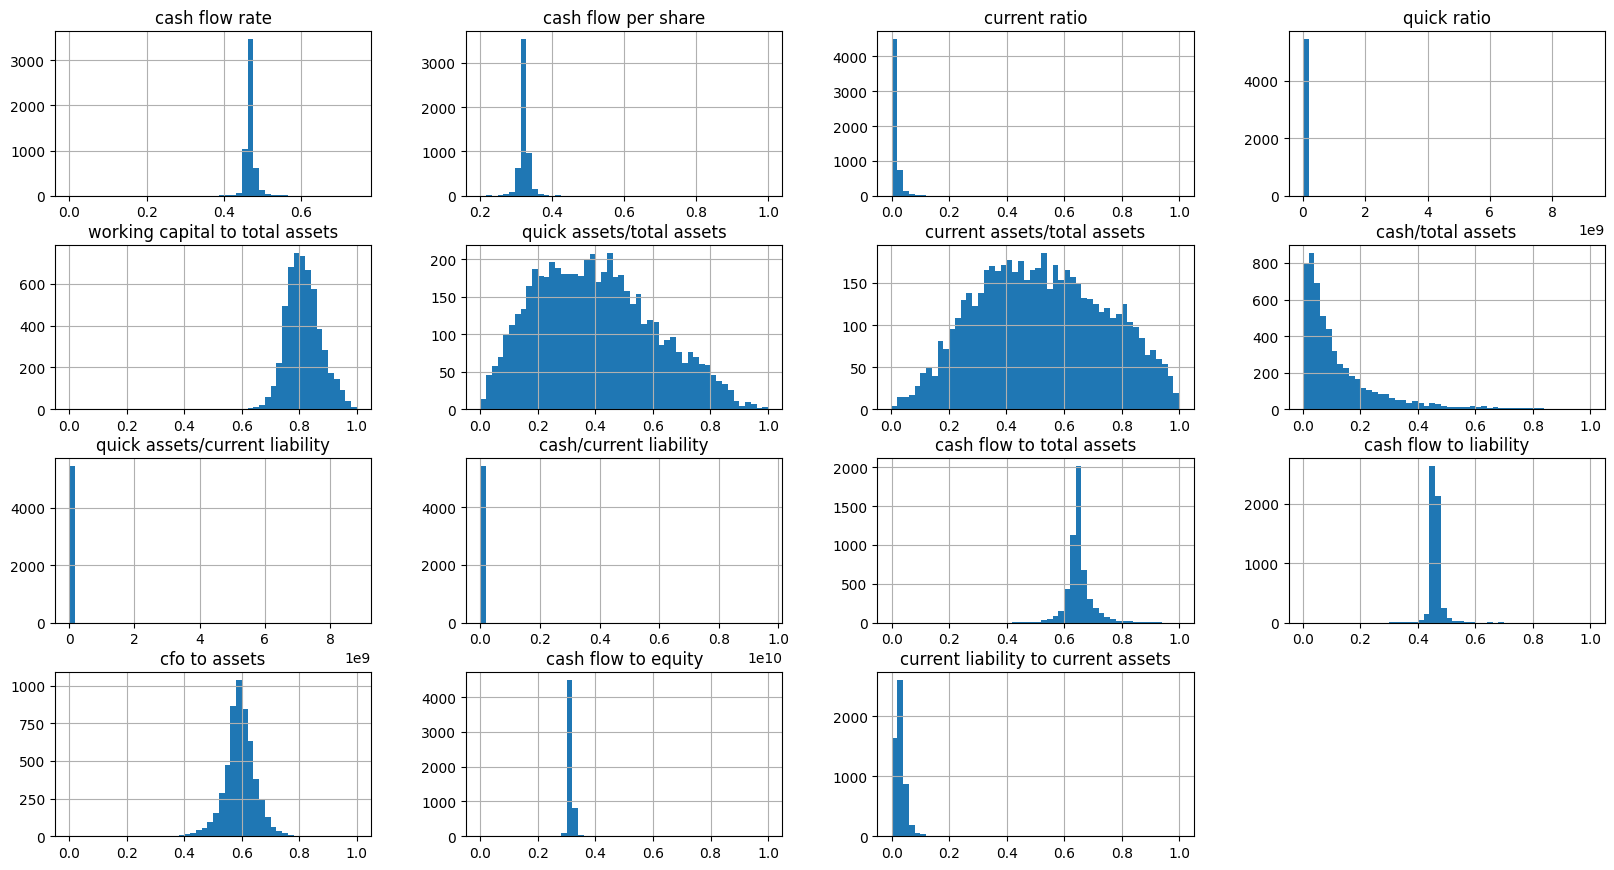

In [19]:
liquidity_data.hist(figsize=(20, 16), bins=50, layout=(6, 4)) # bins = 50 to make it less noisy.

#### Insight

* Pada faktor likuiditas, statistik deskriptif menunjukkan adanya outlier yang sangat ekstrem pada beberapa fitur. Hal ini dibuktikan oleh perbedaan yang masif antara nilai mean dan median pada fitur seperti quick ratio, di mana mean-nya mencapai 8.19 juta sementara median-nya hanya 0.007.
* Sementara itu, nilai mean yang berkisar di antara 0-1. Ini menunjukkan ada kesalahan input atau input yang tidak sesuai karena tidak mungkin pembagi nilainya hampir jutaan bahkan mencapai mendekati miliaran
* Ini juga dibuktikan dengan hasil boxplot yang outlier sangat ekstrim dalam skala log
* Demikian dengan distribusi pada data terlihat outlier membuat distribusi menjadi skew, baik positif maupun negatif

### Faktor Leverage/Solvabilitas

In [20]:
# create df for leverage/solvabilitas
leverage_data = train_set[faktor_solvabilitas_leverage]

In [21]:
leverage_data.describe().T

count          mean  \
total debt/total net worth                          5455.0  2.294225e+06   
debt ratio %                                        5455.0  1.132499e-01   
net worth/assets                                    5455.0  8.867501e-01   
long-term fund suitability ratio (a)                5455.0  8.662497e-03   
borrowing dependency                                5455.0  3.746667e-01   
contingent liabilities/net worth                    5455.0  6.002604e-03   
current liability to assets                         5455.0  9.076958e-02   
current liabilities/liability                       5455.0  7.617091e-01   
current liabilities/equity                          5455.0  3.314817e-01   
long-term liability to current assets               5455.0  5.475223e+07   
current liability to liability                      5455.0  7.617091e-01   
current liability to equity                         5455.0  3.314817e-01   
equity to long-term liability                       5455.0  1.155754e-01   
liability-assets flag                               5455.0  9.165903e-04   
liability to equity                                 5455.0  2.804100e-01   
degree of financial leverage (dfl)                  5455.0  2.764245e-02   
interest coverage ratio (interest expense to ebit)  5455.0  5.653023e-01   
equity to liability                                 5455.0  4.743030e-02   

                                                             std       min  \
total debt/total net worth                          9.706757e+07  0.000000   
debt ratio %                                        5.424757e-02  0.000000   
net worth/assets                                    5.424757e-02  0.000000   
long-term fund suitability ratio (a)                2.793932e-02  0.000000   
borrowing dependency                                1.431347e-02  0.187124   
contingent liabilities/net worth                    1.358828e-02  0.000000   
current liability to assets                         5.080315e-02  0.000000   
current liabilities/liability                       2.078034e-01  0.000000   
current liabilities/equity                          1.324537e-02  0.153811   
long-term liability to current assets               5.631836e+08  0.000000   
current liability to liability                      2.078034e-01  0.000000   
current liability to equity                         1.324537e-02  0.153811   
equity to long-term liability                       1.838841e-02  0.025851   
liability-assets flag                               3.026414e-02  0.000000   
liability to equity                                 1.382055e-02  0.133503   
degree of financial leverage (dfl)                  1.737847e-02  0.000000   
interest coverage ratio (interest expense to ebit)  1.431974e-02  0.000000   
equity to liability                                 4.904383e-02  0.000000   

                                                         25%       50%  \
total debt/total net worth                          0.003008  0.005542   
debt ratio %                                        0.072860  0.111407   
net worth/assets                                    0.851060  0.888593   
long-term fund suitability ratio (a)                0.005244  0.005651   
borrowing dependency                                0.370154  0.372628   
contingent liabilities/net worth                    0.005366  0.005366   
current liability to assets                         0.053190  0.082584   
current liabilities/liability                       0.627889  0.807997   
current liabilities/equity                          0.328100  0.329679   
long-term liability to current assets               0.000000  0.001944   
current liability to liability                      0.627889  0.807997   
current liability to equity                         0.328100  0.329679   
equity to long-term liability                       0.110933  0.112324   
liability-assets flag                               0.000000  0.000000   
liability to eq

#### Boxplot

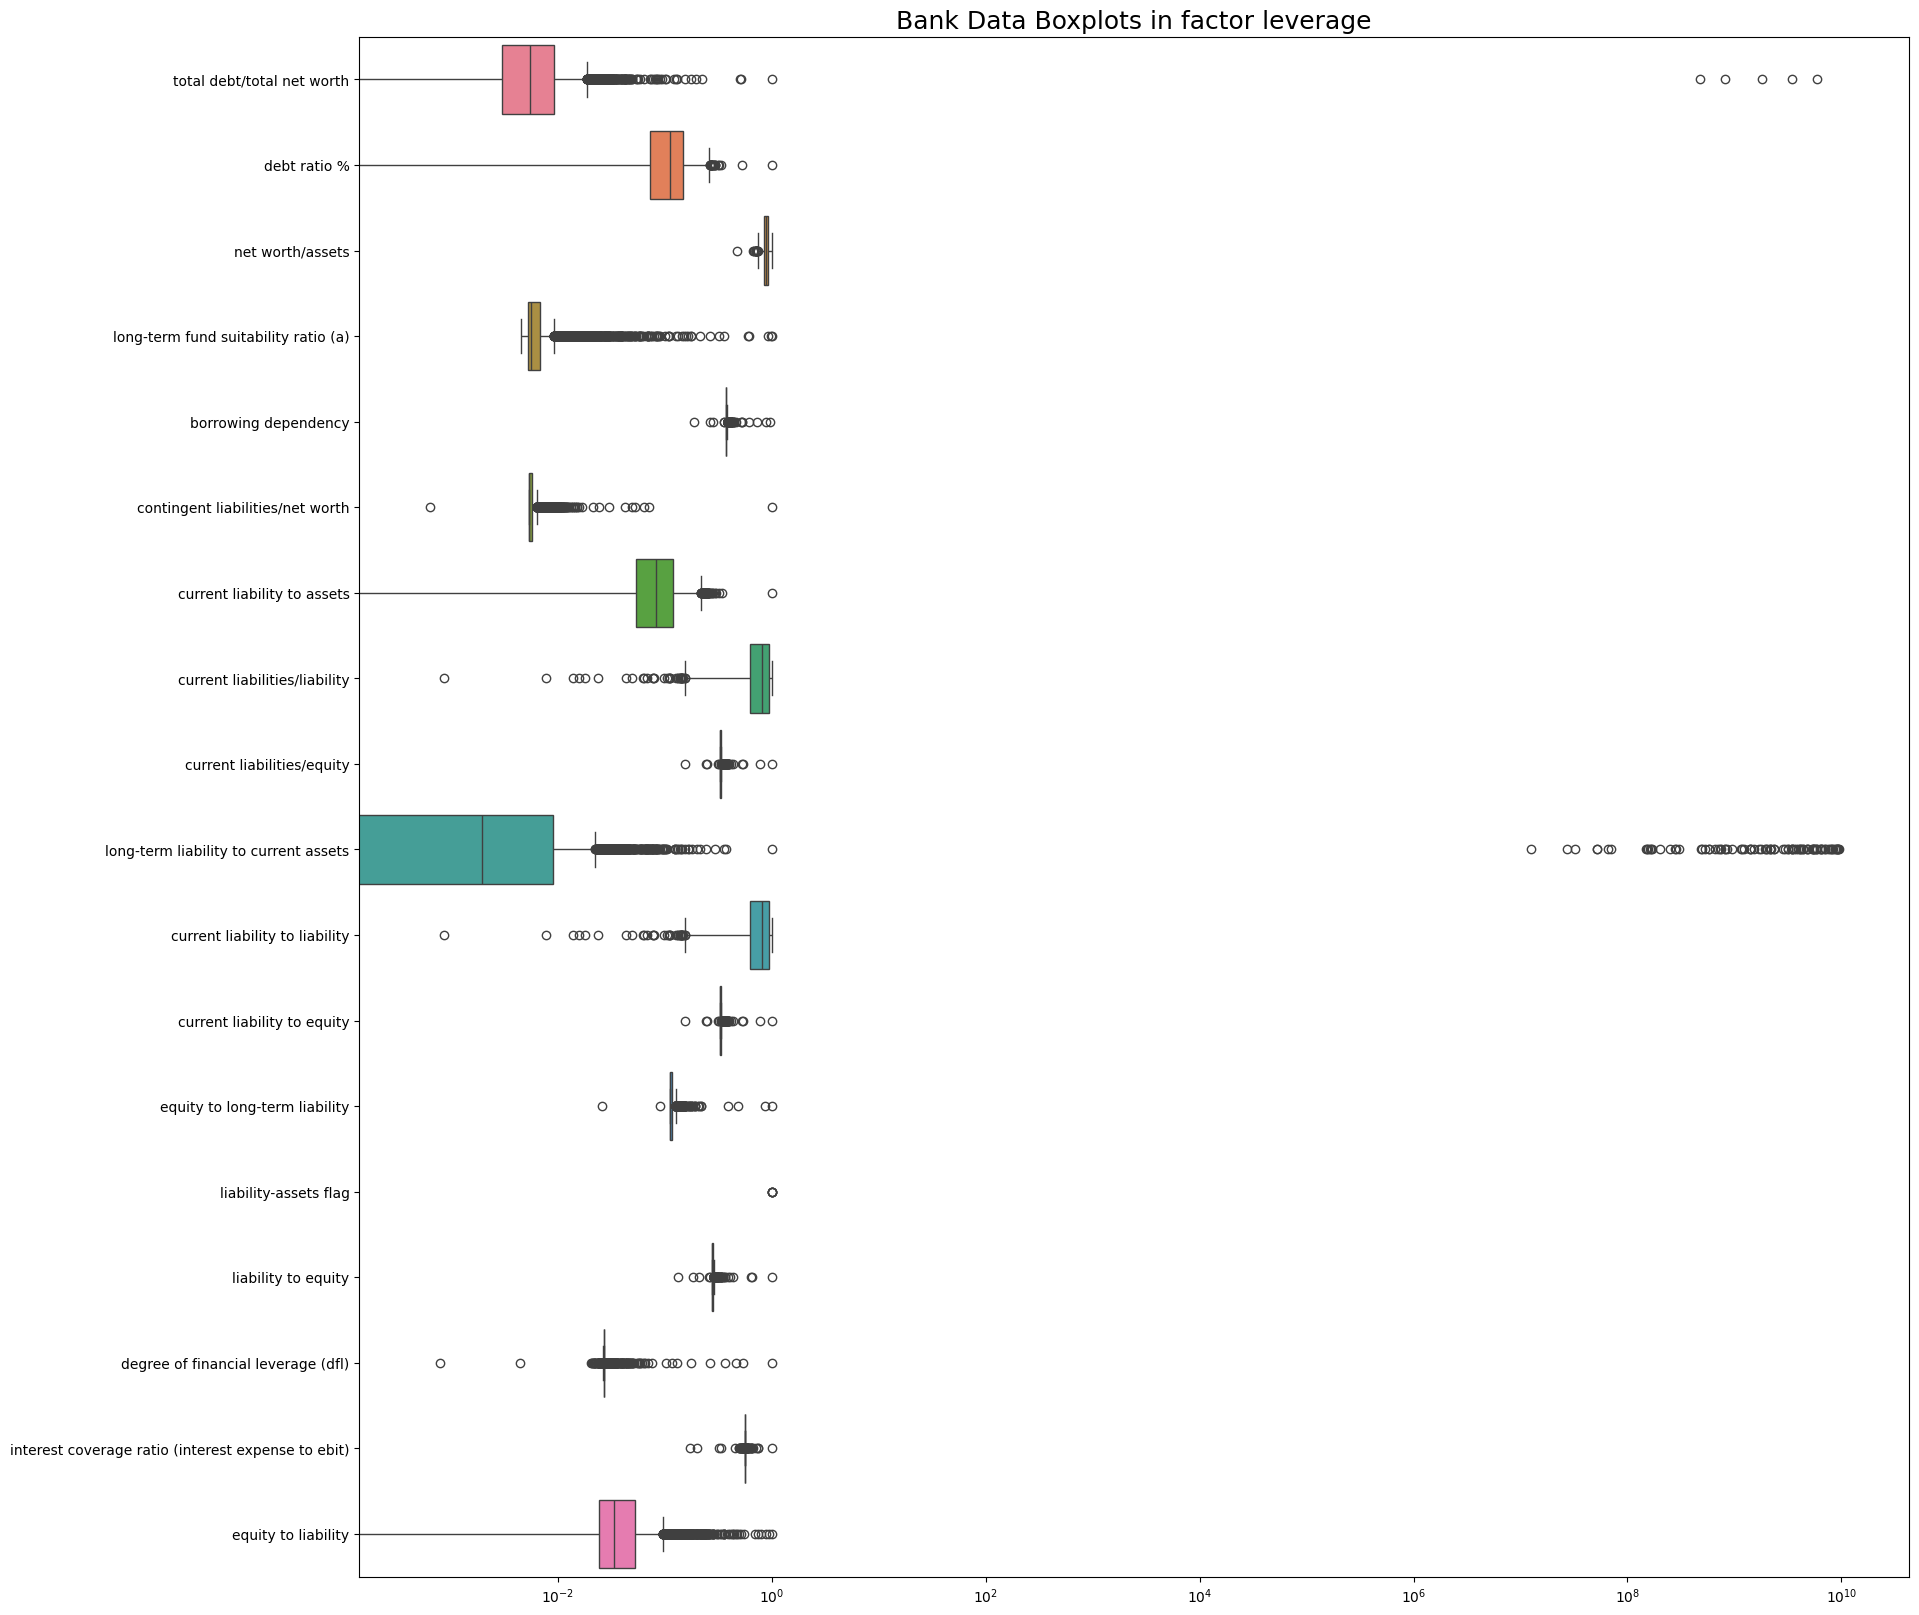

In [22]:
# viusalize histogram
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = leverage_data, orient="h")
ax.set_title('Bank Data Boxplots in factor leverage', fontsize = 18)
ax.set(xscale="log")
plt.show()

#### Histogram

array([[<Axes: title={'center': 'total debt/total net worth'}>,
        <Axes: title={'center': 'debt ratio %'}>,
        <Axes: title={'center': 'net worth/assets'}>,
        <Axes: title={'center': 'long-term fund suitability ratio (a)'}>],
       [<Axes: title={'center': 'borrowing dependency'}>,
        <Axes: title={'center': 'contingent liabilities/net worth'}>,
        <Axes: title={'center': 'current liability to assets'}>,
        <Axes: title={'center': 'current liabilities/liability'}>],
       [<Axes: title={'center': 'current liabilities/equity'}>,
        <Axes: title={'center': 'long-term liability to current assets'}>,
        <Axes: title={'center': 'current liability to liability'}>,
        <Axes: title={'center': 'current liability to equity'}>],
       [<Axes: title={'center': 'equity to long-term liability'}>,
        <Axes: title={'center': 'liability-assets flag'}>,
        <Axes: title={'center': 'liability to equity'}>,
        <Axes: title={'center': 'degree 

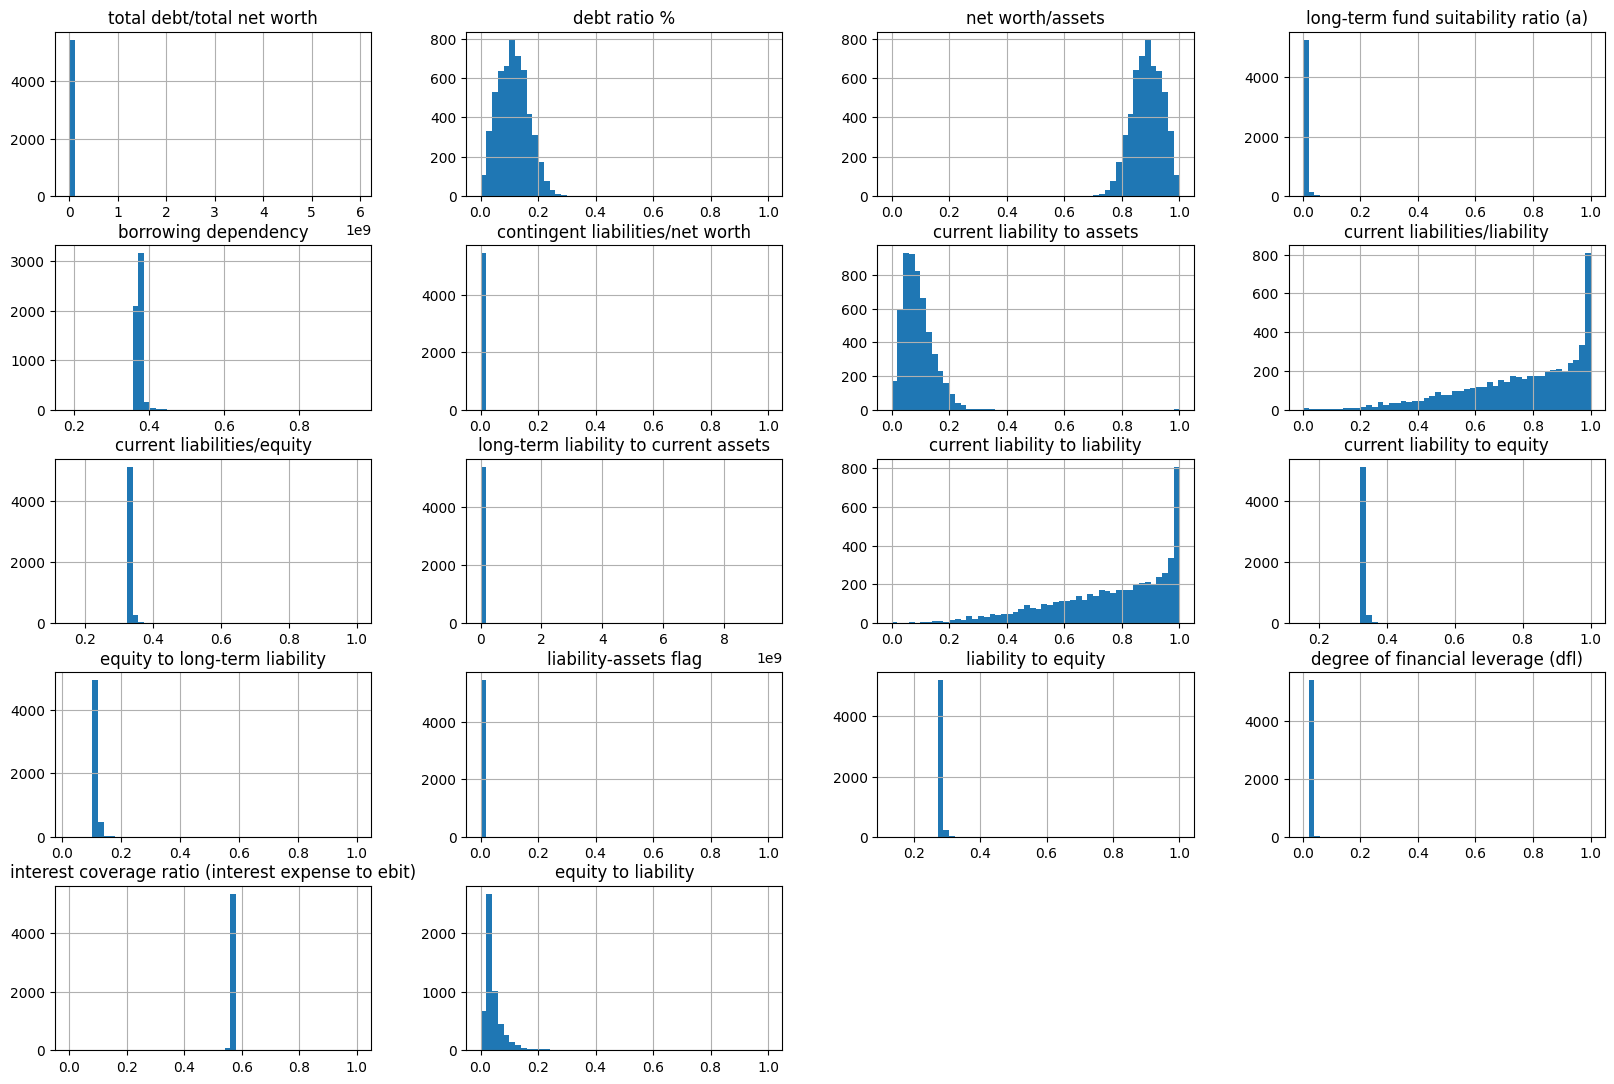

In [23]:
leverage_data.hist(figsize=(20, 16), bins=50, layout=(6, 4)) # bins = 50 to make it less noisy.

#### Insight

* Beberapa nilai kembali terlihat adanya nilai yang ekstrem dan tidak masuk akal untuk sebuah rasio. Salah satunya pada fitur total debt/total net worth dengan mean 2.294225e+06 dan median 0.005542.

* Hal yang sama juga terjadi pada long-term liability to current assets, di mana nilai meannya mencapai 5.475223e+07 dan mediannya hanya 0.001944

* Tentu secara distribusi juga terbukti, di mana nilai ekstrem membuat distribusi miring (skew)

### Faktor Efisiensi & Aktivitas Perusahaan

In [24]:
# create df for leverage/solvabilitas
effact_data = train_set[faktor_efisiensi_aktivitas]

In [25]:
effact_data.describe().T

count          mean           std  \
operating expense rate                 5455.0  1.976956e+09  3.225958e+09   
research and development expense rate  5455.0  1.945017e+09  2.597449e+09   
revenue per share (yuan ¥)             5455.0  1.107241e+06  5.007130e+07   
interest expense ratio                 5455.0  6.309311e-01  1.120606e-02   
total asset turnover                   5455.0  1.414028e-01  9.933065e-02   
accounts receivable turnover           5455.0  1.304876e+07  2.947630e+08   
average collection days                5455.0  1.038992e+07  2.644928e+08   
inventory turnover rate (times)        5455.0  2.146663e+09  3.243895e+09   
fixed assets turnover frequency        5455.0  1.019608e+09  2.492271e+09   
net worth turnover rate (times)        5455.0  3.867769e-02  3.749318e-02   
revenue per person                     5455.0  1.615032e+06  1.192830e+08   
allocation rate per person             5455.0  1.076994e+07  2.805483e+08   
total expense/assets                   5455.0  2.937103e-02  2.762335e-02   
current asset turnover rate            5455.0  1.196050e+09  2.822735e+09   
quick asset turnover rate              5455.0  2.183283e+09  3.387366e+09   
working capitcal turnover rate         5455.0  5.940902e-01  5.700449e-03   
cash turnover rate                     5455.0  2.496308e+09  2.951727e+09   

                                            min       25%           50%  \
operating expense rate                 0.000000  0.000157  2.752149e-04   
research and development expense rate  0.000000  0.000129  4.920000e+08   
revenue per share (yuan ¥)             0.000000  0.015594  2.740596e-02   
interest expense ratio                 0.000000  0.630612  6.307009e-01   
total asset turnover                   0.000000  0.077961  1.199400e-01   
accounts receivable turnover           0.000000  0.000712  9.698396e-04   
average collection days                0.000000  0.004385  6.559729e-03   
inventory turnover rate (times)        0.000100  0.000171  7.325740e-04   
fixed assets turnover frequency        0.000000  0.000234  5.862858e-04   
net worth turnover rate (times)        0.000000  0.021774  2.967742e-02   
revenue per person                     0.000000  0.010367  1.846276e-02   
allocation rate per person             0.000000  0.004123  7.789988e-03   
total expense/assets                   0.000000  0.014793  2.290939e-02   
current asset turnover rate            0.000000  0.000145  1.982660e-04   
quick asset turnover rate              0.000000  0.000143  2.268861e-04   
working capitcal turnover rate         0.573381  0.593934  5.939625e-01   
cash turnover rate                     0.000000  0.000276  1.140000e+09   

                                                75%           max  
operating expense rate                 4.125000e+09  9.990000e+09  
research and development expense rate  3.410000e+09  9.980000e+09  
revenue per share (yuan ¥)             4.602447e-02  3.020000e+09  
interest expense ratio                 6.311270e-01  8.977874e-01  
total asset turnover                   1.769115e-01  1.000000e+00  
accounts receivable turnover           1.451716e-03  9.740000e+09  
average collection days                8.940854e-03  9.730000e+09  
inventory turnover rate (times)        4.620000e+09  9.990000e+09  
fixed assets turnover frequency        3.738612e-03  9.990000e+09  
net worth turnover rate (times)        4.306452e-02  1.000000e+00  
revenue per person                     3.559479e-02  8.810000e+09  
allocation rate per person             1.476213e-02  8.900000e+09  
total expense/assets                   3.591790e-02  1.000000e+00  
current asset turnover rate            4.397653e-04  1.000000e+10  
quick asset turnover rate              4.985000e+09  1.000000e+10  
working capitcal turnover rate         5.940021e-01  1.000000e+00  
cash turnover rate                     4.550000e+09  1.000000e+10

#### Boxplot

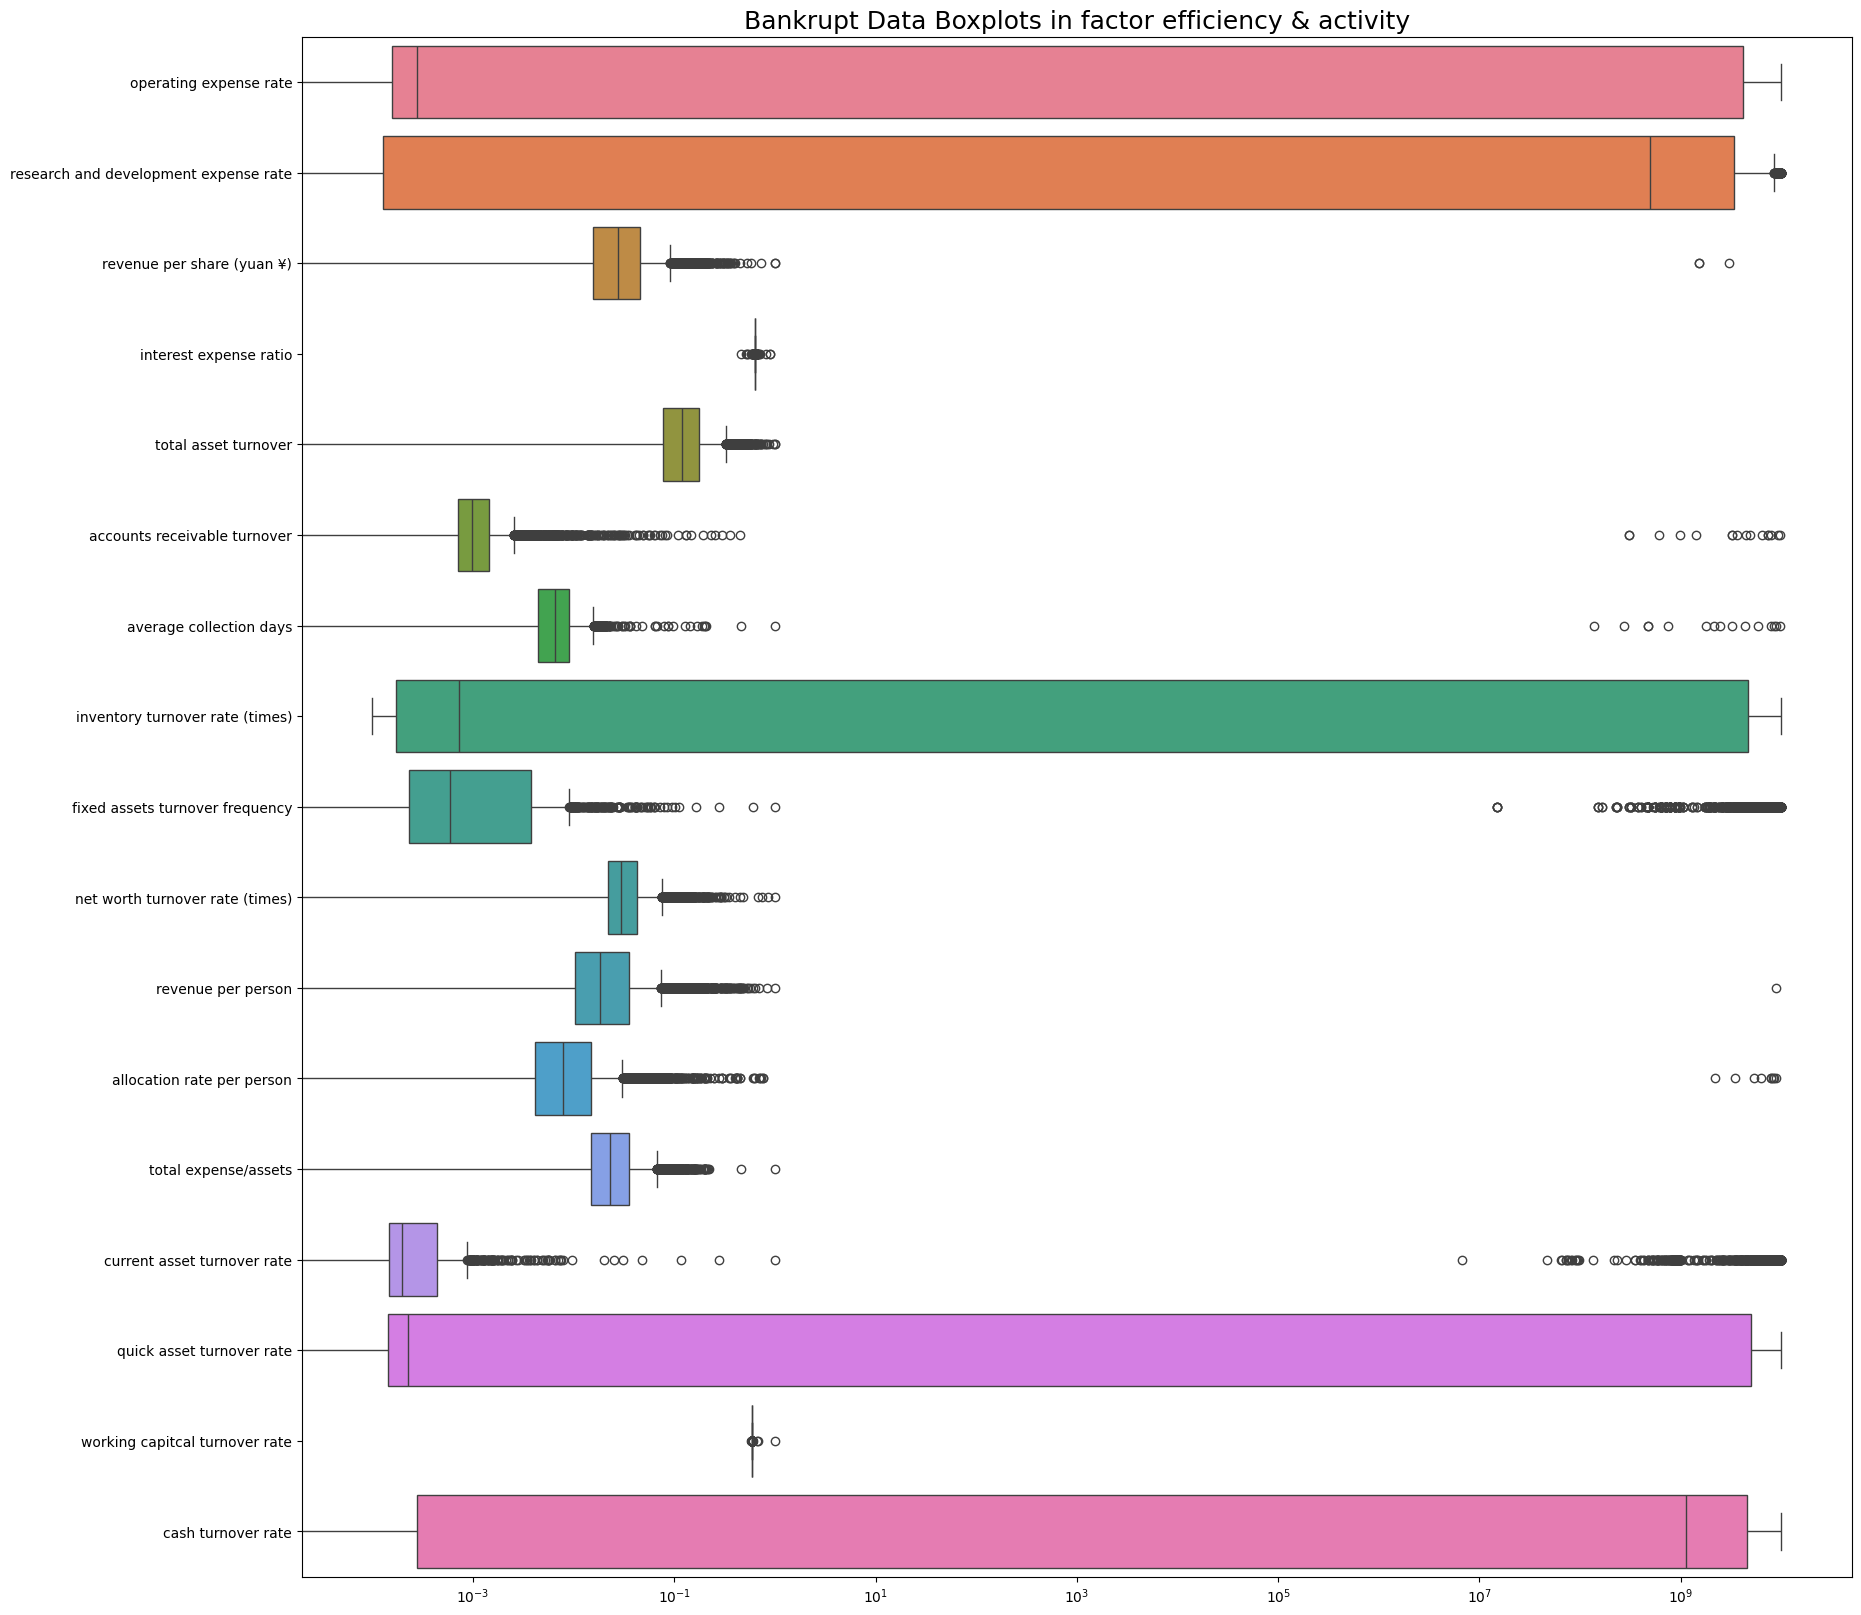

In [26]:
# viusalize histogram
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = effact_data, orient="h")
ax.set_title('Bankrupt Data Boxplots in factor efficiency & activity', fontsize = 18)
ax.set(xscale="log")
plt.show()

#### Histogram

array([[<Axes: title={'center': 'operating expense rate'}>,
        <Axes: title={'center': 'research and development expense rate'}>,
        <Axes: title={'center': 'revenue per share (yuan ¥)'}>,
        <Axes: title={'center': 'interest expense ratio'}>],
       [<Axes: title={'center': 'total asset turnover'}>,
        <Axes: title={'center': 'accounts receivable turnover'}>,
        <Axes: title={'center': 'average collection days'}>,
        <Axes: title={'center': 'inventory turnover rate (times)'}>],
       [<Axes: title={'center': 'fixed assets turnover frequency'}>,
        <Axes: title={'center': 'net worth turnover rate (times)'}>,
        <Axes: title={'center': 'revenue per person'}>,
        <Axes: title={'center': 'allocation rate per person'}>],
       [<Axes: title={'center': 'total expense/assets'}>,
        <Axes: title={'center': 'current asset turnover rate'}>,
        <Axes: title={'center': 'quick asset turnover rate'}>,
        <Axes: title={'center': 'working

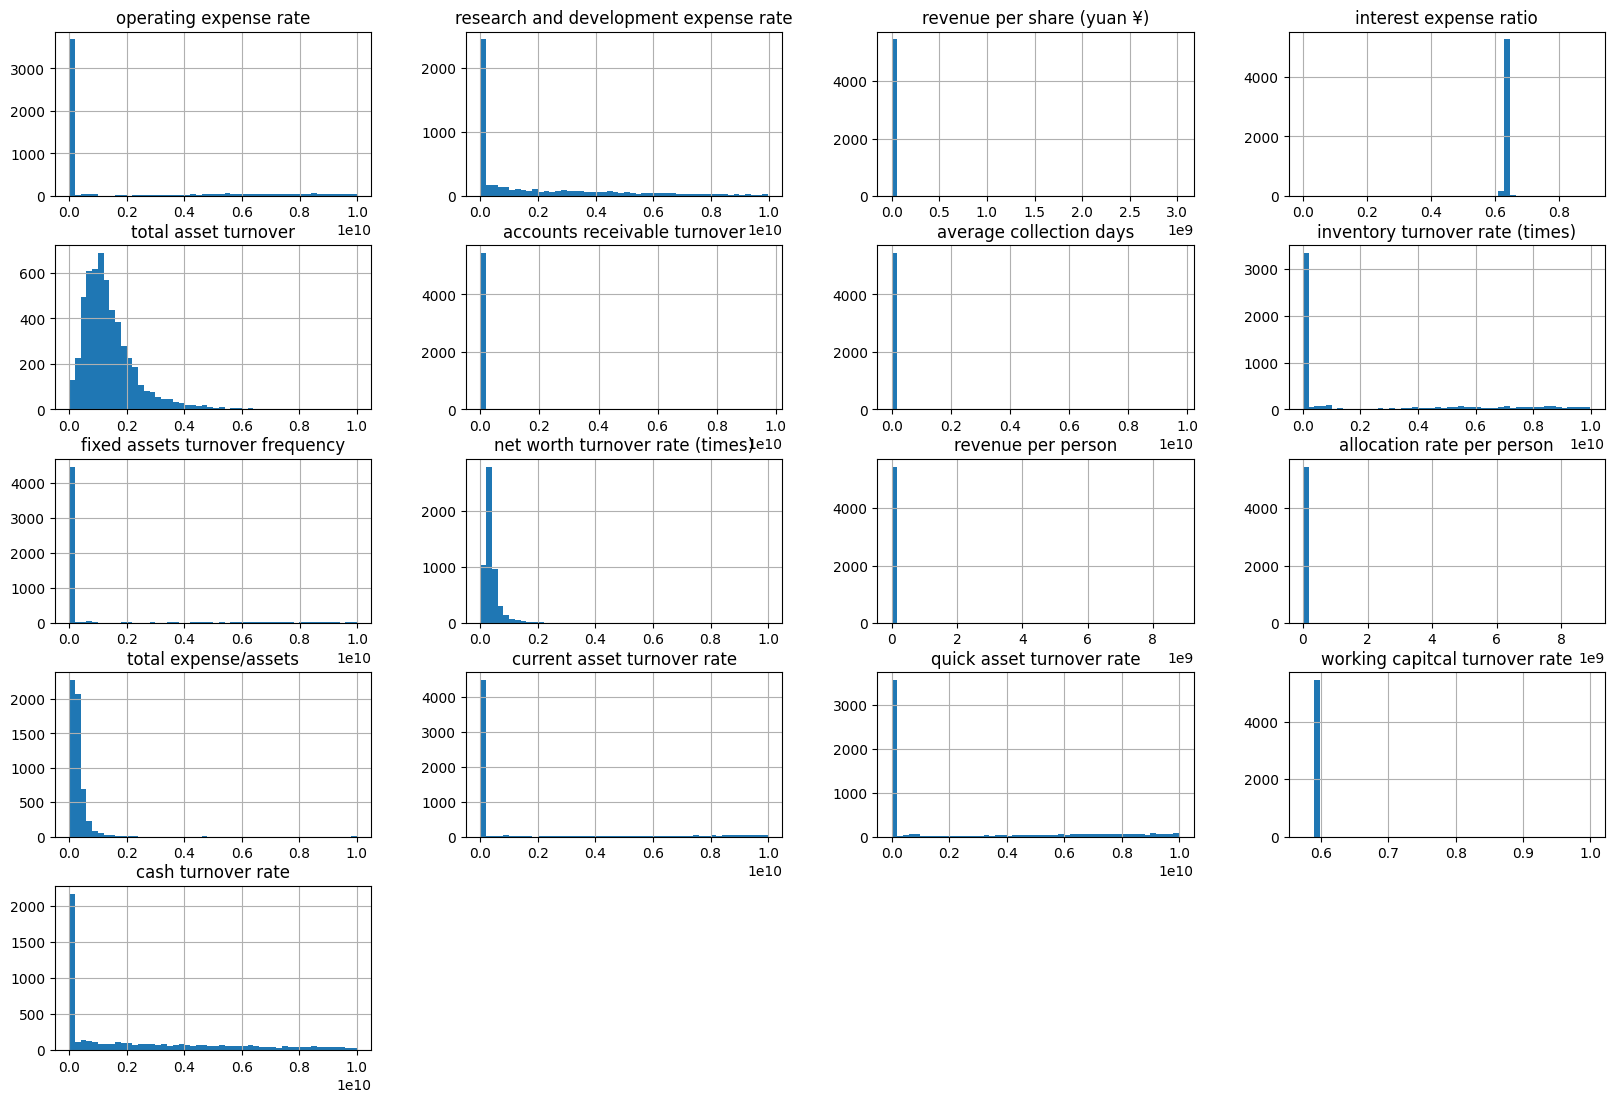

In [27]:
effact_data.hist(figsize=(20, 16), bins=50, layout=(6, 4)) # bins = 50 to make it less noisy.

#### Insight

* Sama halnya dengan faktor sebelumnya, ada beberapa fitur yang secara nilai tidak masuk akal karena ada nilai outlier, misalnya pada fitur research and development expense rate, revenue per share (yuan ¥), accounts receivable turnover, cash turnover rate.
* Namun perbedaanya terlihat ada beberapa fitur antara nilai mean dan mediannya konsisten memiliki nilai yang tidak masuk. Misalnya research and development expense rate yang memiliki mean 1.945017e+09 dan median 4.920000e+08 menunjukkan adanya nilai sangat mustahil dicapai apalagi dalam konteks rate. Kemudian ditemukan juga pada cash turnover rate yang memiliki nilai mean 2.496308e+09 dan median 1.140000e+09. Selain itu, variabel operating expense rate juga demikian. Tigaa variabel ini bisa dikonsiderasi untuk dihapus karena kecil sekali kemungkinan nilai rate yang memiliki satuan hampir jutaan bahkabn miliaran.
* Hasil juga terlihat di boxplot di mana secara nilai boxplot plot dalam scale log gambar box sangat besar yang mana jika dihapus outlier saja nilai invalid tersebut masih ada atau jumlah baris/data menjadi sangat sedikit.

### Faktor Pertumbuhan

In [28]:
growth_data = train_set[faktor_pertumbuhan]

In [29]:
growth_data.describe().T

count          mean           std  \
realized sales gross profit growth rate  5455.0  2.224576e-02  2.319257e-03   
operating profit growth rate             5455.0  8.478793e-01  1.175224e-02   
after-tax net profit growth rate         5455.0  6.890613e-01  1.484843e-02   
regular net profit growth rate           5455.0  6.890720e-01  1.488550e-02   
continuous net profit growth rate        5455.0  2.176539e-01  1.121698e-02   
total asset growth rate                  5455.0  5.509706e+09  2.888785e+09   
net value growth rate                    5455.0  2.474794e+05  1.827832e+07   
total asset return growth rate ratio     5455.0  2.640957e-01  3.750915e-03   

                                         min           25%           50%  \
realized sales gross profit growth rate  0.0  2.206475e-02  2.210215e-02   
operating profit growth rate             0.0  8.479833e-01  8.480433e-01   
after-tax net profit growth rate         0.0  6.892706e-01  6.894371e-01   
regular net profit growth rate           0.0  6.892703e-01  6.894371e-01   
continuous net profit growth rate        0.0  2.175796e-01  2.175979e-01   
total asset growth rate                  0.0  4.890000e+09  6.400000e+09   
net value growth rate                    0.0  4.405447e-04  4.612318e-04   
total asset return growth rate ratio     0.0  2.637535e-01  2.640457e-01   

                                                  75%           max  
realized sales gross profit growth rate  2.215312e-02  1.016434e-01  
operating profit growth rate             8.481223e-01  8.877039e-01  
after-tax net profit growth rate         6.896450e-01  1.000000e+00  
regular net profit growth rate           6.896450e-01  1.000000e+00  
continuous net profit growth rate        2.176213e-01  1.000000e+00  
total asset growth rate                  7.380000e+09  9.980000e+09  
net value growth rate                    4.988880e-04  1.350000e+09  
total asset return growth rate ratio     2.643860e-01  2.854294e-01

#### Boxplot

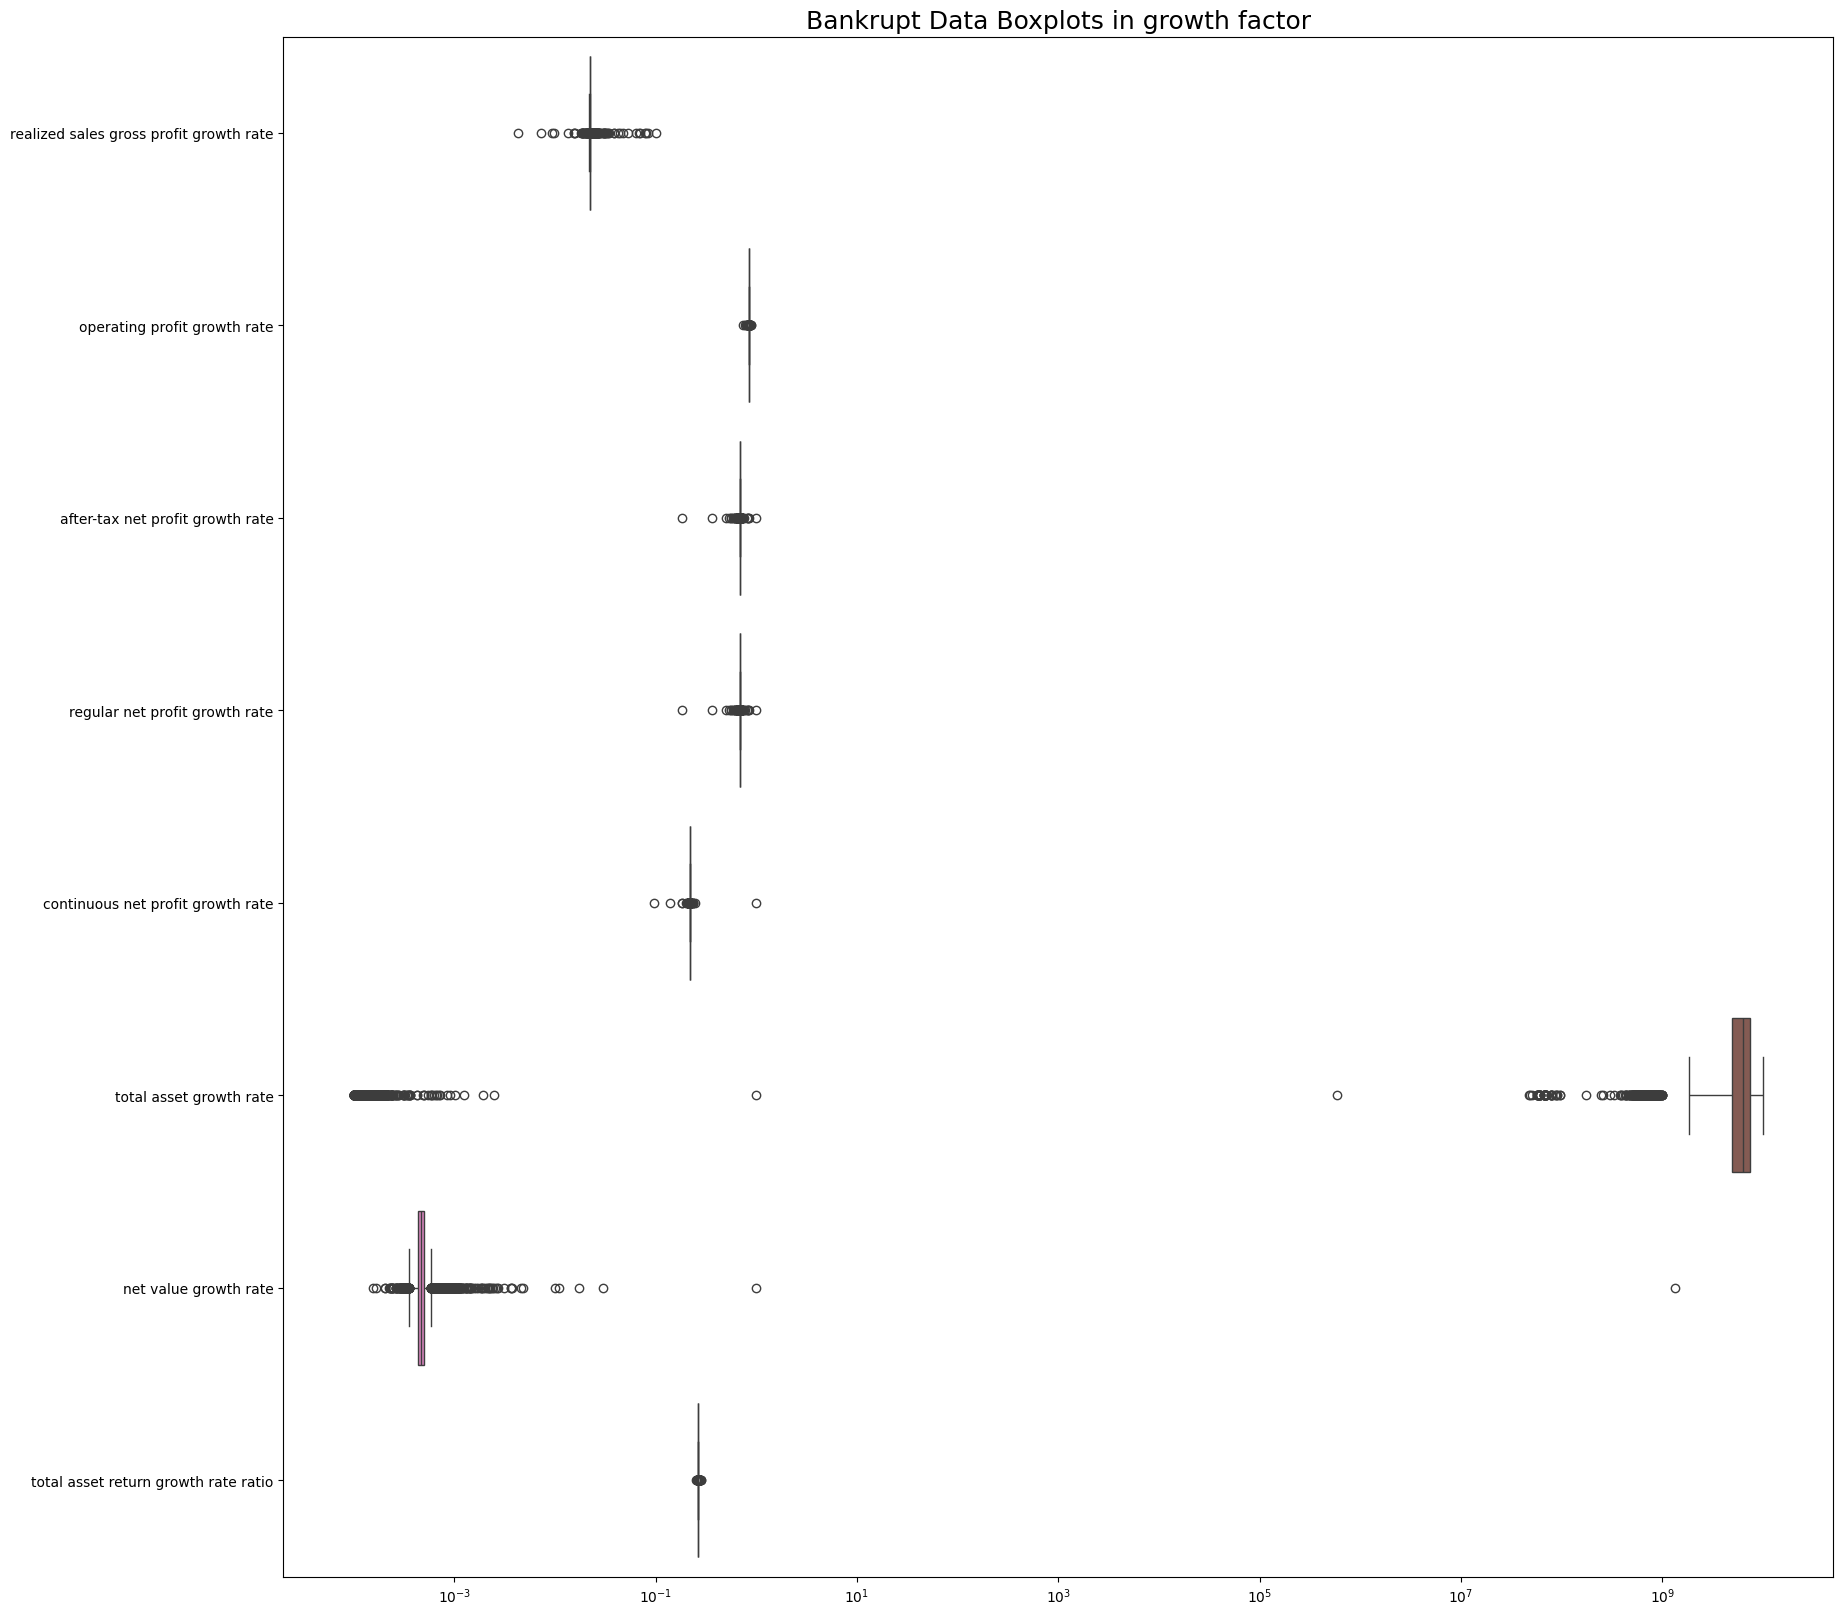

In [30]:
# viusalize histogram
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = growth_data, orient="h")
ax.set_title('Bankrupt Data Boxplots in growth factor', fontsize = 18)
ax.set(xscale="log")
plt.show()

#### Histogram

array([[<Axes: title={'center': 'realized sales gross profit growth rate'}>,
        <Axes: title={'center': 'operating profit growth rate'}>,
        <Axes: title={'center': 'after-tax net profit growth rate'}>,
        <Axes: title={'center': 'regular net profit growth rate'}>],
       [<Axes: title={'center': 'continuous net profit growth rate'}>,
        <Axes: title={'center': 'total asset growth rate'}>,
        <Axes: title={'center': 'net value growth rate'}>,
        <Axes: title={'center': 'total asset return growth rate ratio'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

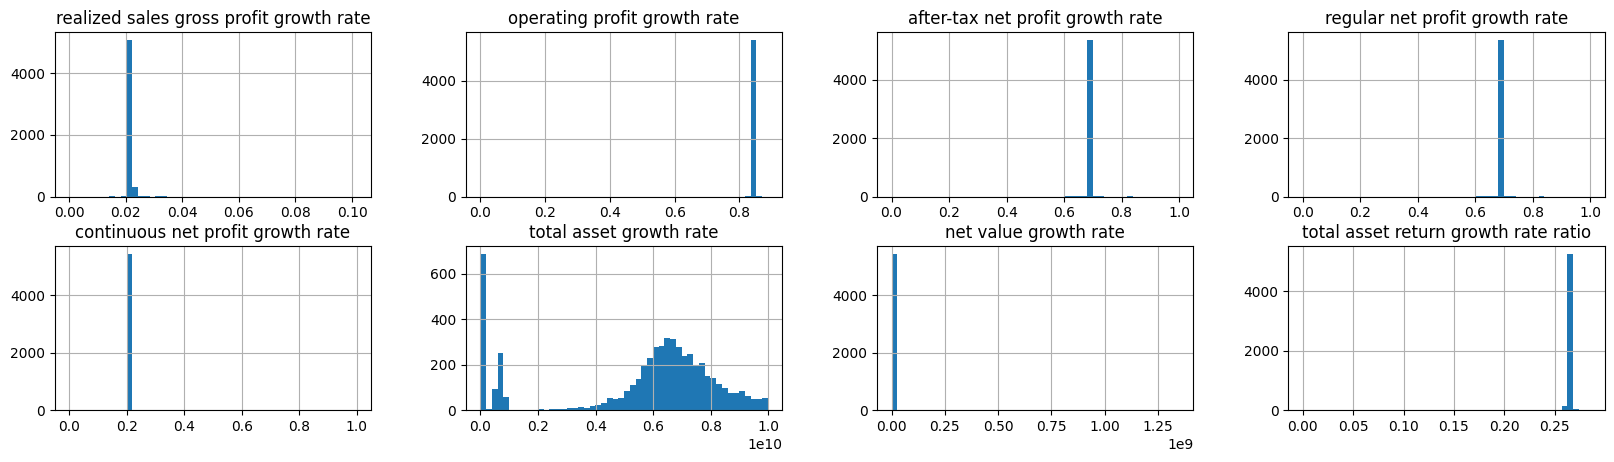

In [31]:
growth_data.hist(figsize=(20, 16), bins=50, layout=(6, 4)) # bins = 50 to make it less noisy.

#### Insight

* Ditemukan kembali bahwa fitur total asset growth rate ini juga memiliki yang tidak valid secara keseluruhan atau mayoritasnya. Ini terlihat dari mean dan median yang nilai meannya 5.509706e+09 dan mediannya 6.400000e+09. Variabel ini dintinjau dan dipertimbangkan untuk dihapus saja karena secara mayoritas nilainya tidak masuk akal untuk sebuah nilai yang menggambarkan "rate"
* Selanjutnya, hal yang perlu dipahami dalam visualisasi boxplot scale dalam log jadi box yang terhimpit bisa saja hasilnya berbeda nanti jika axis-x bukanlah dalam skala log.

### Faktor Valuasi Pasar

In [32]:
valuation_data = train_set[faktor_nilai_pasar_valuasi]

In [33]:
valuation_data.describe().T

count      mean       std  min       25%       50%  \
net value per share (b)  5455.0  0.190040  0.031233  0.0  0.173486  0.184063   
net value per share (a)  5455.0  0.190028  0.031283  0.0  0.173486  0.184063   
net value per share (c)  5455.0  0.190058  0.031291  0.0  0.173528  0.184105   
cash reinvestment %      5455.0  0.379543  0.019506  0.0  0.374772  0.380425   
working capital/equity   5455.0  0.735832  0.012404  0.0  0.733569  0.736016   

                              75%       max  
net value per share (b)  0.199107  0.549197  
net value per share (a)  0.199149  0.549197  
net value per share (c)  0.199149  0.549197  
cash reinvestment %      0.386526  0.759947  
working capital/equity   0.738606  1.000000

#### Boxplot

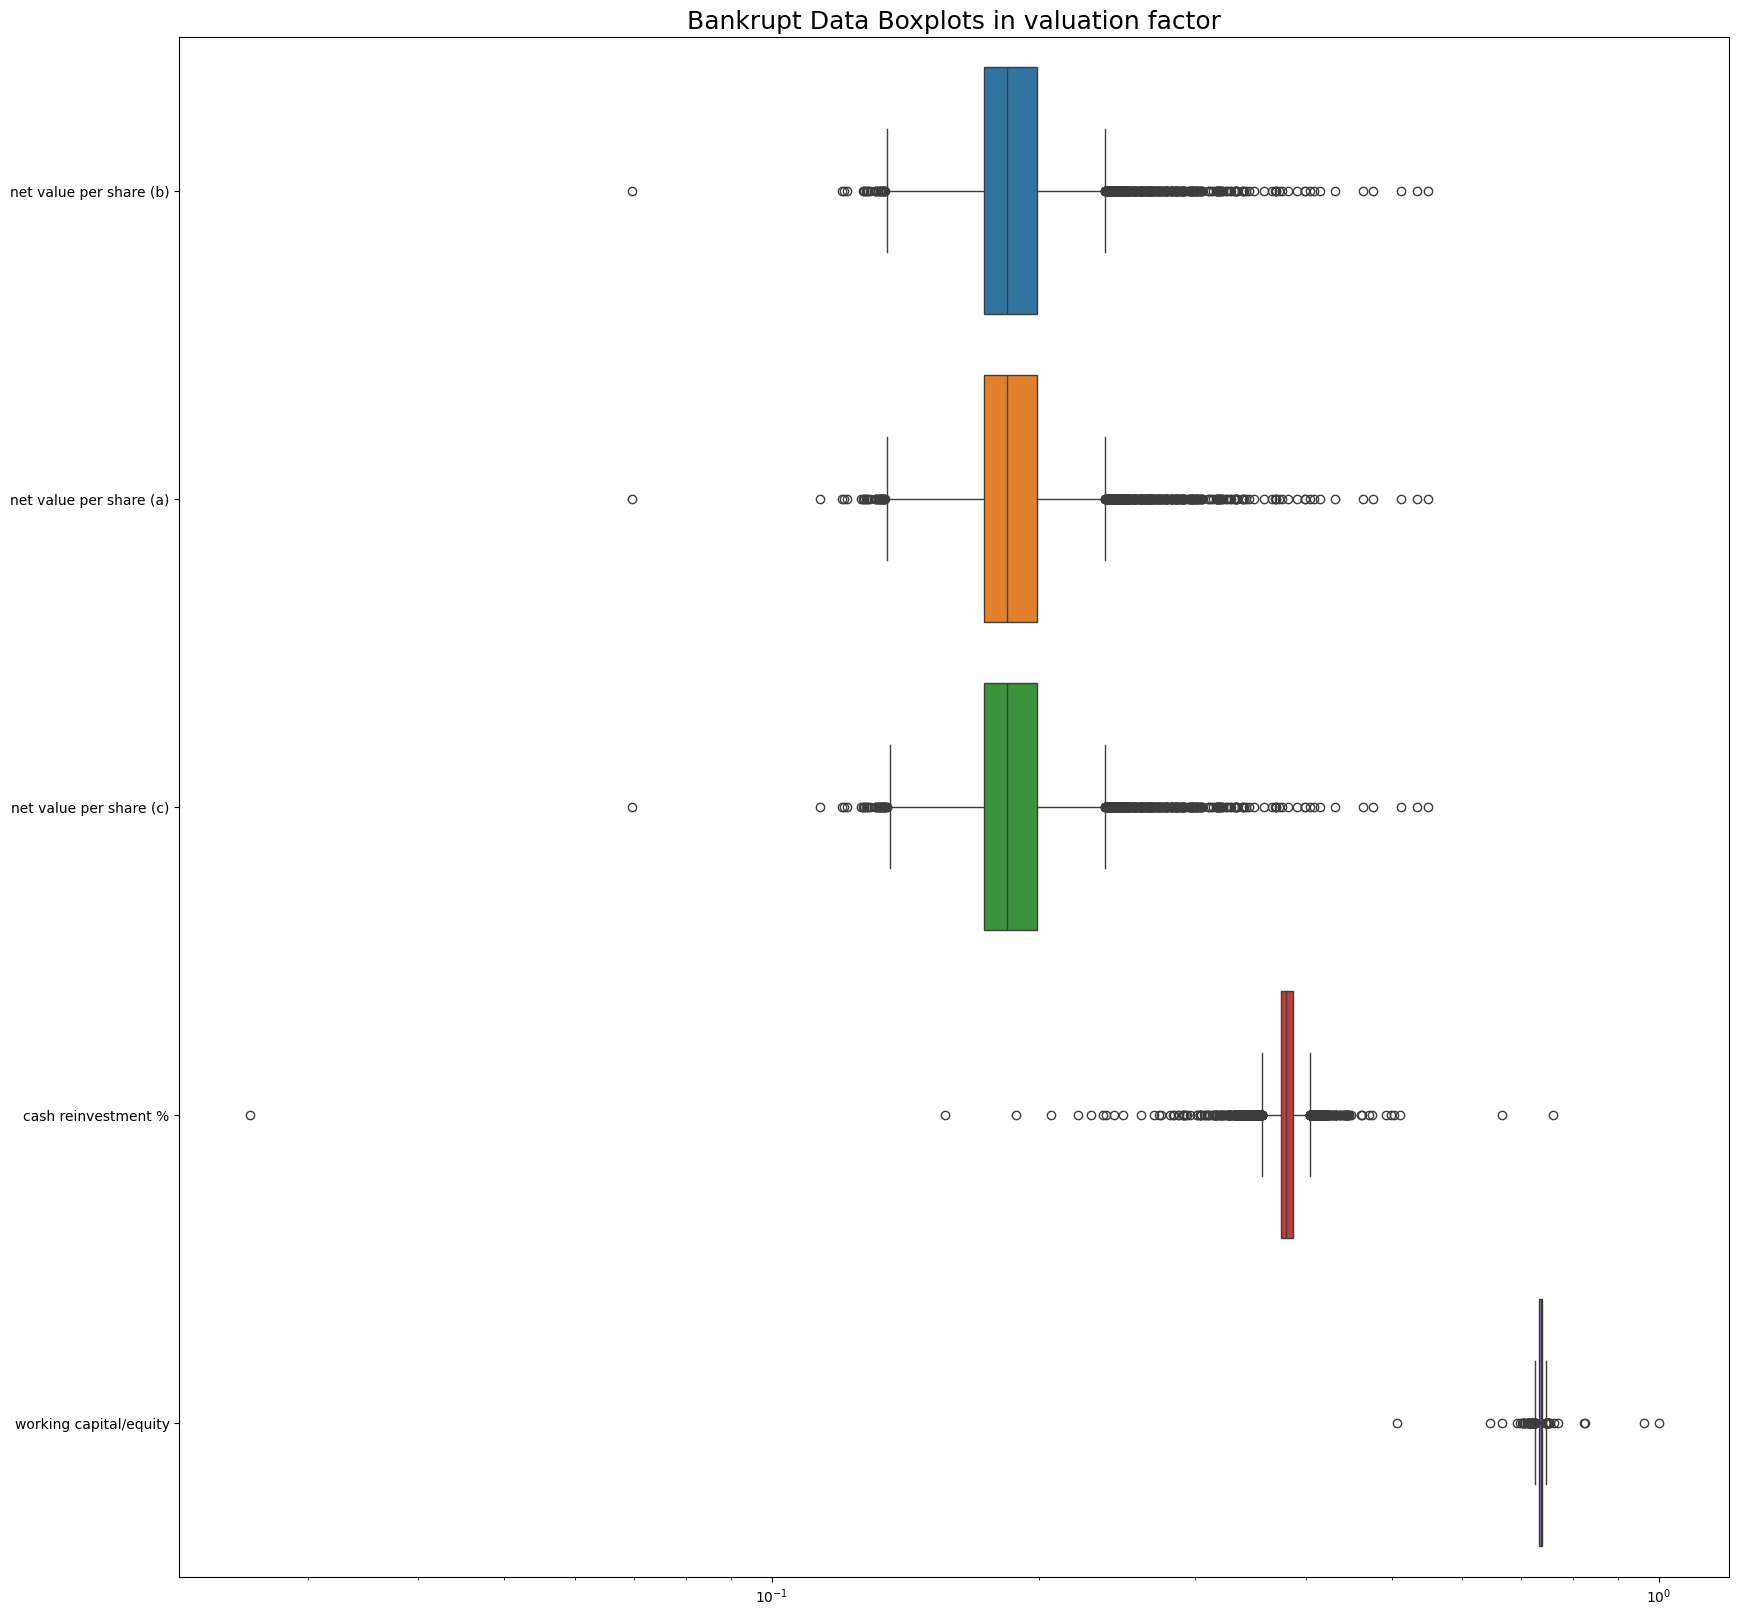

In [34]:
# viusalize histogram
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = valuation_data, orient="h")
ax.set_title('Bankrupt Data Boxplots in valuation factor', fontsize = 18)
ax.set(xscale="log")
plt.show()

#### Histogram

array([[<Axes: title={'center': 'net value per share (b)'}>,
        <Axes: title={'center': 'net value per share (a)'}>,
        <Axes: title={'center': 'net value per share (c)'}>,
        <Axes: title={'center': 'cash reinvestment %'}>],
       [<Axes: title={'center': 'working capital/equity'}>, <Axes: >,
        <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

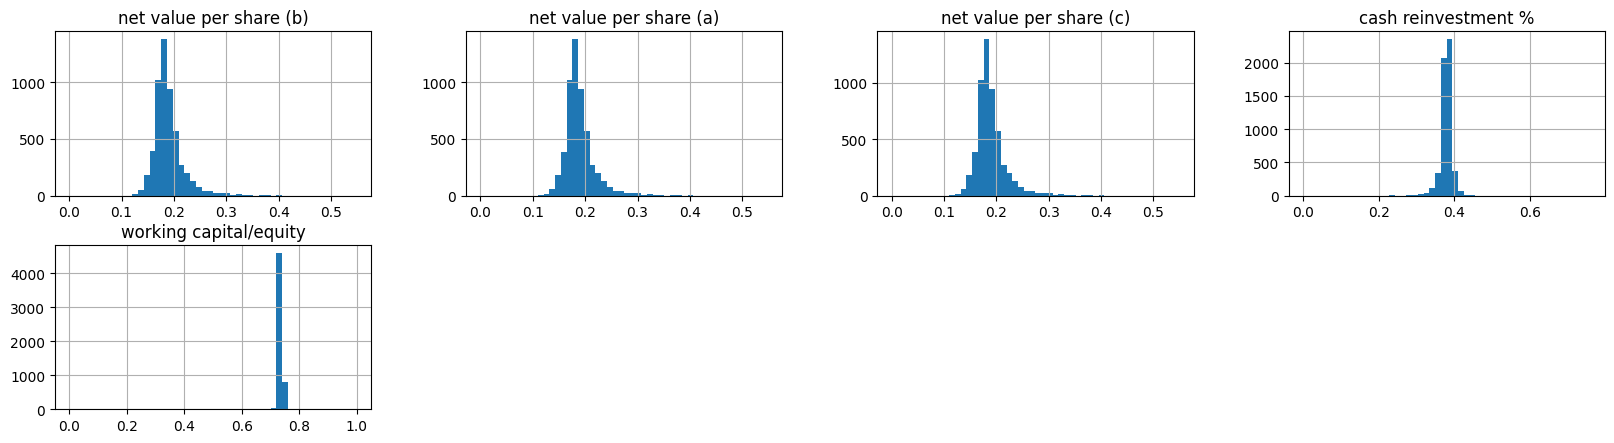

In [35]:
valuation_data.hist(figsize=(20, 16), bins=50, layout=(6, 4)) # bins = 50 to make it less noisy.

#### Insight

* Berbeda dengan faktor-faktor seblumnya, fitur dalam faktor valuasi memiliki nilai yang masuk akal tidak ada nilai yang mencapai jutaan atau miliaran. Walaupun memang masih ada outlier, poinnya outlier masih masuk akal bukan nilai yang invalid/tidak masuk akal secara informasi yang ditampilkan

* Hal tersebut terbukti pada boxplot dan histogram pada faktor ini, di mana boxplot jika dilihat dari axis-x nya nilai log berada di rentaang 10^0 (1) dan 10^-1 (0.1) dengan beberapa nilai outlier. Ini juga terlihat pada gambar box yang tidak terhimpit, berbeda dengan sebelumnya yang terhimpit karena ada nilai ekstrem yang sangat tidak masuk akal

### Faktor Lainnya

In [36]:
others_data = train_set[faktor_lain_lain]

In [37]:
others_data.describe().T

count          mean  \
interest-bearing debt interest rate          5455.0  1.659047e+07   
tax rate (a)                                 5455.0  1.150275e-01   
inventory and accounts receivable/net value  5455.0  4.025523e-01   
inventory/working capital                    5455.0  2.774858e-01   
inventory/current liability                  5455.0  5.691890e+07   
cash flow to sales                           5455.0  6.716591e-01   
fixed assets to assets                       5455.0  1.525206e+06   
total assets to gnp price                    5455.0  1.909698e+07   
no-credit interval                           5455.0  6.238247e-01   

                                                      std       min       25%  \
interest-bearing debt interest rate          1.092856e+08  0.000000  0.000204   
tax rate (a)                                 1.402188e-01  0.000000  0.000000   
inventory and accounts receivable/net value  1.274473e-02  0.351419  0.397427   
inventory/working capital                    1.101006e-02  0.075397  0.277036   
inventory/current liability                  5.842404e+08  0.000000  0.003215   
cash flow to sales                           4.869708e-03  0.652037  0.671565   
fixed assets to assets                       1.126486e+08  0.000000  0.085745   
total assets to gnp price                    3.844311e+08  0.000000  0.000901   
no-credit interval                           1.226877e-02  0.000000  0.623635   

                                                  50%       75%           max  
interest-bearing debt interest rate          0.000321  0.000537  9.900000e+08  
tax rate (a)                                 0.071870  0.204474  1.000000e+00  
inventory and accounts receivable/net value  0.400162  0.404532  1.000000e+00  
inventory/working capital                    0.277179  0.277435  1.000000e+00  
inventory/current liability                  0.006522  0.011163  9.910000e+09  
cash flow to sales                           0.671574  0.671587  1.000000e+00  
fixed assets to assets                       0.199469  0.373131  8.320000e+09  
total assets to gnp price                    0.002066  0.005247  9.820000e+09  
no-credit interval                           0.623875  0.624167  1.000000e+00

#### Boxplot

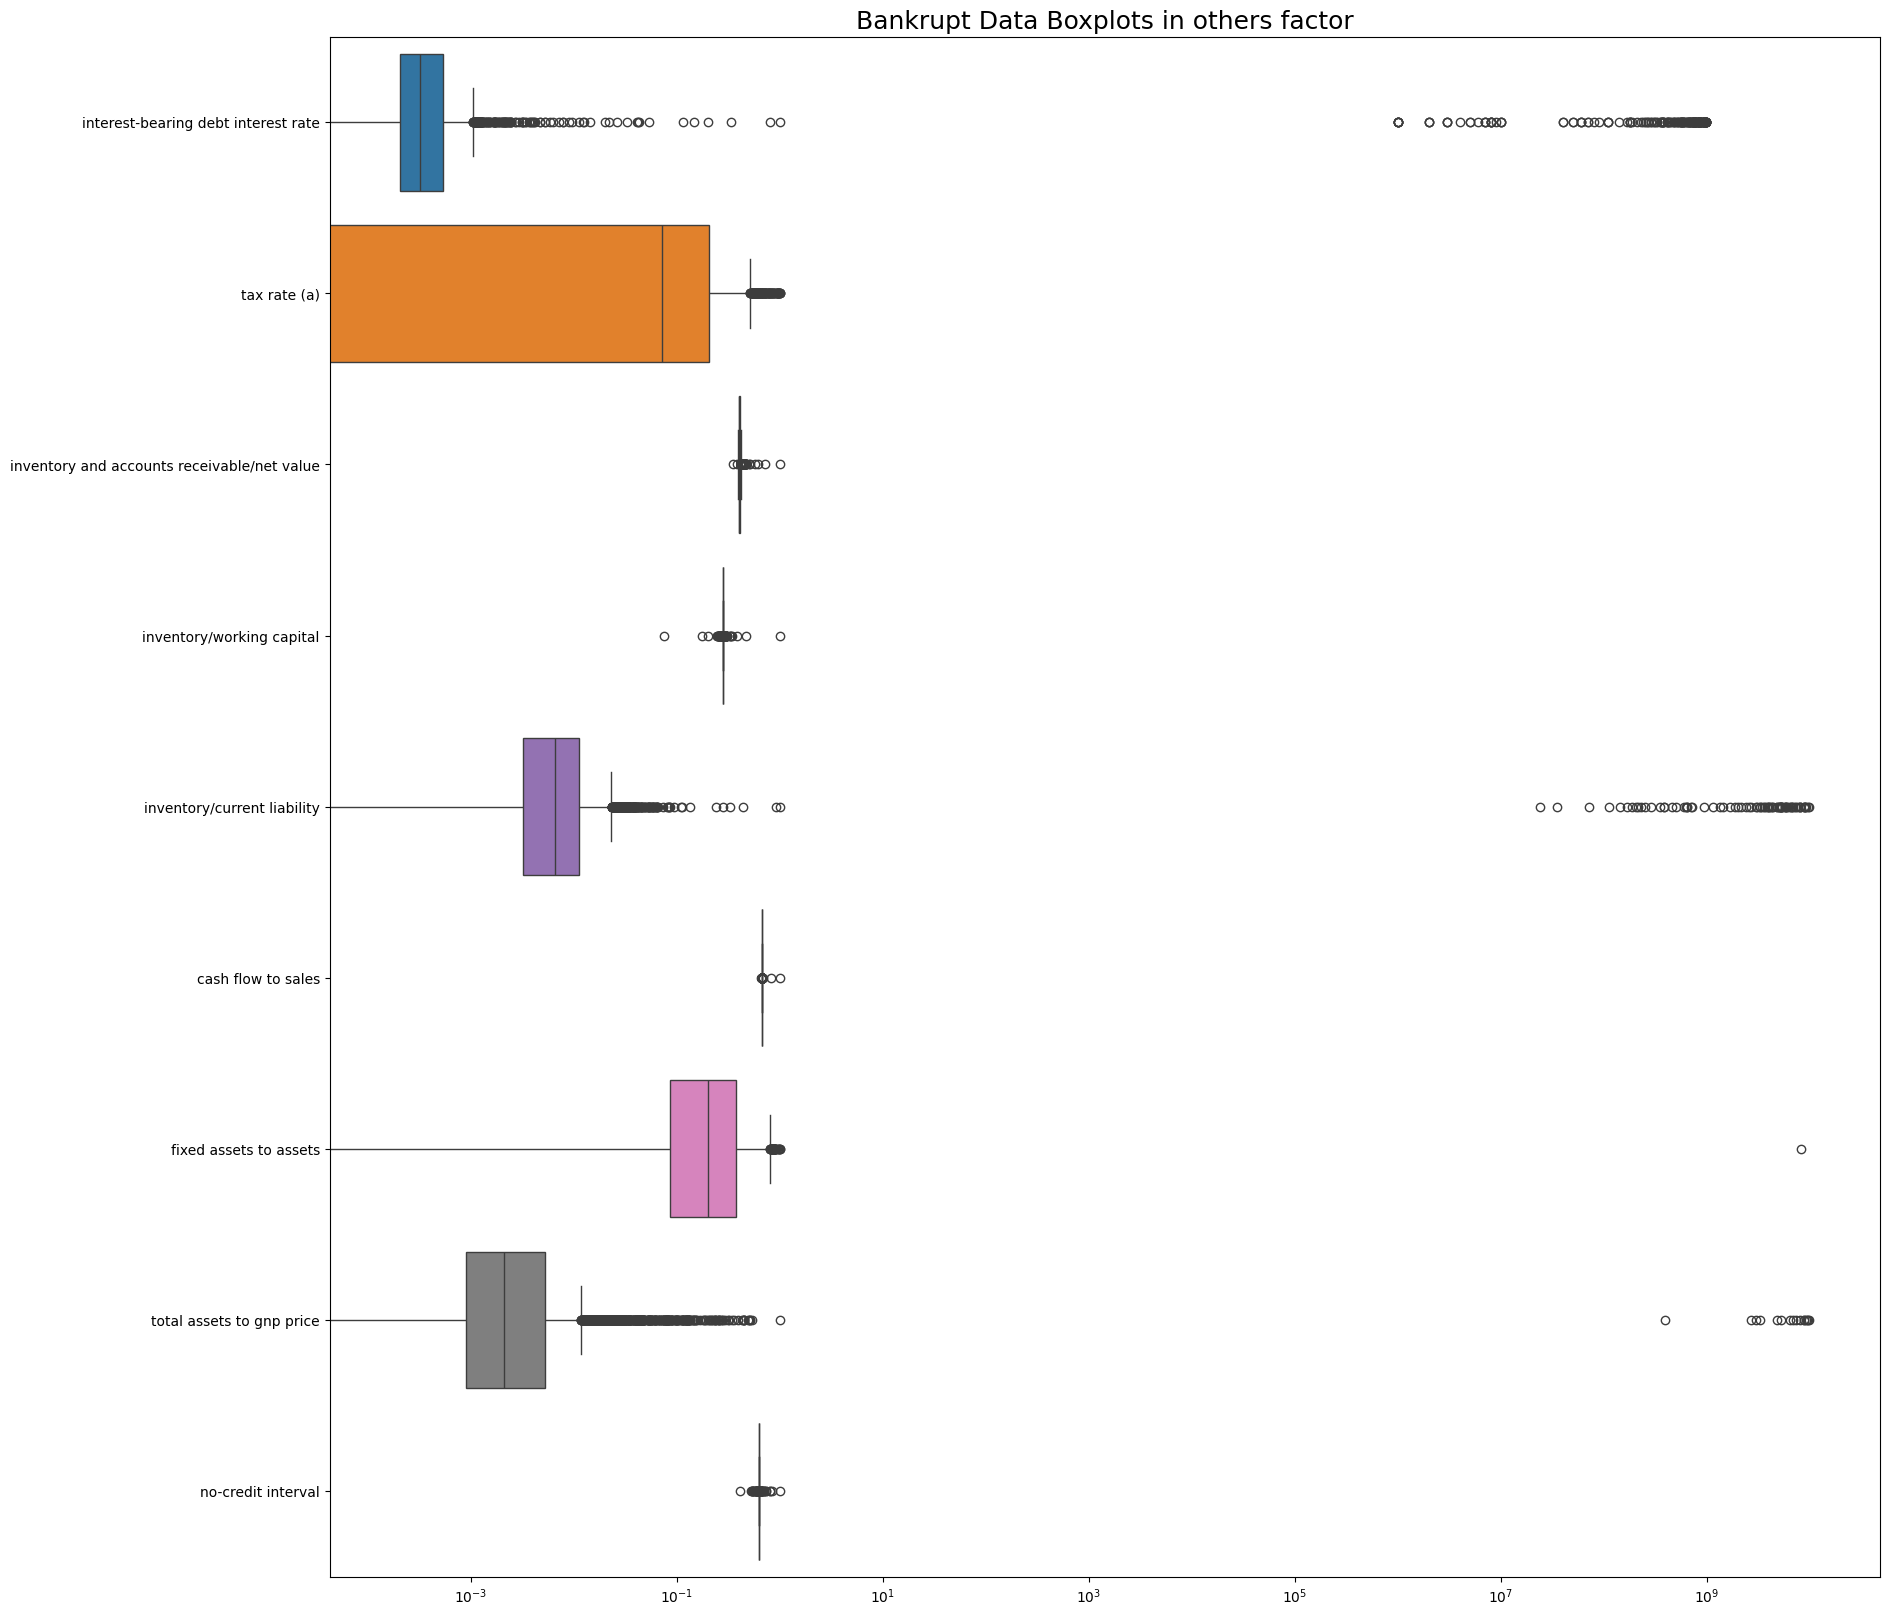

In [38]:
# viusalize histogram
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = others_data, orient="h")
ax.set_title('Bankrupt Data Boxplots in others factor', fontsize = 18)
ax.set(xscale="log")
plt.show()

#### Histogram

array([[<Axes: title={'center': 'interest-bearing debt interest rate'}>,
        <Axes: title={'center': 'tax rate (a)'}>,
        <Axes: title={'center': 'inventory and accounts receivable/net value'}>,
        <Axes: title={'center': 'inventory/working capital'}>],
       [<Axes: title={'center': 'inventory/current liability'}>,
        <Axes: title={'center': 'cash flow to sales'}>,
        <Axes: title={'center': 'fixed assets to assets'}>,
        <Axes: title={'center': 'total assets to gnp price'}>],
       [<Axes: title={'center': 'no-credit interval'}>, <Axes: >,
        <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

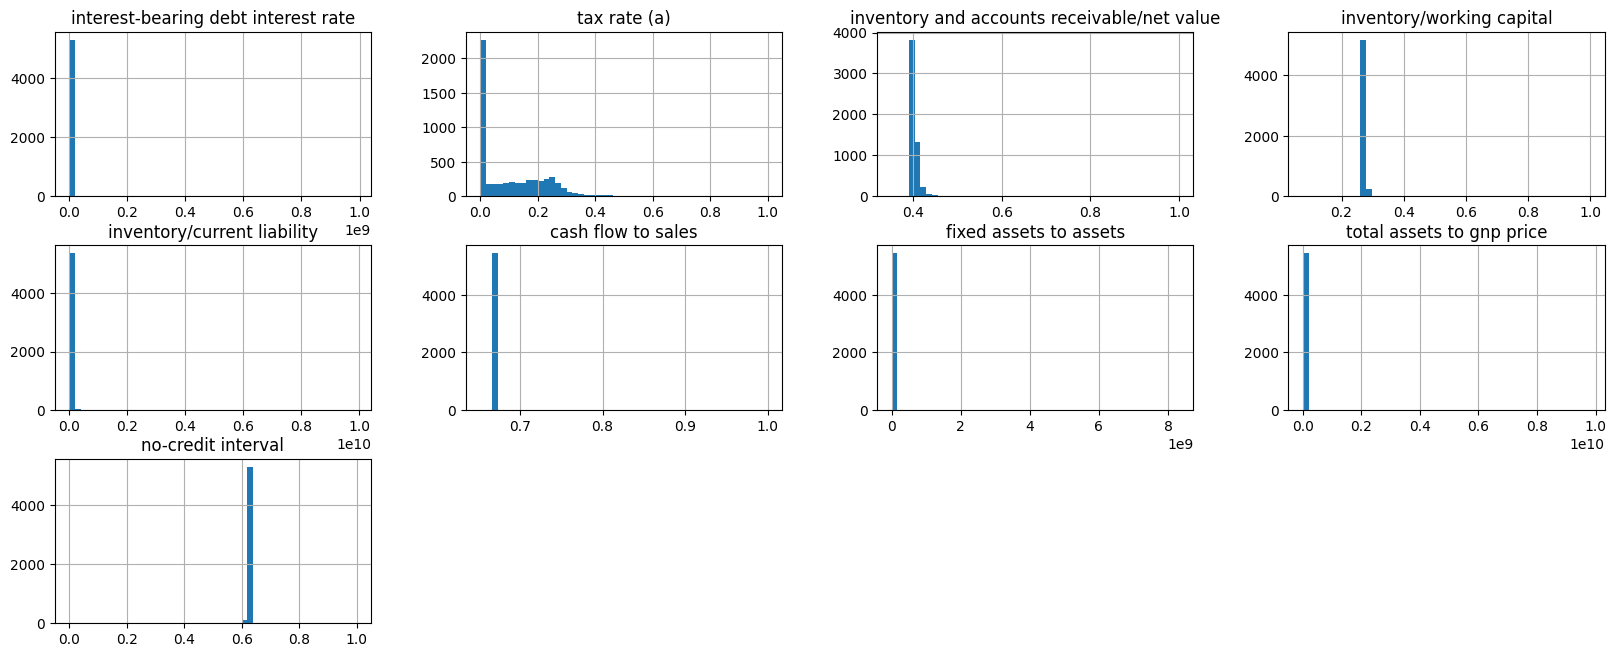

In [39]:
others_data.hist(figsize=(20, 16), bins=50, layout=(6, 4)) # bins = 50 to make it less noisy.

#### Insight

* Kembali ditemukan beberapa data yang memilik outlier yang tidak masuk akal, salah satunya pada fitur interest-bearing debt interest rate. Fitur lainnya yang memiliki mean tidak masuk akal, dapat ditemukan di inventory/current liability, fixed assets to assets, dan total assets to gnp price
* Hal ini tergambar dari boxplot dan distribusi dari histogram yang dilihat ada outlier ekstrem dan distribusi mengalami kemiringan (skewness)

# Deep-Dive EDA: Nilai Invalid, Outlier, dan Variabel yang memiliki potensi Kuat Hubungan dengan Target

### Faktor Profitabilitas

##(Possible) Invalid Values

Berdasarkna hasil sebelumnya nilai yang secara mean dan median memilii rentang sampai jutaan bahkan miliaran memiliki kemungkinan nilai dalam fitur adalah nilai yang tidak valid. Berikut feature yang diindentifikasi berdasarkan hasil EDA sebelumnya
1. Faktor Efisiensi & Aktivitas Perusahaan
    * `operating expense rate`
    * `research and development expense rate`
    * `inventory turnover rate (times)`
    * `quick asset turnover rate`
    * `cash turnover rate`
2. Faktor Pertumbuhan
    * `total asset growth rate`


Sebelum diputuskan untuk melakukan drop features, pengecekan distribusi fitur bermasalah ini akan dilakukan

In [40]:
# creat function
def plot_multiple_boxplots(df, list_of_variables, n_cols=3, hue=None):

    n_plots = len(list_of_variables)

    # count rows to plot
    n_rows = math.ceil(n_plots / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 5))
    axes = axes.flatten()

    for i, var in enumerate(list_of_variables):
        ax = axes[i]
        # Check if the variable is suitable for hue
        if hue and hue in df.columns:
            # If hue is provided, plot boxplot with hue
            sns.boxplot(y=df[var], x=df[hue], ax=ax)
            ax.set_title(f'Boxplot of {var} by {hue}')
            ax.set_xlabel(hue) # Set x-label to hue variable
        else:
            # Otherwise, plot without hue
            sns.boxplot(y=df[var], ax=ax)
            ax.set_title(f'Boxplot of {var}')
            ax.set_xlabel('') # Remove default x-label when no hue is used or hue not found
        ax.set_ylabel(var)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

### Faktor efisiensi  & Aktivitas Perusahaan

In [41]:
effact_data.describe().T

count          mean           std  \
operating expense rate                 5455.0  1.976956e+09  3.225958e+09   
research and development expense rate  5455.0  1.945017e+09  2.597449e+09   
revenue per share (yuan ¥)             5455.0  1.107241e+06  5.007130e+07   
interest expense ratio                 5455.0  6.309311e-01  1.120606e-02   
total asset turnover                   5455.0  1.414028e-01  9.933065e-02   
accounts receivable turnover           5455.0  1.304876e+07  2.947630e+08   
average collection days                5455.0  1.038992e+07  2.644928e+08   
inventory turnover rate (times)        5455.0  2.146663e+09  3.243895e+09   
fixed assets turnover frequency        5455.0  1.019608e+09  2.492271e+09   
net worth turnover rate (times)        5455.0  3.867769e-02  3.749318e-02   
revenue per person                     5455.0  1.615032e+06  1.192830e+08   
allocation rate per person             5455.0  1.076994e+07  2.805483e+08   
total expense/assets                   5455.0  2.937103e-02  2.762335e-02   
current asset turnover rate            5455.0  1.196050e+09  2.822735e+09   
quick asset turnover rate              5455.0  2.183283e+09  3.387366e+09   
working capitcal turnover rate         5455.0  5.940902e-01  5.700449e-03   
cash turnover rate                     5455.0  2.496308e+09  2.951727e+09   

                                            min       25%           50%  \
operating expense rate                 0.000000  0.000157  2.752149e-04   
research and development expense rate  0.000000  0.000129  4.920000e+08   
revenue per share (yuan ¥)             0.000000  0.015594  2.740596e-02   
interest expense ratio                 0.000000  0.630612  6.307009e-01   
total asset turnover                   0.000000  0.077961  1.199400e-01   
accounts receivable turnover           0.000000  0.000712  9.698396e-04   
average collection days                0.000000  0.004385  6.559729e-03   
inventory turnover rate (times)        0.000100  0.000171  7.325740e-04   
fixed assets turnover frequency        0.000000  0.000234  5.862858e-04   
net worth turnover rate (times)        0.000000  0.021774  2.967742e-02   
revenue per person                     0.000000  0.010367  1.846276e-02   
allocation rate per person             0.000000  0.004123  7.789988e-03   
total expense/assets                   0.000000  0.014793  2.290939e-02   
current asset turnover rate            0.000000  0.000145  1.982660e-04   
quick asset turnover rate              0.000000  0.000143  2.268861e-04   
working capitcal turnover rate         0.573381  0.593934  5.939625e-01   
cash turnover rate                     0.000000  0.000276  1.140000e+09   

                                                75%           max  
operating expense rate                 4.125000e+09  9.990000e+09  
research and development expense rate  3.410000e+09  9.980000e+09  
revenue per share (yuan ¥)             4.602447e-02  3.020000e+09  
interest expense ratio                 6.311270e-01  8.977874e-01  
total asset turnover                   1.769115e-01  1.000000e+00  
accounts receivable turnover           1.451716e-03  9.740000e+09  
average collection days                8.940854e-03  9.730000e+09  
inventory turnover rate (times)        4.620000e+09  9.990000e+09  
fixed assets turnover frequency        3.738612e-03  9.990000e+09  
net worth turnover rate (times)        4.306452e-02  1.000000e+00  
revenue per person                     3.559479e-02  8.810000e+09  
allocation rate per person             1.476213e-02  8.900000e+09  
total expense/assets                   3.591790e-02  1.000000e+00  
current asset turnover rate            4.397653e-04  1.000000e+10  
quick asset turnover rate              4.985000e+09  1.000000e+10  
working capitcal turnover rate         5.940021e-01  1.000000e+00  
cash turnover rate                     4.550000e+09  1.000000e+10

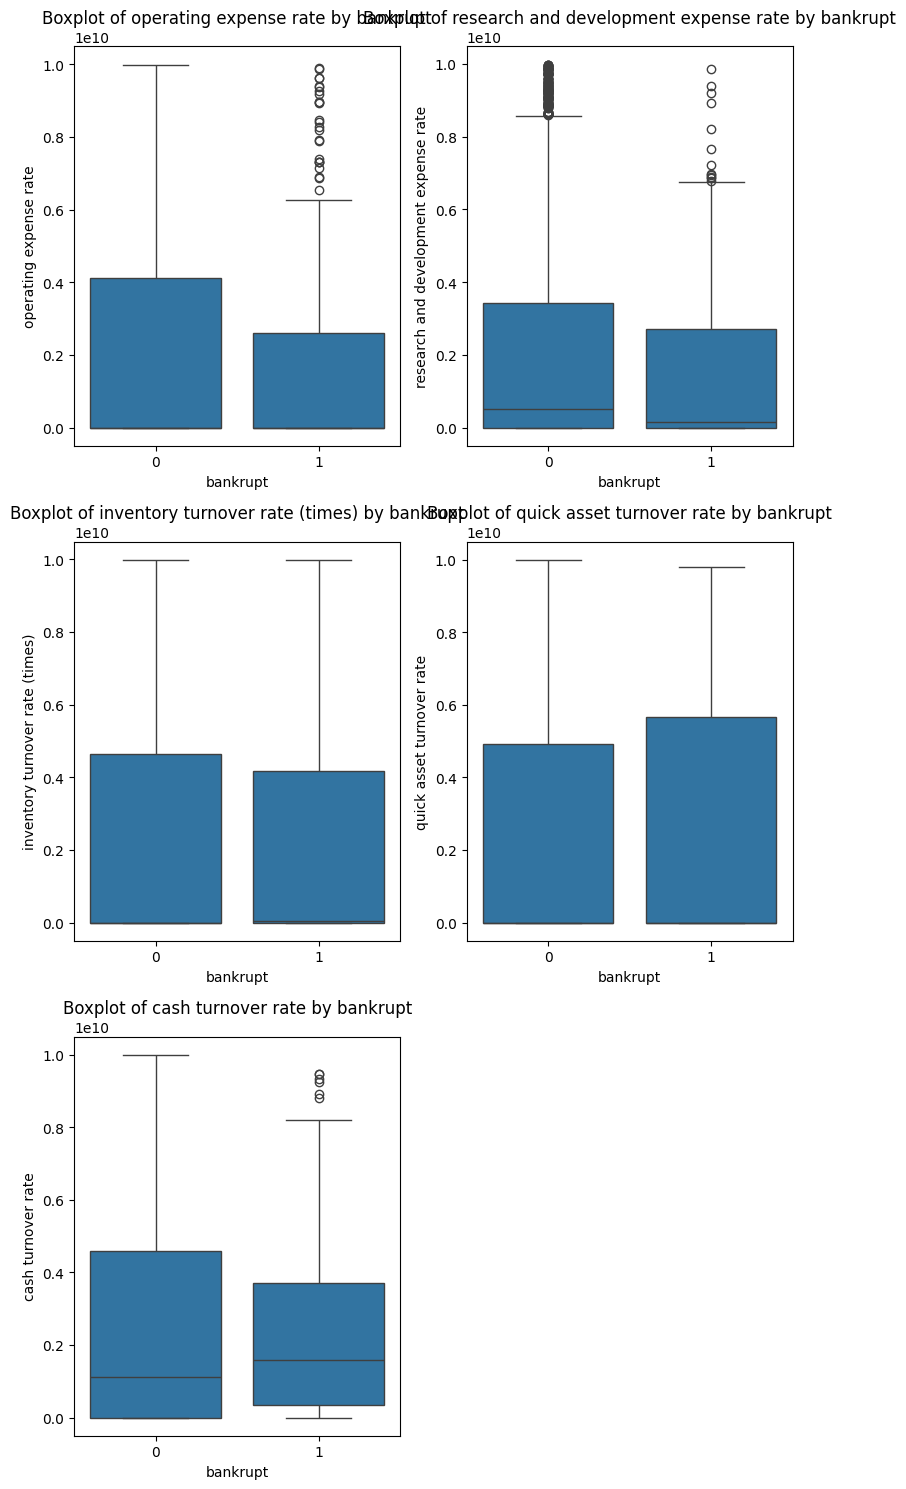

In [42]:
# define cols/variables
cols_to_check_in_effact = [
    'operating expense rate',
    'research and development expense rate',
    'inventory turnover rate (times)',
    'quick asset turnover rate',
    'cash turnover rate'
    ]

# plot boxplot with hue
plot_multiple_boxplots(train_set,
                       cols_to_check_in_effact,
                       n_cols=2,
                       hue='bankrupt')

In [43]:
for col in cols_to_check_in_effact:
    # filter value
    unreasonable_df = train_set[train_set[col] > 1000] # rate atau rasio sangat kecil kemungkinan memiliki nilai di atas 1000

    # count rows
    count = len(unreasonable_df)

    print(f"--- Fitur: {col} ---")
    print(f"Jumlah baris dengan nilai > 1000: {count}")
    print(f'Total baris data keseluuruhan di set train: {len(train_set)}')

    if count > 0:
        # Target Distribution
        print("Distribusi target pada baris tersebut:")
        print(unreasonable_df['bankrupt'].value_counts(normalize=True))
    print("\n" + "="*40 + "\n")

--- Fitur: operating expense rate ---
Jumlah baris dengan nilai > 1000: 1805
Total baris data keseluuruhan di set train: 5455
Distribusi target pada baris tersebut:
bankrupt
0    0.970637
1    0.029363
Name: proportion, dtype: float64


--- Fitur: research and development expense rate ---
Jumlah baris dengan nilai > 1000: 3223
Total baris data keseluuruhan di set train: 5455
Distribusi target pada baris tersebut:
bankrupt
0    0.969594
1    0.030406
Name: proportion, dtype: float64


--- Fitur: inventory turnover rate (times) ---
Jumlah baris dengan nilai > 1000: 2347
Total baris data keseluuruhan di set train: 5455
Distribusi target pada baris tersebut:
bankrupt
0    0.960375
1    0.039625
Name: proportion, dtype: float64


--- Fitur: quick asset turnover rate ---
Jumlah baris dengan nilai > 1000: 1920
Total baris data keseluuruhan di set train: 5455
Distribusi target pada baris tersebut:
bankrupt
0    0.960417
1    0.039583
Name: proportion, dtype: float64


--- Fitur: cash turnover 

Analisis dan keputusan
* Bahwa secara keseluruhan pada fitur-fitur yang berpotensi salah atau skala hitungnya tidak masuk akal tidak memiliki pola antara bankrupt atau tidak.

* Secara angka juga menunjukkan nilai yang tidak valid ini proprosi antara target tidak ada perbedaan

* Sementara itu, jumlahnya ada yang mencepai setenganya. Fitur yang bermasalah ini memiliki potensi kehilangan baris 15%-~50%, bahkan ini hanya di set training.

* Jadi daripada membuang baris yang akan menyebabkan kehilangan baris penting lain di variabel/fitur lain. Banyak invalid data yang ditunjukkan oleh mean dan median dengan nilai yang tidak masuk akal dalam konteks rasio atau rate, **maka dari itu langkah yang diambil ada menghapus fitur-fitur ini dari pemodelan.**

In [44]:
# drop col in cols_to_check_in_effact
train_set = train_set.drop(columns=cols_to_check_in_effact)
test_set = test_set.drop(columns=cols_to_check_in_effact)

### Faktor Pertumbuhan

In [45]:
growth_data.describe().T

count          mean           std  \
realized sales gross profit growth rate  5455.0  2.224576e-02  2.319257e-03   
operating profit growth rate             5455.0  8.478793e-01  1.175224e-02   
after-tax net profit growth rate         5455.0  6.890613e-01  1.484843e-02   
regular net profit growth rate           5455.0  6.890720e-01  1.488550e-02   
continuous net profit growth rate        5455.0  2.176539e-01  1.121698e-02   
total asset growth rate                  5455.0  5.509706e+09  2.888785e+09   
net value growth rate                    5455.0  2.474794e+05  1.827832e+07   
total asset return growth rate ratio     5455.0  2.640957e-01  3.750915e-03   

                                         min           25%           50%  \
realized sales gross profit growth rate  0.0  2.206475e-02  2.210215e-02   
operating profit growth rate             0.0  8.479833e-01  8.480433e-01   
after-tax net profit growth rate         0.0  6.892706e-01  6.894371e-01   
regular net profit growth rate           0.0  6.892703e-01  6.894371e-01   
continuous net profit growth rate        0.0  2.175796e-01  2.175979e-01   
total asset growth rate                  0.0  4.890000e+09  6.400000e+09   
net value growth rate                    0.0  4.405447e-04  4.612318e-04   
total asset return growth rate ratio     0.0  2.637535e-01  2.640457e-01   

                                                  75%           max  
realized sales gross profit growth rate  2.215312e-02  1.016434e-01  
operating profit growth rate             8.481223e-01  8.877039e-01  
after-tax net profit growth rate         6.896450e-01  1.000000e+00  
regular net profit growth rate           6.896450e-01  1.000000e+00  
continuous net profit growth rate        2.176213e-01  1.000000e+00  
total asset growth rate                  7.380000e+09  9.980000e+09  
net value growth rate                    4.988880e-04  1.350000e+09  
total asset return growth rate ratio     2.643860e-01  2.854294e-01

<Axes: xlabel='bankrupt', ylabel='total asset growth rate'>

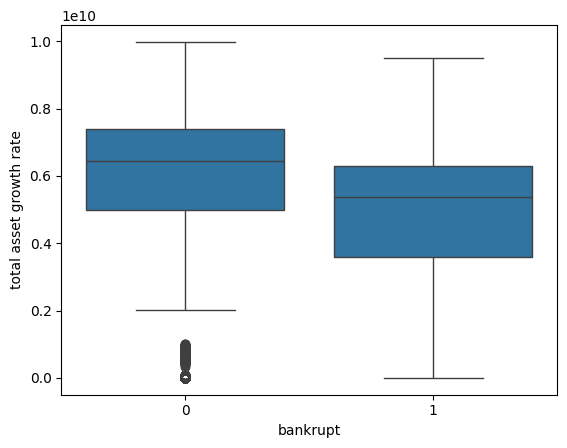

In [46]:
# check col 'total asset growth rate'
sns.boxplot(y=train_set['total asset growth rate'], x=train_set['bankrupt'])

In [47]:
# checck total rows in cutoff > 1000
unreasonable_df = train_set[train_set['total asset growth rate'] > 1000] # rate atau rasio sangat kecil kemungkinan memiliki nilai di atas 1000

# count rows
count = len(unreasonable_df)

print(f"--- Fitur: total asset growth rate ---")
print(f"Jumlah baris dengan nilai > 1000: {count}")
print(f'Total baris data keseluuruhan di set train: {len(train_set)}')

if count > 0:
  # Target Distribution
  print("Distribusi target pada baris tersebut:")
  print(unreasonable_df['bankrupt'].value_counts(normalize=True))

--- Fitur: total asset growth rate ---
Jumlah baris dengan nilai > 1000: 4816
Total baris data keseluuruhan di set train: 5455
Distribusi target pada baris tersebut:
bankrupt
0    0.964909
1    0.035091
Name: proportion, dtype: float64


In [48]:
# drop col `total asset growth rate`
train_set = train_set.drop(columns='total asset growth rate')
test_set = test_set.drop(columns='total asset growth rate')

## Check & Handle Outliers

In [49]:
# get numerical columns
numeric_cols = train_set.select_dtypes(include='number').columns.to_list()

# intiiliaze dataframe for store the outlier value
outlier_status_df = pd.DataFrame(False, index=train_set.index, columns=numeric_cols)

# Loop through each numeric column
for col in numeric_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the current column
    Q1 = train_set[col].quantile(0.25)
    Q3 = train_set[col].quantile(0.75)

    # Calculate Interquartile Range (IQR) for the current column
    IQR = Q3 - Q1

    # Define lower bound and upper bound for outlier detection using the 1.5 * IQR rule
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers for the current column (for printing individual column stats)
    column_outliers_count = train_set[(train_set[col] < lower_bound) | (train_set[col] > upper_bound)][col].count()

    # Calculate the percentage of outliers relative to the total number of data points in the column
    column_percentage_outliers = (column_outliers_count / len(train_set[col])) * 100

    # Mark True for rows that are outliers in this column
    outlier_status_df[col] = (train_set[col] < lower_bound) | (train_set[col] > upper_bound)

# Calculate the total number of unique rows containing at least one outlier
total_outlier_rows_mask = outlier_status_df.any(axis=1) # Checks if any column in a row has an outlier (True)
total_outlier_rows_count = total_outlier_rows_mask.sum()

# Calculate the percentage of unique rows containing at least one outlier
percentage_total_outlier_rows = (total_outlier_rows_count / len(train_set)) * 100

# Print the final results for the entire DataFrame
print("--- Overall Outlier Summary ---")
print(f"Total rows in DataFrame: {len(train_set)}")
print(f"Number of unique rows containing at least one outlier across all numeric features: {total_outlier_rows_count}")
print(f"Percentage of unique rows containing at least one outlier: {percentage_total_outlier_rows:.2f}%")

--- Overall Outlier Summary ---
Total rows in DataFrame: 5455
Number of unique rows containing at least one outlier across all numeric features: 5032
Percentage of unique rows containing at least one outlier: 92.25%


Berdasarkan hasil ini saya menyimpulkan bahwa:

* Persentase dengan nilai 92% adalah nilai yang sangat besar untuk baris yang mengandung outlier di semua fitur numerik.

* Tidak mungkin menghapus seluruh outlier. Demikian juga dengan mengubah ke transformasi logaritma, sulit dilakukan menginngat masih ada beberap fitur yang memiliki mean dengan satuan ribuan, ratusan, bahkan jutaan

* Maka dari itu, penghapusan outlier fokus pada meannya yang tidak masuk akal, seperti quick ratio yang memiliki nilai mean 8.196150e+06, sementara 50% datanya hanya 0.007363.

* Namun sebelum itu, pengecekan juga akan dilakukan per fitur berapa persentase outlier yang terdekati

In [50]:
# concat order features by factor
all_feature_cols = (faktor_profitabilitas +
                    faktor_likuiditas +
                    faktor_solvabilitas_leverage +
                    faktor_efisiensi_aktivitas +
                    faktor_pertumbuhan +
                    faktor_nilai_pasar_valuasi +
                    faktor_lain_lain)

# create new order
new_order = ['bankrupt'] + all_feature_cols
final_order_train = [col for col in new_order if col in train_set.columns]
final_order_test = [col for col in new_order if col in test_set.columns]

# set the order
train_set = train_set[final_order_train]
test_set = test_set[final_order_test]

# recheck
print("Urutan kolom baru di train_set:")
print(train_set.columns.to_list()[:10])

print("\nUrutan kolom baru di test_set:")
print(test_set.columns.to_list()[:10])

Urutan kolom baru di train_set:
['bankrupt', 'roa(c) before interest and depreciation before interest', 'roa(a) before interest and % after tax', 'roa(b) before interest and depreciation after tax', 'operating gross margin', 'realized sales gross margin', 'operating profit rate', 'pre-tax net interest rate', 'after-tax net interest rate', 'non-industry income and expenditure/revenue']

Urutan kolom baru di test_set:
['bankrupt', 'roa(c) before interest and depreciation before interest', 'roa(a) before interest and % after tax', 'roa(b) before interest and depreciation after tax', 'operating gross margin', 'realized sales gross margin', 'operating profit rate', 'pre-tax net interest rate', 'after-tax net interest rate', 'non-industry income and expenditure/revenue']


In [51]:
# get numerical columns
numeric_cols = train_set.select_dtypes(include='number').columns.to_list()

# Remove the 'bankrupt' column from the list if it exists
if 'bankrupt' in numeric_cols:
    numeric_cols.remove('bankrupt')

# intiiliaze dataframe for store the outlier value
outlier_status_df = pd.DataFrame(False, index=train_set.index, columns=numeric_cols)

# Loop through each numeric column
for col in numeric_cols:
    print(f"------------ {col} ------------")

    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the current column
    Q1 = train_set[col].quantile(0.25)
    Q3 = train_set[col].quantile(0.75)

    # Calculate Interquartile Range (IQR) for the current column
    IQR = Q3 - Q1

    # Define lower bound and upper bound for outlier detection using the 1.5 * IQR rule
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers for the current column (for printing individual column stats)
    column_outliers_count = train_set[(train_set[col] < lower_bound) | (train_set[col] > upper_bound)][col].count()

    # Calculate the percentage of outliers relative to the total number of data points in the column
    column_percentage_outliers = (column_outliers_count / len(train_set[col])) * 100

    # Mark True for rows that are outliers in this column
    outlier_status_df[col] = (train_set[col] < lower_bound) | (train_set[col] > upper_bound)

    # Print the results for the current column
    print(f"The lower bound (Outlier): {lower_bound:.2f}")
    print(f"The upper bound (Outlier): {upper_bound:.2f}")
    print(f"Total Outlier in {col}: {column_outliers_count}") # Mengubah nama variabel untuk kejelasan
    print(f"Total data in {col}: {len(train_set[col])}")
    print(f"Percentage Outlier in {col}: {column_percentage_outliers:.2f}%")
    print("\n")

------------ roa(c) before interest and depreciation before interest ------------
The lower bound (Outlier): 0.39
The upper bound (Outlier): 0.62
Total Outlier in roa(c) before interest and depreciation before interest: 308
Total data in roa(c) before interest and depreciation before interest: 5455
Percentage Outlier in roa(c) before interest and depreciation before interest: 5.65%


------------ roa(a) before interest and % after tax ------------
The lower bound (Outlier): 0.46
The upper bound (Outlier): 0.67
Total Outlier in roa(a) before interest and % after tax: 458
Total data in roa(a) before interest and % after tax: 5455
Percentage Outlier in roa(a) before interest and % after tax: 8.40%


------------ roa(b) before interest and depreciation after tax ------------
The lower bound (Outlier): 0.44
The upper bound (Outlier): 0.67
Total Outlier in roa(b) before interest and depreciation after tax: 358
Total data in roa(b) before interest and depreciation after tax: 5455
Percentage O

In [52]:
train_set.describe().T

count          mean  \
bankrupt                                            5455.0  3.226398e-02   
roa(c) before interest and depreciation before ...  5455.0  5.044466e-01   
roa(a) before interest and % after tax              5455.0  5.578182e-01   
roa(b) before interest and depreciation after tax   5455.0  5.529461e-01   
operating gross margin                              5455.0  6.077647e-01   
realized sales gross margin                         5455.0  6.077417e-01   
operating profit rate                               5455.0  9.987807e-01   
pre-tax net interest rate                           5455.0  7.972549e-01   
after-tax net interest rate                         5455.0  8.091782e-01   
non-industry income and expenditure/revenue         5455.0  3.036832e-01   
continuous interest rate (after tax)                5455.0  7.814508e-01   
persistent eps in the last four seasons             5455.0  2.283208e-01   
operating profit per share (yuan ¥)                 5455.0  1.087788e-01   
per share net profit before tax (yuan ¥)            5455.0  1.836912e-01   
operating profit/paid-in capital                    5455.0  1.086721e-01   
net profit before tax/paid-in capital               5455.0  1.822362e-01   
operating profit per person                         5455.0  4.001813e-01   
retained earnings to total assets                   5455.0  9.345257e-01   
total income/total expense                          5455.0  2.578403e-03   
net income to total assets                          5455.0  8.074199e-01   
gross profit to sales                               5455.0  6.077630e-01   
net income to stockholder's equity                  5455.0  8.404423e-01   
net income flag                                     5455.0  1.000000e+00   
cash flow rate                                      5455.0  4.672292e-01   
cash flow per share                                 5455.0  3.234735e-01   
current ratio                                       5455.0  1.505731e-02   
quick ratio                                         5455.0  8.196150e+06   
working capital to total assets                     5455.0  8.142162e-01   
quick assets/total assets                           5455.0  4.010283e-01   
current assets/total assets                         5455.0  5.229211e-01   
cash/total assets                                   5455.0  1.243128e-01   
quick assets/current liability                      5455.0  4.491292e+06   
cash/current liability                              5455.0  3.704491e+07   
cash flow to total assets                           5455.0  6.497424e-01   
cash flow to liability                              5455.0  4.618768e-01   
cfo to assets                                       5455.0  5.932255e-01   
cash flow to equity                                 5455.0  3.155630e-01   
current liability to current assets                 5455.0  3.142659e-02   
total debt/total net worth                          5455.0  2.294225e+06   
debt ratio %                                        5455.0  1.132499e-01   
net worth/assets                                    5455.0  8.867501e-01   
long-term fund suitability ratio (a)                5455.0  8.662497e-03   
borrowing dependency                                5455.0  3.746667e-01   
contingent liabilities/net worth                    5455.0  6.002604e-03   
current liability to assets                         5455.0  9.076958e-02   
current liabilities/liability                       5455.0  7.617091e-01   
current liabilities/equity                          5455.0  3.314817e-01   
long-term liability to current assets               5455.0  5.475223e+07   
current liability to liability                      5455.0  7.617091e-01   
current liability to equity                         5455.0  3.314817e-01   
equity to long-term liability                       5455.0  1.155754e-01   
liability-assets flag                               5455.0  9.165903e-04   
liability to equity      

Berikut ini fitur yang memiliki outlier tinggi. Selain itu, ada gap antara mean dan median, namun masih masuk akal tidak sampai jutaan bahkan miliaran.

* degree of financial leverage (dfl): 21.87%
* interest coverage ratio (interest expense to ebit): 20.86%
* interest expense ratio: 20.11%
* cash flow to liability: 18.09%
* no-credit interval: 16.74%
* non-industry income and expenditure/revenue: 16.52%

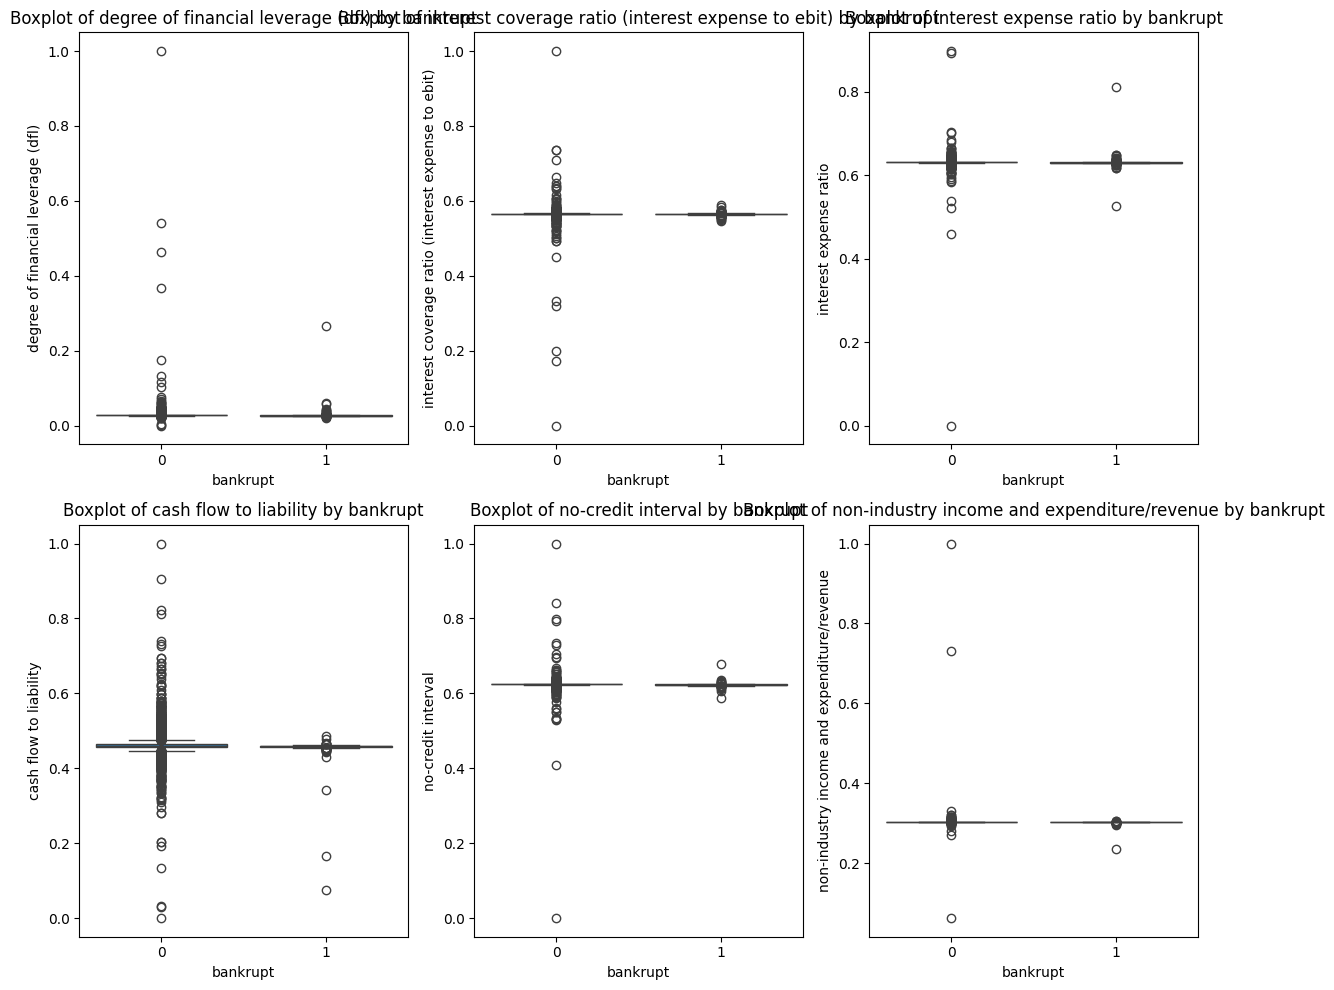

In [53]:
features_to_check = [
    'degree of financial leverage (dfl)',
    'interest coverage ratio (interest expense to ebit)',
    'interest expense ratio',
    'cash flow to liability',
    'no-credit interval',
    'non-industry income and expenditure/revenue'
]

# plot boxplot
plot_multiple_boxplots(train_set,
                       features_to_check,
                       n_cols = 3,
                       hue = 'bankrupt')

Hasil ini menunjukkan tidak ada pola baik untuk perusahaan yang bankrupt (=1) ataupun yang tidak bankrupt (=0). Melakukan preprocessing dengan capping akan tidak berarti karena pola tidak terlalu terlihat. Ada variabel yang lebih penting terhadap bankrupt atau tidaknya sebuah perusahaan. Demikian dengan menghapusnya, dikhawatirkan ada baris yang berpengaruh terhadap model yang hilang karena kita menghapus outlier pada 6 fitur di atas.

Maka dari itu, membiarkan saja dan menggunaka nmodel yang lebih tahan terhadap outlier perlu dilakukan, seperti random forest, XGBoost dan sebagainya.

Sementara itu, untuk fitur `fixed assets turnover frequency` dan `current asset turnover` dihapus saja dengan beberapa alasan
* jumlah outlier tinggi
  * fixed assets turnover frequency: 20.86%
  * current asset turnover rate: 20.46%
* Kemungkinan tidak seberpengaruh itu terhadap permodelan nanti. Ada variabel yang menggantikan atau lebih bermakna, misalnya `total asset turnover`

In [54]:
# drop col fixed assets turnover frequency and current asset turnover rate
train_set = train_set.drop(columns=['fixed assets turnover frequency', 'current asset turnover rate'])
test_set = test_set.drop(columns=['fixed assets turnover frequency', 'current asset turnover rate'])

In [55]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 87 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt                                                 5455 non-null   int64  
 1   roa(c) before interest and depreciation before interest  5455 non-null   float64
 2   roa(a) before interest and % after tax                   5455 non-null   float64
 3   roa(b) before interest and depreciation after tax        5455 non-null   float64
 4   operating gross margin                                   5455 non-null   float64
 5   realized sales gross margin                              5455 non-null   float64
 6   operating profit rate                                    5455 non-null   float64
 7   pre-tax net interest rate                                5455 non-null   float64
 8   after-tax net interest rate     

In [56]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 1244 to 652
Data columns (total 87 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt                                                 1364 non-null   int64  
 1   roa(c) before interest and depreciation before interest  1364 non-null   float64
 2   roa(a) before interest and % after tax                   1364 non-null   float64
 3   roa(b) before interest and depreciation after tax        1364 non-null   float64
 4   operating gross margin                                   1364 non-null   float64
 5   realized sales gross margin                              1364 non-null   float64
 6   operating profit rate                                    1364 non-null   float64
 7   pre-tax net interest rate                                1364 non-null   float64
 8   after-tax net interest rate    

Sejauh ini ada 8 fitur yang dihapus, di antaranya:
* operating expense rate
* research and development expense rate
* inventory turnover rate (times)
* quick asset turnover rate
* cash turnover rate
* total asset growth rate
* fixed assets turnover frequency
* current asset turnover rate

Adapun alasan penghapusnya fitur tersebut karena
1. Kualitas Data Sangat Buruk: Nilai mean dan/atau median yang secara fundamental tidak masuk akal untuk sebuah rasio/rate.
2. Kekuatan Prediktif Rendah: Tidak menunjukkan pola yang jelas untuk membedakan perusahaan yang bangkrut dan yang tidak.
3. Ada variabel lain yang lebih penting atau sudah diwakilkan

In [57]:
train_set.describe().T

count          mean  \
bankrupt                                            5455.0  3.226398e-02   
roa(c) before interest and depreciation before ...  5455.0  5.044466e-01   
roa(a) before interest and % after tax              5455.0  5.578182e-01   
roa(b) before interest and depreciation after tax   5455.0  5.529461e-01   
operating gross margin                              5455.0  6.077647e-01   
realized sales gross margin                         5455.0  6.077417e-01   
operating profit rate                               5455.0  9.987807e-01   
pre-tax net interest rate                           5455.0  7.972549e-01   
after-tax net interest rate                         5455.0  8.091782e-01   
non-industry income and expenditure/revenue         5455.0  3.036832e-01   
continuous interest rate (after tax)                5455.0  7.814508e-01   
persistent eps in the last four seasons             5455.0  2.283208e-01   
operating profit per share (yuan ¥)                 5455.0  1.087788e-01   
per share net profit before tax (yuan ¥)            5455.0  1.836912e-01   
operating profit/paid-in capital                    5455.0  1.086721e-01   
net profit before tax/paid-in capital               5455.0  1.822362e-01   
operating profit per person                         5455.0  4.001813e-01   
retained earnings to total assets                   5455.0  9.345257e-01   
total income/total expense                          5455.0  2.578403e-03   
net income to total assets                          5455.0  8.074199e-01   
gross profit to sales                               5455.0  6.077630e-01   
net income to stockholder's equity                  5455.0  8.404423e-01   
net income flag                                     5455.0  1.000000e+00   
cash flow rate                                      5455.0  4.672292e-01   
cash flow per share                                 5455.0  3.234735e-01   
current ratio                                       5455.0  1.505731e-02   
quick ratio                                         5455.0  8.196150e+06   
working capital to total assets                     5455.0  8.142162e-01   
quick assets/total assets                           5455.0  4.010283e-01   
current assets/total assets                         5455.0  5.229211e-01   
cash/total assets                                   5455.0  1.243128e-01   
quick assets/current liability                      5455.0  4.491292e+06   
cash/current liability                              5455.0  3.704491e+07   
cash flow to total assets                           5455.0  6.497424e-01   
cash flow to liability                              5455.0  4.618768e-01   
cfo to assets                                       5455.0  5.932255e-01   
cash flow to equity                                 5455.0  3.155630e-01   
current liability to current assets                 5455.0  3.142659e-02   
total debt/total net worth                          5455.0  2.294225e+06   
debt ratio %                                        5455.0  1.132499e-01   
net worth/assets                                    5455.0  8.867501e-01   
long-term fund suitability ratio (a)                5455.0  8.662497e-03   
borrowing dependency                                5455.0  3.746667e-01   
contingent liabilities/net worth                    5455.0  6.002604e-03   
current liability to assets                         5455.0  9.076958e-02   
current liabilities/liability                       5455.0  7.617091e-01   
current liabilities/equity                          5455.0  3.314817e-01   
long-term liability to current assets               5455.0  5.475223e+07   
current liability to liability                      5455.0  7.617091e-01   
current liability to equity                         5455.0  3.314817e-01   
equity to long-term liability                       5455.0  1.155754e-01   
liability-assets flag                               5455.0  9.165903e-04   
liability to equity      

Lanjut, fitur yang masih perlu dicek karena memiliki mean dan median yang tidak wajar sebagai berikut

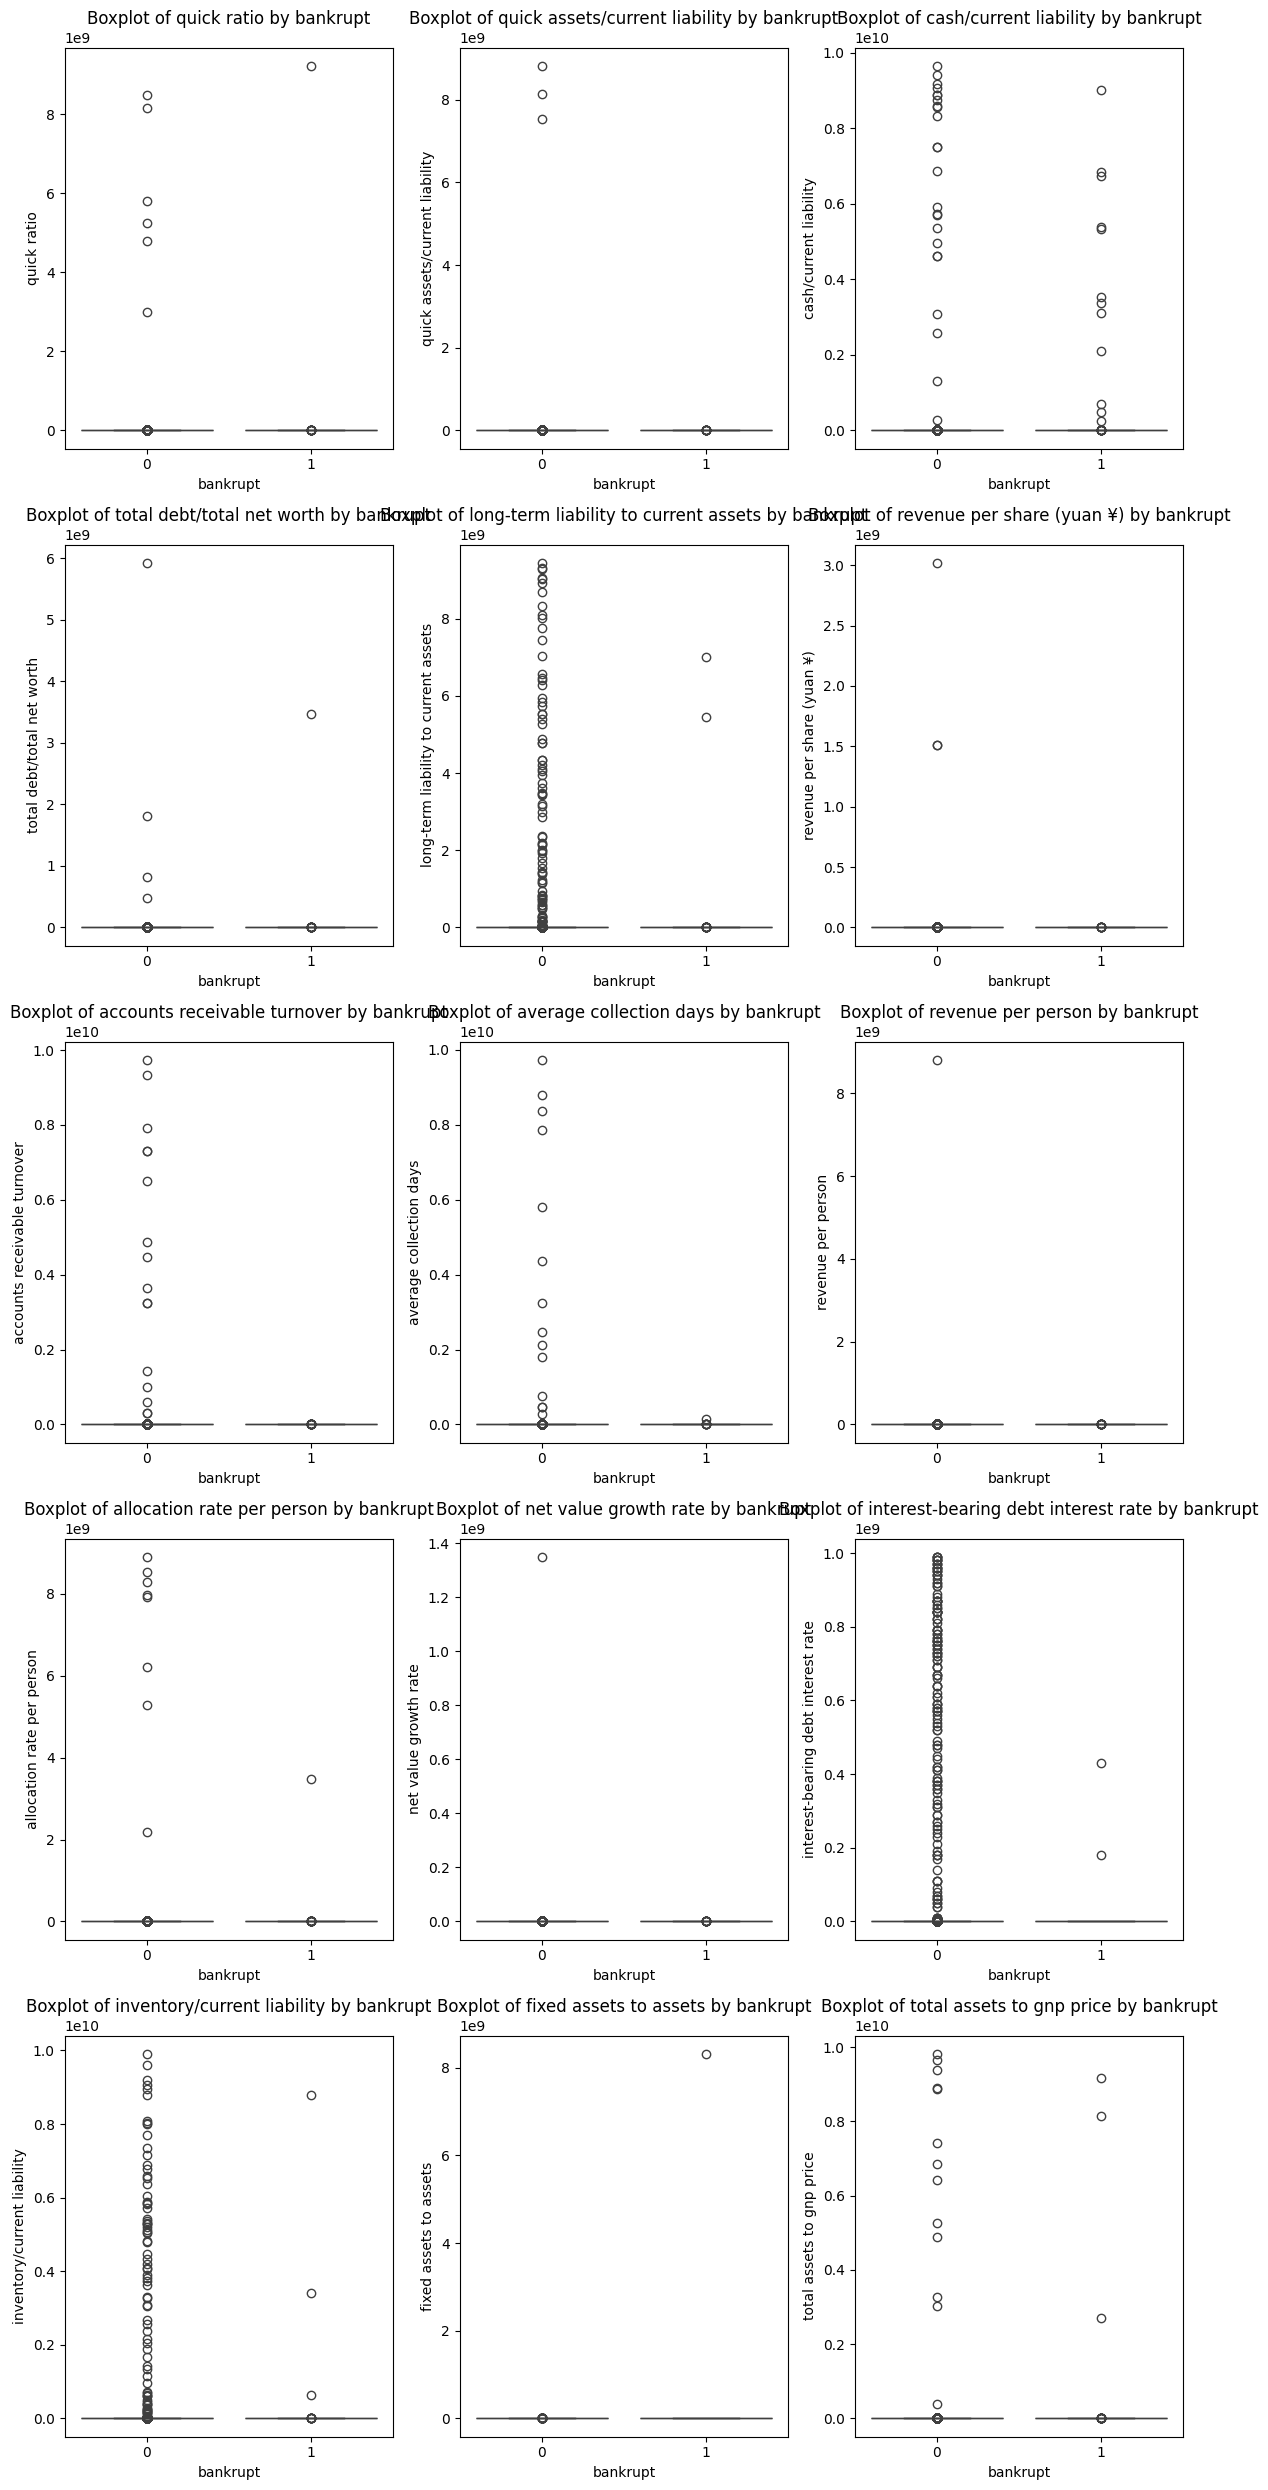

In [58]:
cols_to_check = [
    'quick ratio',
    'quick assets/current liability',
    'cash/current liability',
    'total debt/total net worth',
    'long-term liability to current assets',
    'revenue per share (yuan ¥)',
    'accounts receivable turnover',
    'average collection days',
    'revenue per person',
    'allocation rate per person',
    'net value growth rate',
    'interest-bearing debt interest rate',
    'inventory/current liability',
    'fixed assets to assets',
    'total assets to gnp price'
]

# plot box
plot_multiple_boxplots(train_set,
                       cols_to_check,
                       n_cols=3,
                       hue='bankrupt')

In [59]:
def plot_zoomed_boxplots(df, list_of_variables, n_cols=3, hue=None):
    n_plots = len(list_of_variables)
    n_rows = math.ceil(n_plots / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
    axes = axes.flatten()

    for i, var in enumerate(list_of_variables):
        ax = axes[i]

        sns.boxplot(data=df, x=hue, y=var, ax=ax)
        ax.set_title(f'Boxplot of {var} (Zoomed In)')
        # Calculating the y-axis limits based on the 1st and 99th percentiles
        col_data = df[var].replace([np.inf, -np.inf], np.nan).dropna()
        if not col_data.empty:
            lower_limit = col_data.quantile(0.01)
            upper_limit = col_data.quantile(0.99)

            if lower_limit < upper_limit:
                ax.set_ylim(lower_limit, upper_limit)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

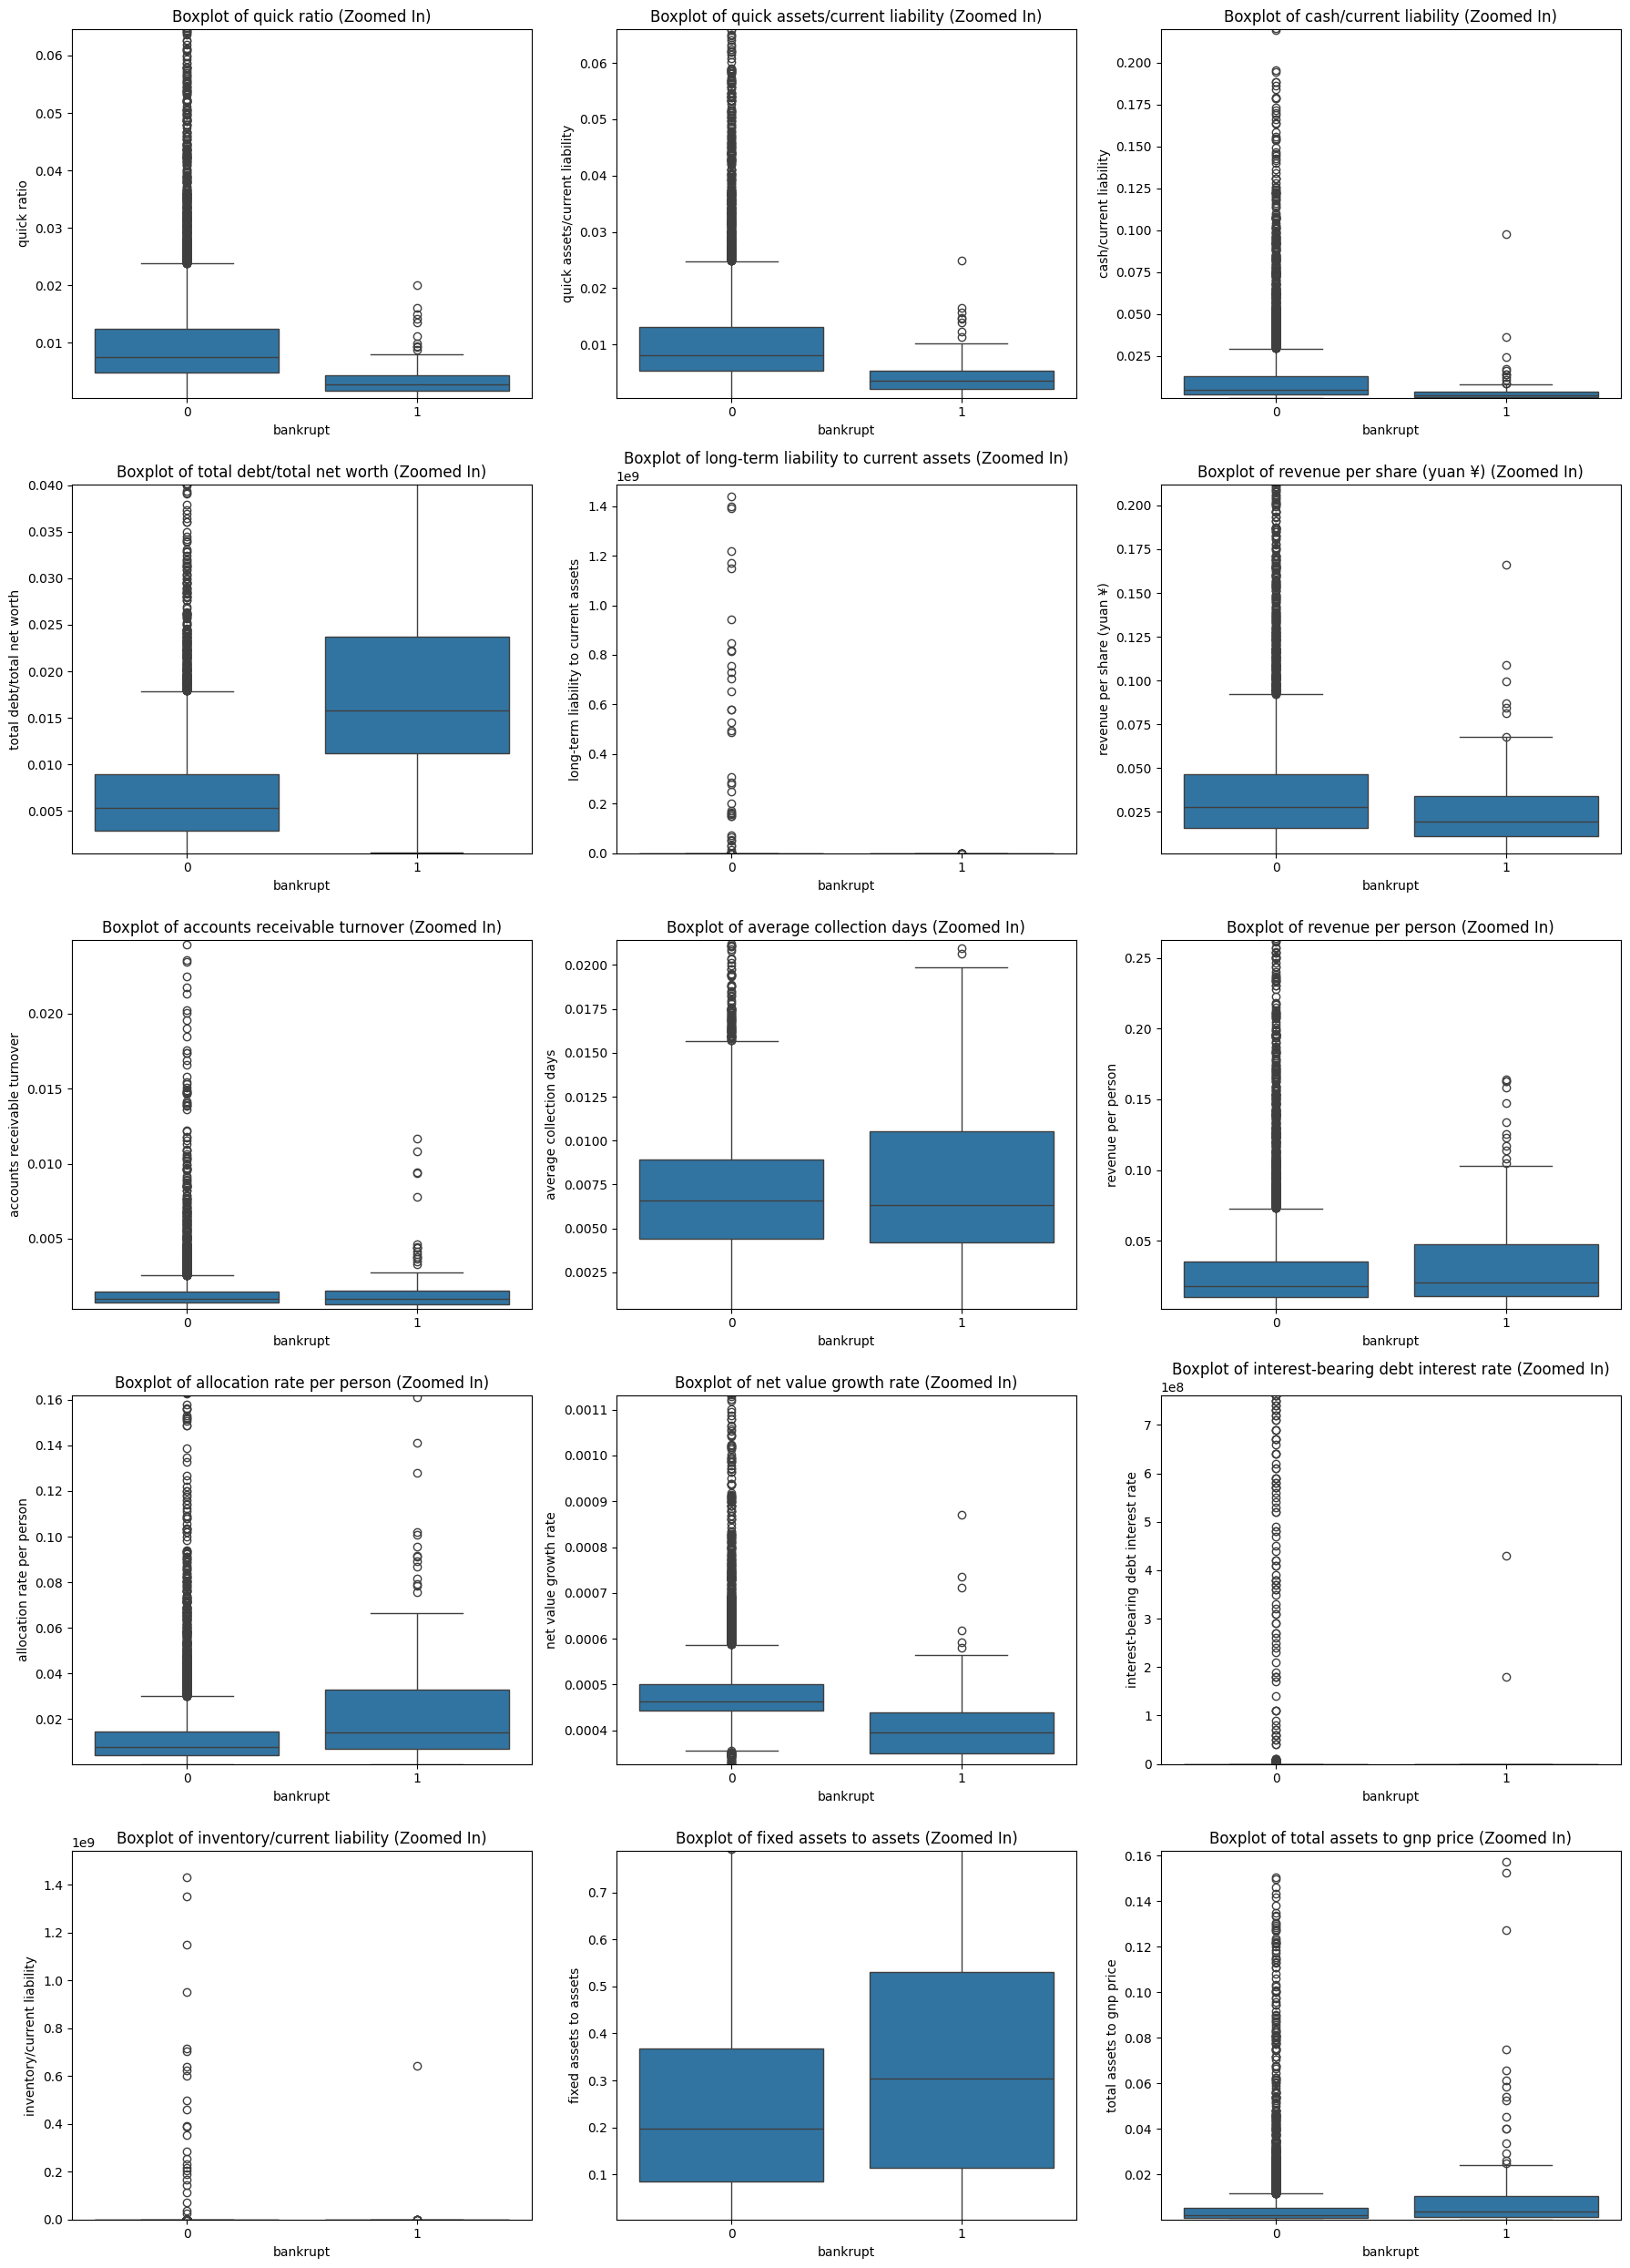

In [60]:
plot_zoomed_boxplots(train_set,
                     cols_to_check,
                     n_cols=3,
                     hue='bankrupt')

Dengan boxplot zoom ini terlihat beberapa fitur memang sudah "buruk" antara lain
* accounts receivable turnover
* cash/current liability
* long-term liability to current assets
* average collecation days
* revenue per person
* allocation rate per person
* interest-bearing debt interest rate
* inventory/current liability
* total assets to gnp price

Ini didsarkan pada hasil boxplot yang menghilangkan nilai ekstrem (zoom in), tetap tidak terlihat polanya, bahkan boxplot tetap tidak kelihatan.

Sementara itu untuk fitur lainnya coba diperhatankan dan melihat kembali statistik deskriptif dan total baris yang hilangnya

In [61]:
# cols to drop
cols_to_drop = [
    'accounts receivable turnover',
    'cash/current liability',
    'long-term liability to current assets',
    'average collection days',
    'revenue per person',
    'allocation rate per person',
    'interest-bearing debt interest rate',
    'inventory/current liability',
    'total assets to gnp price'
]

# drop cols
train_set = train_set.drop(columns=cols_to_drop)
test_set = test_set.drop(columns=cols_to_drop)

In [62]:
# check features
final_cols_to_check = [col for col in cols_to_check if col not in cols_to_drop]

print(train_set[final_cols_to_check].describe().T)

                                 count          mean           std      min  \
quick ratio                     5455.0  8.196150e+06  2.409200e+08  0.00000   
quick assets/current liability  5455.0  4.491292e+06  1.918745e+08  0.00012   
total debt/total net worth      5455.0  2.294225e+06  9.706757e+07  0.00000   
revenue per share (yuan ¥)      5455.0  1.107241e+06  5.007130e+07  0.00000   
net value growth rate           5455.0  2.474794e+05  1.827832e+07  0.00000   
fixed assets to assets          5455.0  1.525206e+06  1.126486e+08  0.00000   

                                     25%       50%       75%           max  
quick ratio                     0.004675  0.007363  0.012271  9.230000e+09  
quick assets/current liability  0.005208  0.007879  0.013007  8.820000e+09  
total debt/total net worth      0.003008  0.005542  0.009283  5.930000e+09  
revenue per share (yuan ¥)      0.015594  0.027406  0.046024  3.020000e+09  
net value growth rate           0.000441  0.000461  0.000499 

In [63]:
# intiiliaze dataframe for store the outlier value
outlier_status_df = pd.DataFrame(False, index=train_set.index, columns=final_cols_to_check)

# Loop through each numeric column
for col in final_cols_to_check:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the current column
    Q1 = train_set[col].quantile(0.25)
    Q3 = train_set[col].quantile(0.75)

    # Calculate Interquartile Range (IQR) for the current column
    IQR = Q3 - Q1

    # Define lower bound and upper bound for outlier detection using the 1.5 * IQR rule
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers for the current column (for printing individual column stats)
    column_outliers_count = train_set[(train_set[col] < lower_bound) | (train_set[col] > upper_bound)][col].count()

    # Calculate the percentage of outliers relative to the total number of data points in the column
    column_percentage_outliers = (column_outliers_count / len(train_set[col])) * 100

    # Mark True for rows that are outliers in this column
    outlier_status_df[col] = (train_set[col] < lower_bound) | (train_set[col] > upper_bound)

# Calculate the total number of unique rows containing at least one outlier
total_outlier_rows_mask = outlier_status_df.any(axis=1) # Checks if any column in a row has an outlier (True)
total_outlier_rows_count = total_outlier_rows_mask.sum()

# Calculate the percentage of unique rows containing at least one outlier
percentage_total_outlier_rows = (total_outlier_rows_count / len(train_set)) * 100

# Print the final results for the entire DataFrame
print("--- Outlier Summary for 'final_cols_to_check' ---")
print(f"Total rows in DataFrame: {len(train_set)}")
print(f"Number of unique rows containing at least one outlier across all numeric features: {total_outlier_rows_count}")
print(f"Percentage of unique rows containing at least one outlier: {percentage_total_outlier_rows:.2f}%")

--- Outlier Summary for 'final_cols_to_check' ---
Total rows in DataFrame: 5455
Number of unique rows containing at least one outlier across all numeric features: 1543
Percentage of unique rows containing at least one outlier: 28.29%


Outlier masih 20% dan tidak mungkin menghilangkan semua kolom yang memiliki mean tidak wajar atau tidak masuk akal secara bisnis karena takutnya ada baris di fitur lain yang hilang. Untuk itu, perlu mengecek nilai dengan cap tertentu yang sesuai/masuk akal secara bisnis.

nilai diambil dari persentil ke-99

In [64]:
for col in final_cols_to_check:
  cap_value = train_set[col].quantile(0.99)
  # calculate row and percentage
  rows_above_cap = (train_set[col] > cap_value).sum()
  percentage_above_cap = (rows_above_cap / len(train_set)) * 100

  print(f"--- Fitur: {col} ---")
  print(f"Nilai Cap (persentil ke-99): {cap_value:.4f}")
  print(f"Jumlah baris di atas nilai cap: {rows_above_cap}")
  print(f"Persentase baris yang akan di-cap: {percentage_above_cap:.2f}%\n")

--- Fitur: quick ratio ---
Nilai Cap (persentil ke-99): 0.0645
Jumlah baris di atas nilai cap: 55
Persentase baris yang akan di-cap: 1.01%

--- Fitur: quick assets/current liability ---
Nilai Cap (persentil ke-99): 0.0659
Jumlah baris di atas nilai cap: 55
Persentase baris yang akan di-cap: 1.01%

--- Fitur: total debt/total net worth ---
Nilai Cap (persentil ke-99): 0.0400
Jumlah baris di atas nilai cap: 55
Persentase baris yang akan di-cap: 1.01%

--- Fitur: revenue per share (yuan ¥) ---
Nilai Cap (persentil ke-99): 0.2117
Jumlah baris di atas nilai cap: 55
Persentase baris yang akan di-cap: 1.01%

--- Fitur: net value growth rate ---
Nilai Cap (persentil ke-99): 0.0011
Jumlah baris di atas nilai cap: 55
Persentase baris yang akan di-cap: 1.01%

--- Fitur: fixed assets to assets ---
Nilai Cap (persentil ke-99): 0.7875
Jumlah baris di atas nilai cap: 55
Persentase baris yang akan di-cap: 1.01%



capping (membatasi) nilai dengan nilai persentil ke-99 hanya berdampak 1% per kolom sehingga alih2 menghilangkan informasi yang mungkin penting, saya melakukan pembersihan nilai yang tidak wajar dengan atau tidak masuk akal

In [65]:
cols_to_cap = [
    'quick ratio',
    'quick assets/current liability',
    'total debt/total net worth',
    'revenue per share (yuan ¥)',
    'net value growth rate',
    'fixed assets to assets'
]

for col in cols_to_cap:
    # calculate value cap only in train_set (percentile i-99), prevent data leakage
    cap_value = train_set[col].quantile(0.99)

    print(f"--- Capping fitur: {col} ---")
    print(f"Nilai Cap (persentil ke-99): {cap_value:.4f}")

    # capping with clip()
    train_set[col] = train_set[col].clip(upper=cap_value)
    test_set[col] = test_set[col].clip(upper=cap_value)

--- Capping fitur: quick ratio ---
Nilai Cap (persentil ke-99): 0.0645
--- Capping fitur: quick assets/current liability ---
Nilai Cap (persentil ke-99): 0.0659
--- Capping fitur: total debt/total net worth ---
Nilai Cap (persentil ke-99): 0.0400
--- Capping fitur: revenue per share (yuan ¥) ---
Nilai Cap (persentil ke-99): 0.2117
--- Capping fitur: net value growth rate ---
Nilai Cap (persentil ke-99): 0.0011
--- Capping fitur: fixed assets to assets ---
Nilai Cap (persentil ke-99): 0.7875


In [66]:
train_set[cols_to_cap].describe().T

count      mean       std      min       25%  \
quick ratio                     5455.0  0.010656  0.010717  0.00000  0.004675   
quick assets/current liability  5455.0  0.011292  0.010951  0.00012  0.005208   
total debt/total net worth      5455.0  0.007333  0.006611  0.00000  0.003008   
revenue per share (yuan ¥)      5455.0  0.037775  0.036181  0.00000  0.015594   
net value growth rate           5455.0  0.000489  0.000112  0.00000  0.000441   
fixed assets to assets          5455.0  0.249722  0.197760  0.00000  0.085745   

                                     50%       75%       max  
quick ratio                     0.007363  0.012271  0.064539  
quick assets/current liability  0.007879  0.013007  0.065933  
total debt/total net worth      0.005542  0.009283  0.040016  
revenue per share (yuan ¥)      0.027406  0.046024  0.211687  
net value growth rate           0.000461  0.000499  0.001130  
fixed assets to assets          0.199469  0.373131  0.787538

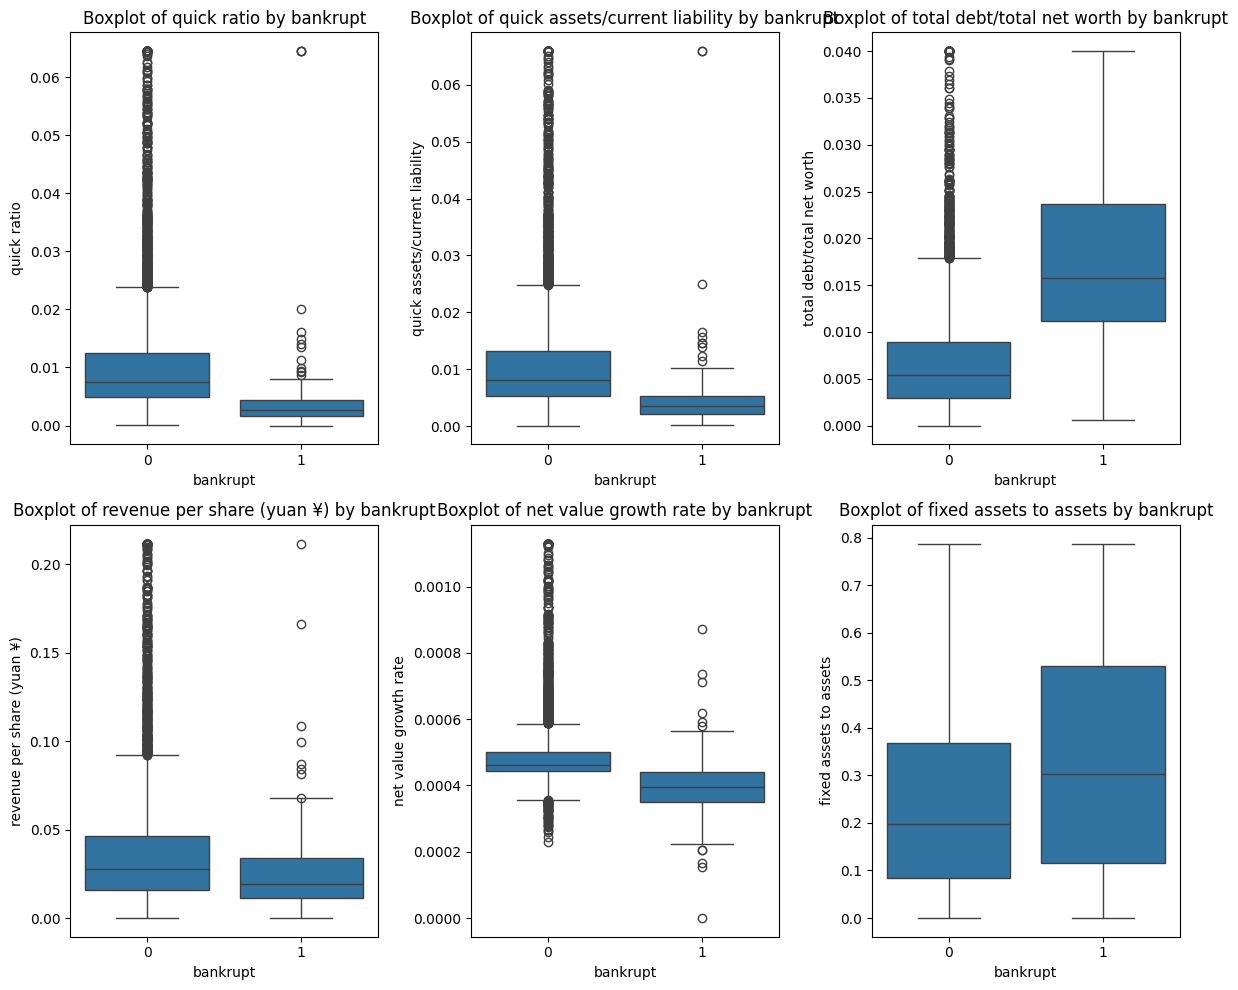

In [67]:
plot_multiple_boxplots(train_set,
                       cols_to_cap,
                       n_cols=3,
                       hue='bankrupt')

Memang masih terlihat outlier begitupun dengan fitur2 lainnya. Outlier tetap dibiarkan, mengingat rasio atau rate perusahaan sangat mungkin berbeda jauh dan selama masuk akal/wajar dalam bisnis (rasio/rrate). Ini menjadi catatan untuk pemilihan model, di mana model yang tahan akan outlier akan dilibatkan dalam pemodelan.

In [68]:
train_set.describe().T

count      mean  \
bankrupt                                            5455.0  0.032264   
roa(c) before interest and depreciation before ...  5455.0  0.504447   
roa(a) before interest and % after tax              5455.0  0.557818   
roa(b) before interest and depreciation after tax   5455.0  0.552946   
operating gross margin                              5455.0  0.607765   
realized sales gross margin                         5455.0  0.607742   
operating profit rate                               5455.0  0.998781   
pre-tax net interest rate                           5455.0  0.797255   
after-tax net interest rate                         5455.0  0.809178   
non-industry income and expenditure/revenue         5455.0  0.303683   
continuous interest rate (after tax)                5455.0  0.781451   
persistent eps in the last four seasons             5455.0  0.228321   
operating profit per share (yuan ¥)                 5455.0  0.108779   
per share net profit before tax (yuan ¥)            5455.0  0.183691   
operating profit/paid-in capital                    5455.0  0.108672   
net profit before tax/paid-in capital               5455.0  0.182236   
operating profit per person                         5455.0  0.400181   
retained earnings to total assets                   5455.0  0.934526   
total income/total expense                          5455.0  0.002578   
net income to total assets                          5455.0  0.807420   
gross profit to sales                               5455.0  0.607763   
net income to stockholder's equity                  5455.0  0.840442   
net income flag                                     5455.0  1.000000   
cash flow rate                                      5455.0  0.467229   
cash flow per share                                 5455.0  0.323473   
current ratio                                       5455.0  0.015057   
quick ratio                                         5455.0  0.010656   
working capital to total assets                     5455.0  0.814216   
quick assets/total assets                           5455.0  0.401028   
current assets/total assets                         5455.0  0.522921   
cash/total assets                                   5455.0  0.124313   
quick assets/current liability                      5455.0  0.011292   
cash flow to total assets                           5455.0  0.649742   
cash flow to liability                              5455.0  0.461877   
cfo to assets                                       5455.0  0.593226   
cash flow to equity                                 5455.0  0.315563   
current liability to current assets                 5455.0  0.031427   
total debt/total net worth                          5455.0  0.007333   
debt ratio %                                        5455.0  0.113250   
net worth/assets                                    5455.0  0.886750   
long-term fund suitability ratio (a)                5455.0  0.008662   
borrowing dependency                                5455.0  0.374667   
contingent liabilities/net worth                    5455.0  0.006003   
current liability to assets                         5455.0  0.090770   
current liabilities/liability                       5455.0  0.761709   
current liabilities/equity                          5455.0  0.331482   
current liability to liability                      5455.0  0.761709   
current liability to equity                         5455.0  0.331482   
equity to long-term liability                       5455.0  0.115575   
liability-assets flag                               5455.0  0.000917   
liability to equity                                 5455.0  0.280410   
degree of financial leverage (dfl)                  5455.0  0.027642   
interest coverage ratio (interest expense to ebit)  5455.0  0.565302   
equity to liability                                 5455.0  0.047430   
revenue per share (yuan ¥)                          5455.0  0.037775   
interest expense rati

## Potensial Variabel terhadap Prediksi Kebangkrutan

Berdasarkan beberapa informasi dan jurnal, ada 7 fitur yang memiliki potensi berpengaruh terhadap model prediksi kebangkrutan perusahaan, di antaranya
1. roa(a) before interest and % after tax (Profitabilitas)
2. net worth/assets (Struktur Modal / Solvabilitas)
3. working capital to total assets (Likuiditas)
4. cash flow rate (Arus Kas)
5. net income to stockholder's equity (ROE - Profitabilitas)
6. debt ratio % (Leverage)
7. total asset turnover (Efisiensi)

In [69]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 78 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt                                                 5455 non-null   int64  
 1   roa(c) before interest and depreciation before interest  5455 non-null   float64
 2   roa(a) before interest and % after tax                   5455 non-null   float64
 3   roa(b) before interest and depreciation after tax        5455 non-null   float64
 4   operating gross margin                                   5455 non-null   float64
 5   realized sales gross margin                              5455 non-null   float64
 6   operating profit rate                                    5455 non-null   float64
 7   pre-tax net interest rate                                5455 non-null   float64
 8   after-tax net interest rate     

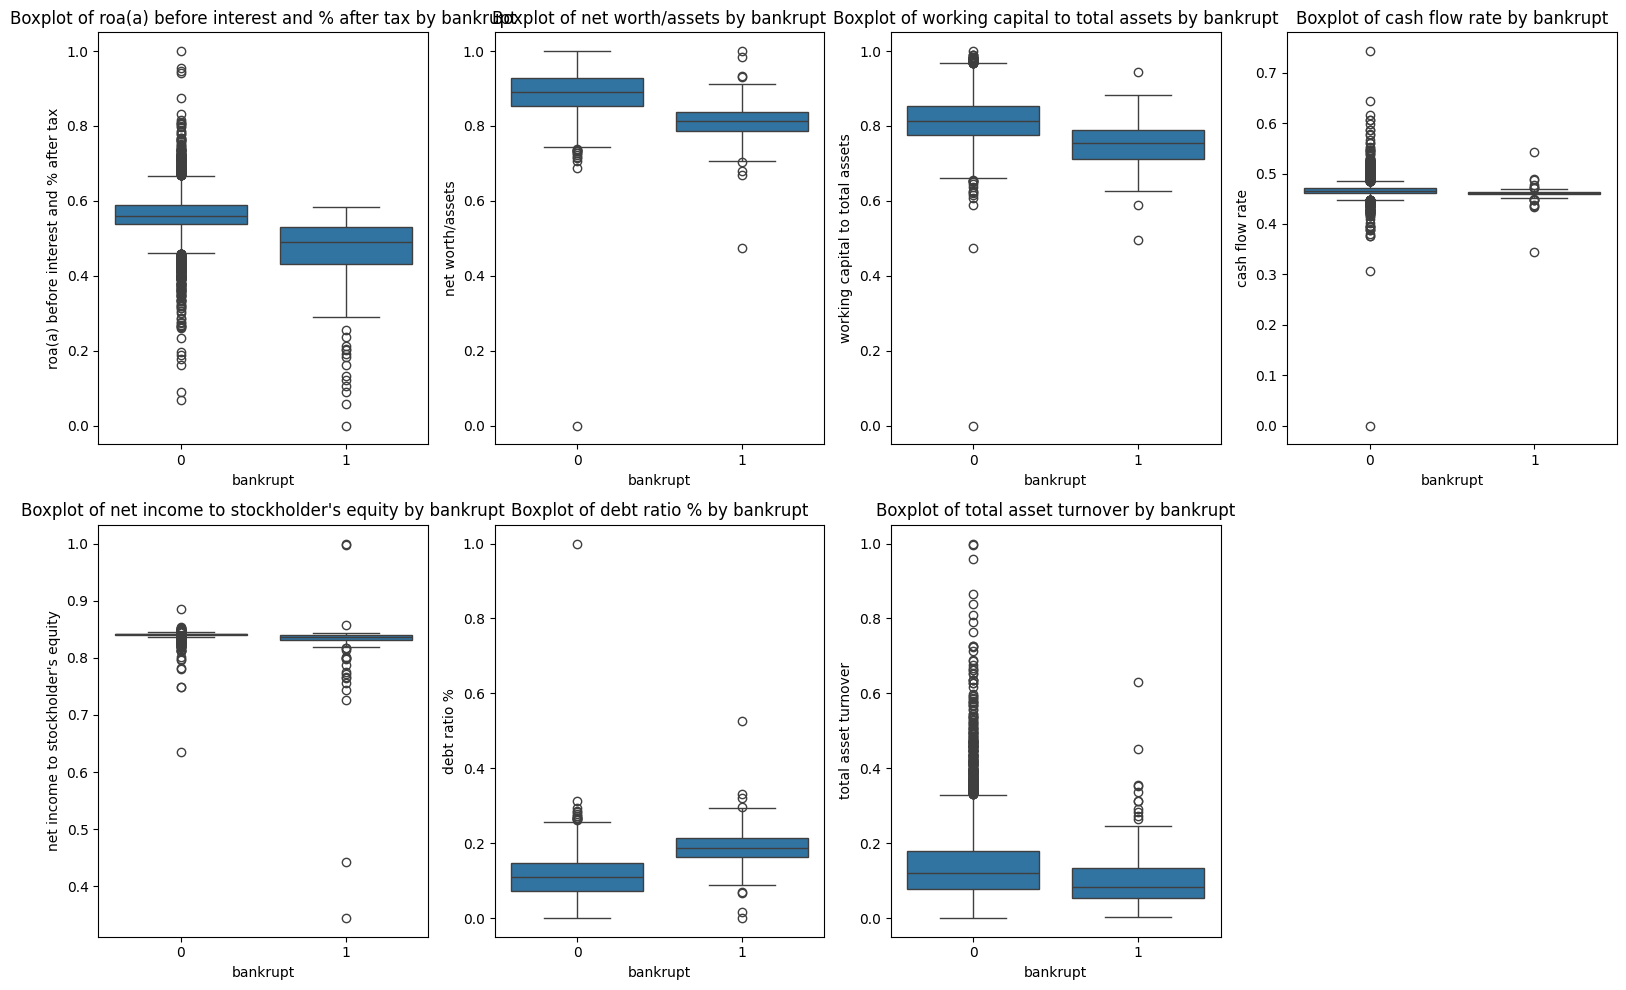

In [70]:
potential_features = [
    'roa(a) before interest and % after tax',
    'net worth/assets',
    'working capital to total assets',
    'cash flow rate',
    "net income to stockholder's equity",
    'debt ratio %',
    'total asset turnover'
]

# box plot
plot_multiple_boxplots(train_set,
                       potential_features,
                       n_cols = 4,
                       hue = 'bankrupt')

1. roa(a) before interest and % after tax (Profitabilitas)
    * Dampak:  Semakin rendah nilainya, semakin tinggi potensi kebangkrutan.
    * Nilai yang rendah atau negatif berarti perusahaan tidak profitabel. Bisa dikatakan seberapa efisien perusahaan menggunakan asetnya untuk menghasilkan laba
    * Jika dilihat dari grafik, secara median, terbukti nilai perusahaan yang dikategorikan tidak bangkrut memiliki nilai median yang lebih tinggi dibandingkan perusahaan yang dikategorikan bankrupt. Meskipun dapat dipahami masih ada outlier, namun outlier masih dalam skala hitung yang masuk akal.
2. net worth/assets (Struktur Modal / Solvabilitas)
    * Ini mengukur seberapa besar porsi aset yang dibiayai oleh modal sendiri (ekuitas), bukan utang.
    * Dampak: Semakin rendah nilainya, semakin tinggi potensi kebangkrutan
    * Nilai yang rendah menunjukkan perusahaan sangat bergantung pada utang (high leverage) dan memiliki bantalan finansial yang tipis untuk menahan kerugian.
    * Dilihat dari grafik, perusahaan yang dikategorikan tidak bangkrut memiliki nilai median yang sedikit lebih tinggi dibandingkan perusahaan yang dikategorikan bangkrut.
3. working capital to total assets (Likuiditas)
    * Ukuran kesehatan likuiditas jangka pendek. Apakah perusahaan punya cukup sumber daya cair untuk operasi sehari-hari.
    * Dampak: Semakin rendah nilainya, semakin tinggi potensi kebangkrutan
    * Nilai yang rendah atau negatif menandakan perusahaan mungkin kesulitan membayar tagihan jangka pendeknya, seperti gaji atau supplier, yang merupakan penyebab umum kebangkrutan.
    * Dilihat dari grafik memang terbukti perusahaan yang dikateogrikan tidak bangkrut memiliki nilai median yang lebih tinggi dibandingkan perusahaan yang dikategorikan mengalami kebangkrutan
4. cash flow rate (Arus Kas)
    * Kemampuan perusahaan menghasilkan kas dari operasi untuk menutupi utang lancarnya.
    * Dampak: Semakin rendah nilainya, semakin tinggi potensi kebangkrutan.
    * Laba bisa dimanipulasi, tetapi kas lebih sulit. Jika perusahaan tidak bisa menghasilkan kas yang cukup, maka perusahaan tidak akan bisa bertahan.
    * Berdasarkan grafik di atas, tidak terlalu terlihat perbedaaanya secara median. Namun jika dilihat dari nilai outlier atau nilai di atas upper bound, perusahaan yang dikategorikan tidak bankrut memiliki jumlah yang lebih banyak dibandingkan perusahaan yang dikategorikan bankrut
5. net income to stockholder's equity (ROE - Profitabilitas)
    * Seberapa besar laba yang dihasilkan dari setiap rupiah yang diinvestasikan oleh pemegang saham
    * Dampak: Semakin rendah nilainya, semakin tinggi potensi kebangkrutan.
    * Sama seperti ROA, ini adalah indikator profitabilitas inti. ROE yang buruk berarti investasi pemilik tidak menghasilkan keuntungan, sebuah tanda bisnis yang tidak sehat.
    * Jika dilihat dari grafik, nilai median antara perusahaan yang dikategorikan bangkrut dan tidak, perbedaannya sangat sulit dilihat. Hanya saja, sama seperti fitur sebelumnya, jika dilihat dari lower bound, ada beberapa observasi yang menunjukkan nilai dalam fitur yang sangat rendah termasuk ke dalam kategori perusahaan yang bangkrut
6. debt ratio % (Leverage)
    * Seberapa besar porsi aset yang dibiayai oleh utang. Ini adalah kebalikan dari net worth/assets.
    * Dampak: Semakin tinggi nilainya, semakin tinggi potensi kebangkrutan.
    * Nilai yang tinggi berarti perusahaan memiliki beban utang yang besar. Ini meningkatkan risiko karena perusahaan harus terus-menerus menghasilkan kas yang cukup untuk membayar bunga dan pokok pinjaman.
    * Jika dilihat dari grafik di atas, median perusahaan yang termasuk ke dalam kategori bankrut memiliki nilai yang lebih tinggi dibandingkan perusahaan yang kategorinya tidak bangkrut.
7. total asset turnover (Efisiensi)
    * Seberapa efisien perusahaan menggunakan asetnya untuk menghasilkan penjualan.
    * Dampak: Semakin rendah nilainya, semakin tinggi potensi kebangkrutan.
    * Nilai yang rendah berarti aset perusahaan (seperti pabrik atau inventaris) tidak produktif atau "menganggur". Ini adalah tanda inefisiensi operasional yang bisa menggerus profitabilitas.
    * Jika dilihat dari grafik, nilai median perusahaan yang dikategorikan bangkrut memiliki nilai yang lebih rendah dibandingkan perusahaan yang tidak bangkrut.

# Multikolinearitas

In [71]:
train_set.describe().T

count      mean  \
bankrupt                                            5455.0  0.032264   
roa(c) before interest and depreciation before ...  5455.0  0.504447   
roa(a) before interest and % after tax              5455.0  0.557818   
roa(b) before interest and depreciation after tax   5455.0  0.552946   
operating gross margin                              5455.0  0.607765   
realized sales gross margin                         5455.0  0.607742   
operating profit rate                               5455.0  0.998781   
pre-tax net interest rate                           5455.0  0.797255   
after-tax net interest rate                         5455.0  0.809178   
non-industry income and expenditure/revenue         5455.0  0.303683   
continuous interest rate (after tax)                5455.0  0.781451   
persistent eps in the last four seasons             5455.0  0.228321   
operating profit per share (yuan ¥)                 5455.0  0.108779   
per share net profit before tax (yuan ¥)            5455.0  0.183691   
operating profit/paid-in capital                    5455.0  0.108672   
net profit before tax/paid-in capital               5455.0  0.182236   
operating profit per person                         5455.0  0.400181   
retained earnings to total assets                   5455.0  0.934526   
total income/total expense                          5455.0  0.002578   
net income to total assets                          5455.0  0.807420   
gross profit to sales                               5455.0  0.607763   
net income to stockholder's equity                  5455.0  0.840442   
net income flag                                     5455.0  1.000000   
cash flow rate                                      5455.0  0.467229   
cash flow per share                                 5455.0  0.323473   
current ratio                                       5455.0  0.015057   
quick ratio                                         5455.0  0.010656   
working capital to total assets                     5455.0  0.814216   
quick assets/total assets                           5455.0  0.401028   
current assets/total assets                         5455.0  0.522921   
cash/total assets                                   5455.0  0.124313   
quick assets/current liability                      5455.0  0.011292   
cash flow to total assets                           5455.0  0.649742   
cash flow to liability                              5455.0  0.461877   
cfo to assets                                       5455.0  0.593226   
cash flow to equity                                 5455.0  0.315563   
current liability to current assets                 5455.0  0.031427   
total debt/total net worth                          5455.0  0.007333   
debt ratio %                                        5455.0  0.113250   
net worth/assets                                    5455.0  0.886750   
long-term fund suitability ratio (a)                5455.0  0.008662   
borrowing dependency                                5455.0  0.374667   
contingent liabilities/net worth                    5455.0  0.006003   
current liability to assets                         5455.0  0.090770   
current liabilities/liability                       5455.0  0.761709   
current liabilities/equity                          5455.0  0.331482   
current liability to liability                      5455.0  0.761709   
current liability to equity                         5455.0  0.331482   
equity to long-term liability                       5455.0  0.115575   
liability-assets flag                               5455.0  0.000917   
liability to equity                                 5455.0  0.280410   
degree of financial leverage (dfl)                  5455.0  0.027642   
interest coverage ratio (interest expense to ebit)  5455.0  0.565302   
equity to liability                                 5455.0  0.047430   
revenue per share (yuan ¥)                          5455.0  0.037775   
interest expense rati

In [72]:
train_set.corr().style.background_gradient(cmap='coolwarm')

Ternyata `net income flag` tidak memili variasi nilai. Maka dari itu, feature ini akan dihapus karena tidak akan berpengaruh terhadap model nantinya (constant feature)

Selain itu, berdasarkan hasil matrix correlation didapatkan hasil bahwa memang beberapa fitur memiliki korelasi yang sangat kuat. Artinya fitur kemungkinan redundan. Perlu dipahami juga bahwa urutan masing-masing fitur (variabel) berdasarkan faktor atau kemungkinan faktor.

Dalam contoh di atas, misalnya pada faktor profitabilitas, roa(c), roa(b), dan roa(a) memiliki korelasi yang hampir sempurna sangat kuat. Jika dilihat korelasi ke target, roa(a) memiliki korelasi yang lebih tinggi di antara yang lain. Pemilihan potensial variabel atau hipotesis yang kemungkinan memiliki pengaruh terhadap target secara mengejutkan didorong oleh ini. Fitur lainnya dalam faktor yang sama juga terlihat memiliki korelasi kuat, seperti `operating profit rate` dengan `pre-tax net interest rate`.

Ada banyak fitur lainnya yang memiliki korelasi kuat. Catatan untuk penggunaan model jika memang model klasik atau model parametrik digunakan perlu menghapus variabel yang redundan. **Akan tetapi, kandidat model terbaik saat ini adalah model tree-based, seperti Random Forest, XGBoost dan sebagainya karena tahan terhadap outlier dan multikolinerias**. Maka dari itu, pemilihan fitur nanti akan diserahkan ke model dengan menggunakan metode feature importance untuk melihat kontribusi variabel (fitur) terhadap model. Pun nantinya pemodelan juga akan menggunakan model klasik sebagai perbandingan dan benchmark untuk model-model yang lebih canggih.

In [73]:
train_set = train_set.drop(columns='net income flag')
test_set = test_set.drop(columns='net income flag')

# Scaling

Meskipun scale fitur tidak akan merubah signifikan distribusi menjadi normal, terkadang secara komputasi bisa menjadi lebih cepat. Namun perlu dipahami, men-*scale* fitur akan mengubah interpretasi. Jika interpretasi perlu, maka sebelum dilakukan perlu mengubahnya lagi menjadi skala hitung aslinya


Maka dari itu, set data ini akan dibikin:
1. set data original: tanpa scale
2. set data scale: menggunakan scale

Adapun, teknik scale yang diguankan adalah `RobustScalar` karena dia menggunakan menggunakan median dan Interquartile Range (IQR) (jarak antara kuartil 1 dan 3)

In [74]:
# split target and feautes
X_train = train_set.drop(columns='bankrupt')
y_train = train_set['bankrupt']

X_test = test_set.drop(columns='bankrupt')
y_test = test_set['bankrupt']

In [75]:
# initialize RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# fit only Train and transform only Test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

# Save Data Processing into pickle file

In [76]:
# save into different variable
train_set_processed = train_set.copy()
test_set_processed = test_set.copy()

train_set_processed_scaled = pd.concat([X_train_scaled, y_train], axis=1)
test_set_processed_scaled = pd.concat([X_test_scaled, y_test], axis=1)

# # define path to save data processed
# path_to_dump = ('/content/drive/MyDrive/Dibimbing_DS/final_project_DS/dataset/processed/')

# # save data
# joblib.dump(train_set_processed, path_to_dump+'train_set_processed.joblib')
# joblib.dump(test_set_processed, path_to_dump+'test_set_processed.joblib')

# joblib.dump(train_set_processed_scaled, path_to_dump+'train_set_processed_scaled.joblib')
# joblib.dump(test_set_processed_scaled, path_to_dump+'test_set_processed_scaled.joblib')